# Supervised Learning - Foundations Project: ReCell

## Problem Statement

### Business Context

Buying and selling used phones and tablets used to be something that happened on a handful of online marketplace sites. But the used and refurbished device market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth \\$52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used phones and tablets that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one. There are plenty of other benefits associated with the used device market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished devices. Maximizing the longevity of devices through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost this segment as consumers cut back on discretionary spending and buy phones and tablets only for immediate needs.


### Objective

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished devices. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it.


### Data Description

The data contains the different attributes of used/refurbished phones and tablets. The data was collected in the year 2021. The detailed data dictionary is given below.


- brand_name: Name of manufacturing brand
- os: OS on which the device runs
- screen_size: Size of the screen in cm
- 4g: Whether 4G is available or not
- 5g: Whether 5G is available or not
- main_camera_mp: Resolution of the rear camera in megapixels
- selfie_camera_mp: Resolution of the front camera in megapixels
- int_memory: Amount of internal memory (ROM) in GB
- ram: Amount of RAM in GB
- battery: Energy capacity of the device battery in mAh
- weight: Weight of the device in grams
- release_year: Year when the device model was released
- days_used: Number of days the used/refurbished device has been used
- normalized_new_price: Normalized price of a new device of the same model in euros
- normalized_used_price: Normalized price of the used/refurbished device in euros

## Importing necessary libraries

In [1]:
# for reading and manipulating data
import numpy as np
import pandas as pd

# for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# for ignoring the warnings
import warnings
warnings.filterwarnings("ignore")

# for splitting the data into train and test
from sklearn.model_selection import train_test_split

# for building linear regression model using statmodels
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

# for checking model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# to compute VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Loading the dataset

In [2]:
# original
data = pd.read_csv("used_device_data.csv")
# copy
df = data.copy()

## Data Overview

- Observations
- Sanity checks

In [109]:
# for checking first 5 rows
df.head()

brand_name       os  screen_size   4g   5g  main_camera_mp  \
0      Honor  Android        14.50  yes   no            13.0   
1      Honor  Android        17.30  yes  yes            13.0   
2      Honor  Android        16.69  yes  yes            13.0   
3      Honor  Android        25.50  yes  yes            13.0   
4      Honor  Android        15.32  yes   no            13.0   

   selfie_camera_mp  int_memory  ram  battery  weight  release_year  \
0               5.0        64.0  3.0   3020.0   146.0          2020   
1              16.0       128.0  8.0   4300.0   213.0          2020   
2               8.0       128.0  8.0   4200.0   213.0          2020   
3               8.0        64.0  6.0   7250.0   480.0          2020   
4               8.0        64.0  3.0   5000.0   185.0          2020   

   days_used  normalized_used_price  normalized_new_price  
0        127               4.307572              4.715100  
1        325               5.162097              5.519018  
2        162               5.111084              5.884631  
3        345               5.135387              5.630961  
4        293               4.389995              4.947837

Observations:
1. The dataset contains the information regarding price of devices of different brands
2. There are two types of prices, one is new price and the other is used price

In [110]:
# for checking the number of rows and columns
df.shape

(3454, 15)

There are **3454** rows and **15** columns in the dataset

In [111]:
# for checing the datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

* There are 3 datatypes in the dataset namely float, integer and object
* 4 columns are of object datatype, 2 are of integer datatype and the rest 9 columns are of float datatype
* So, there are 4 categorical variables and rest 11 are numerical variables  



In [112]:
# to find the statistical summary
df.describe(include='all').T

count unique      top  freq         mean          std  \
brand_name               3454     34   Others   502          NaN          NaN   
os                       3454      4  Android  3214          NaN          NaN   
screen_size            3454.0    NaN      NaN   NaN    13.713115      3.80528   
4g                       3454      2      yes  2335          NaN          NaN   
5g                       3454      2       no  3302          NaN          NaN   
main_camera_mp         3275.0    NaN      NaN   NaN     9.460208     4.815461   
selfie_camera_mp       3452.0    NaN      NaN   NaN     6.554229     6.970372   
int_memory             3450.0    NaN      NaN   NaN    54.573099    84.972371   
ram                    3450.0    NaN      NaN   NaN     4.036122     1.365105   
battery                3448.0    NaN      NaN   NaN  3133.402697  1299.682844   
weight                 3447.0    NaN      NaN   NaN   182.751871    88.413228   
release_year           3454.0    NaN      NaN   NaN  2015.965258     2.298455   
days_used              3454.0    NaN      NaN   NaN   674.869716   248.580166   
normalized_used_price  3454.0    NaN      NaN   NaN     4.364712     0.588914   
normalized_new_price   3454.0    NaN      NaN   NaN     5.233107     0.683637   

                            min       25%       50%       75%       max  
brand_name                  NaN       NaN       NaN       NaN       NaN  
os                          NaN       NaN       NaN       NaN       NaN  
screen_size                5.08      12.7     12.83     15.34     30.71  
4g                          NaN       NaN       NaN       NaN       NaN  
5g                          NaN       NaN       NaN       NaN       NaN  
main_camera_mp             0.08       5.0       8.0      13.0      48.0  
selfie_camera_mp            0.0       2.0       5.0       8.0      32.0  
int_memory                 0.01      16.0      32.0      64.0    1024.0  
ram                        0.02       4.0       4.0       4.0      12.0  
battery                   500.0    2100.0    3000.0    4000.0    9720.0  
weight                     69.0     142.0     160.0     185.0     855.0  
release_year             2013.0    2014.0    2015.5    2018.0    2020.0  
days_used                  91.0     533.5     690.5    868.75    1094.0  
normalized_used_price  1.536867  4.033931  4.405133    4.7557  6.619433  
normalized_new_price   2.901422  4.790342  5.245892  5.673718  7.847841

Observations:
1. There are 34 unique brands out of which others is the most popular one with highest frequency in the dataset
2. Android is the most popular operating system
3. Average screen size is 13.7 cm and ranges from 5 to 30.71 cm
4. Most of the devices are equipped with 4g technology while 5g is still in minority
5. Main camera has a median of 8 MP, ranging from 0.08 to 48 MP
6. Selfie camera has a median of 5 MP, ranging from 0 to 8 MP
7. Internal memory ranges from 0.01 GB to 1024 GB with a median of 32 GB
8. Most of the devices have 4 GB RAM as mean, 25th, 50th and 75th percentiles all have 4 GB RAM and maximum is 12 GB
9. Median capacity of the battery is 3000 mAh, ranging from 500 to 9720 mAh
10. Median weight of the devices is 160 grams whereas mean is 182.75 grams meaning the distribution can be slightly right skewed
11. There are missing values in `main_camera_mp`, `selfie_camera_mp`, `int_memory`, `ram`, `battery` and `weight` as count is less than the total number of rows i.e.3454
12. Release year ranges from 2013 to 2020
13. Average number of days used of devices is 674 days
14. The minimum price for used devices is 1.54 euros and the maximum is 6.62 euros
15. The minimum price for new devices is 2.9 euros and maximum 7.85 euros
16. `days_used`, `normalized_used_price`and `normalized_new_price` follow a normal distribution as median is almost equal to the mean


In [113]:
# for checking duplicate values
df.duplicated().sum()

0

No duplicate values present in the dataset

In [114]:
# for checking missing values
df.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

There are 179, 2, 4, 4, 6 and 7 missing values in  `main_camera_mp`, `selfie_camera_mp`, `int_memory`, `ram`, `battery` and `weight` respectively

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of normalized used device prices look like?
2. What percentage of the used device market is dominated by Android devices?
3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?
4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?
5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?
6. A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?
7. Which attributes are highly correlated with the normalized price of a used device?

#### **The below functions need to be defined to carry out the EDA.**

In [23]:
# function for plotting histogram and boxplot for the numerical columns

def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [24]:
# function to create labeled barplots

def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

### Univariate Analysis

#### Brand name

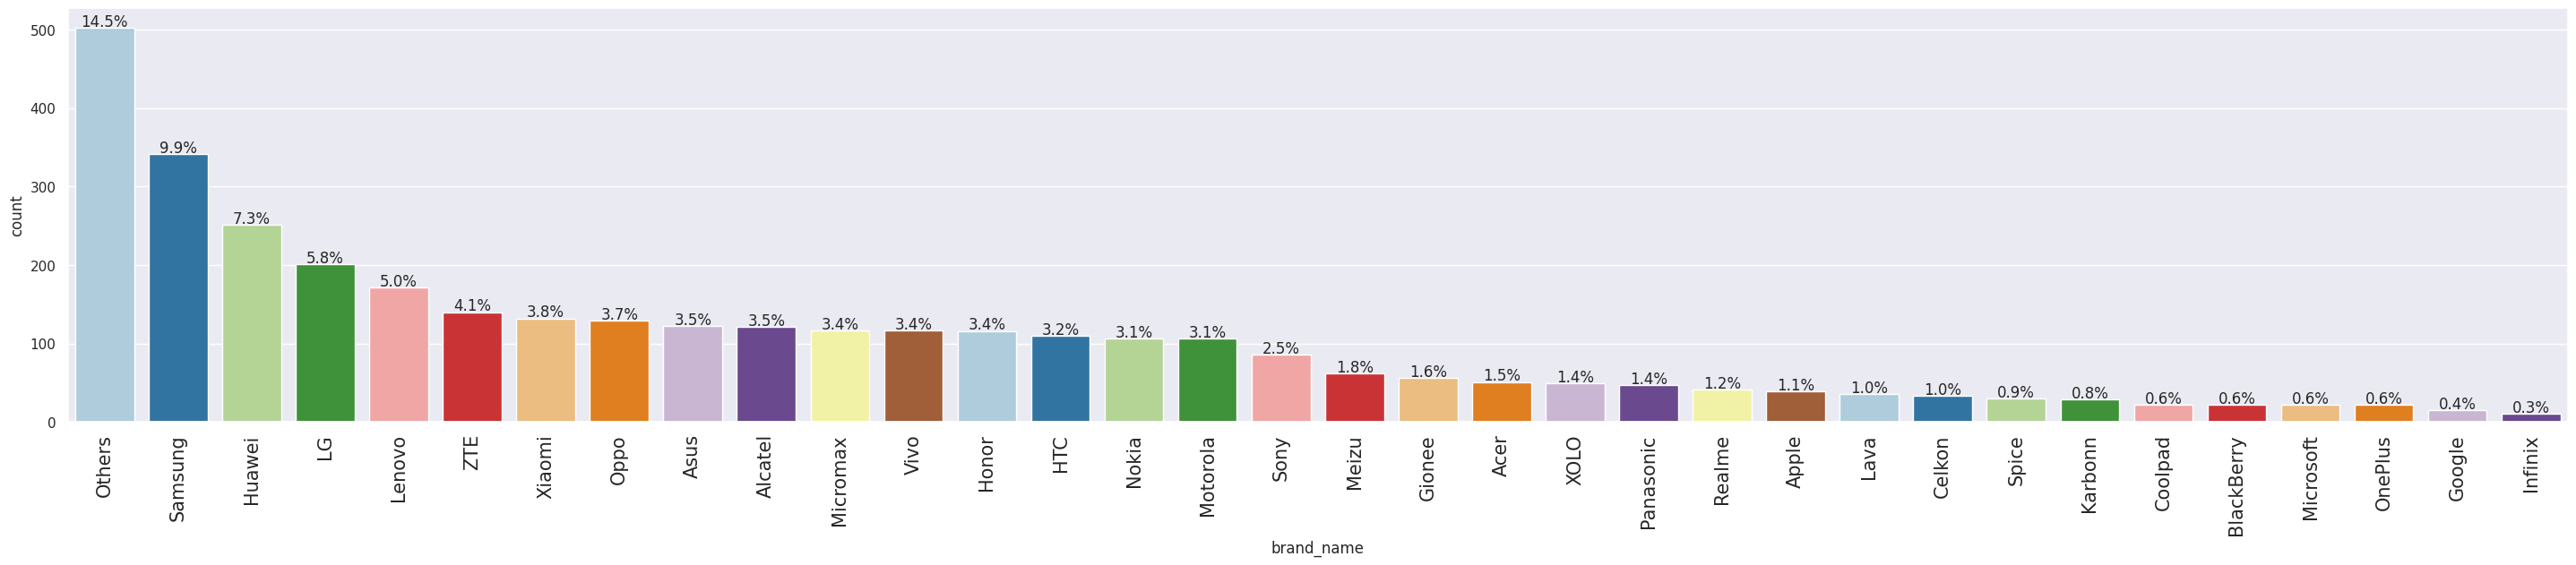

In [117]:
labeled_barplot(df, "brand_name", perc=True)

In [118]:
df['brand_name'].value_counts()

Others        502
Samsung       341
Huawei        251
LG            201
Lenovo        171
ZTE           140
Xiaomi        132
Oppo          129
Asus          122
Alcatel       121
Micromax      117
Vivo          117
Honor         116
HTC           110
Nokia         106
Motorola      106
Sony           86
Meizu          62
Gionee         56
Acer           51
XOLO           49
Panasonic      47
Realme         41
Apple          39
Lava           36
Celkon         33
Spice          30
Karbonn        29
Coolpad        22
BlackBerry     22
Microsoft      22
OnePlus        22
Google         15
Infinix        10
Name: brand_name, dtype: int64

Observations:
1. Others have the highest market share, almost 14.5% with total share of 502
2. Samsung and Huawei are the 2nd and 3rd most popular brands with 9.9% and 7.3% respectiely
3. Infinix is the least popular brand

#### OS

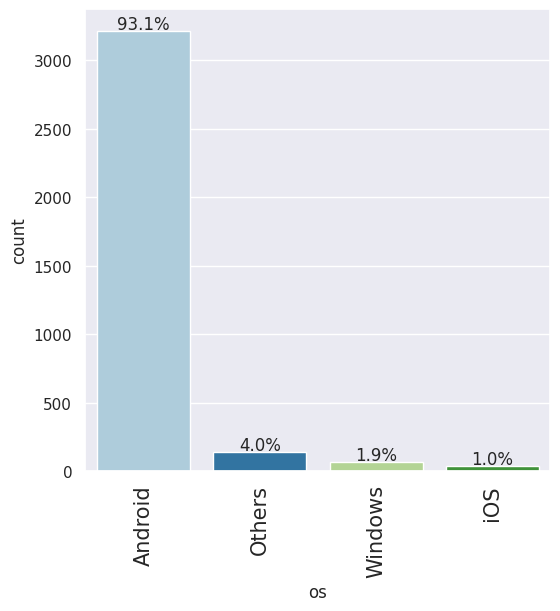

In [119]:
labeled_barplot(df, "os", perc=True)

**Q2. What percentage of the used device market is dominated by Android devices?**


Observations:
1. Android dominates 93% of the used device market
2. iOS is the least popular operating system having only 1% of market share

#### 4g

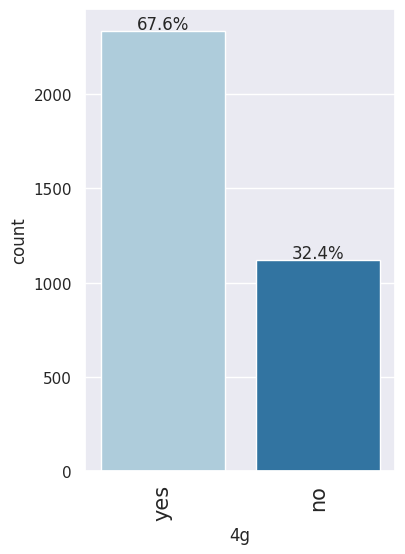

In [121]:
labeled_barplot(df, "4g", perc=True)

Almost 68% devices have a 4g network

#### 5g

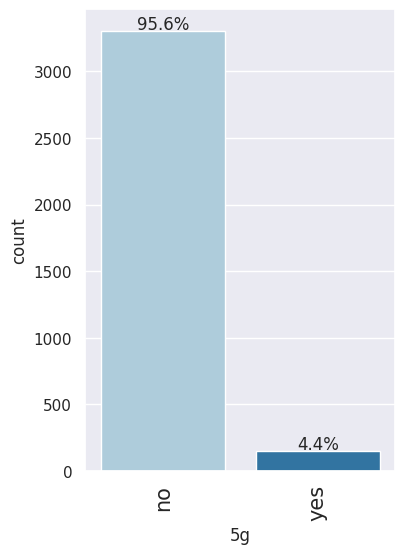

In [122]:
labeled_barplot(df, "5g", perc=True)

Most of the devices, almost 96% do not have 5g network

#### Screen size

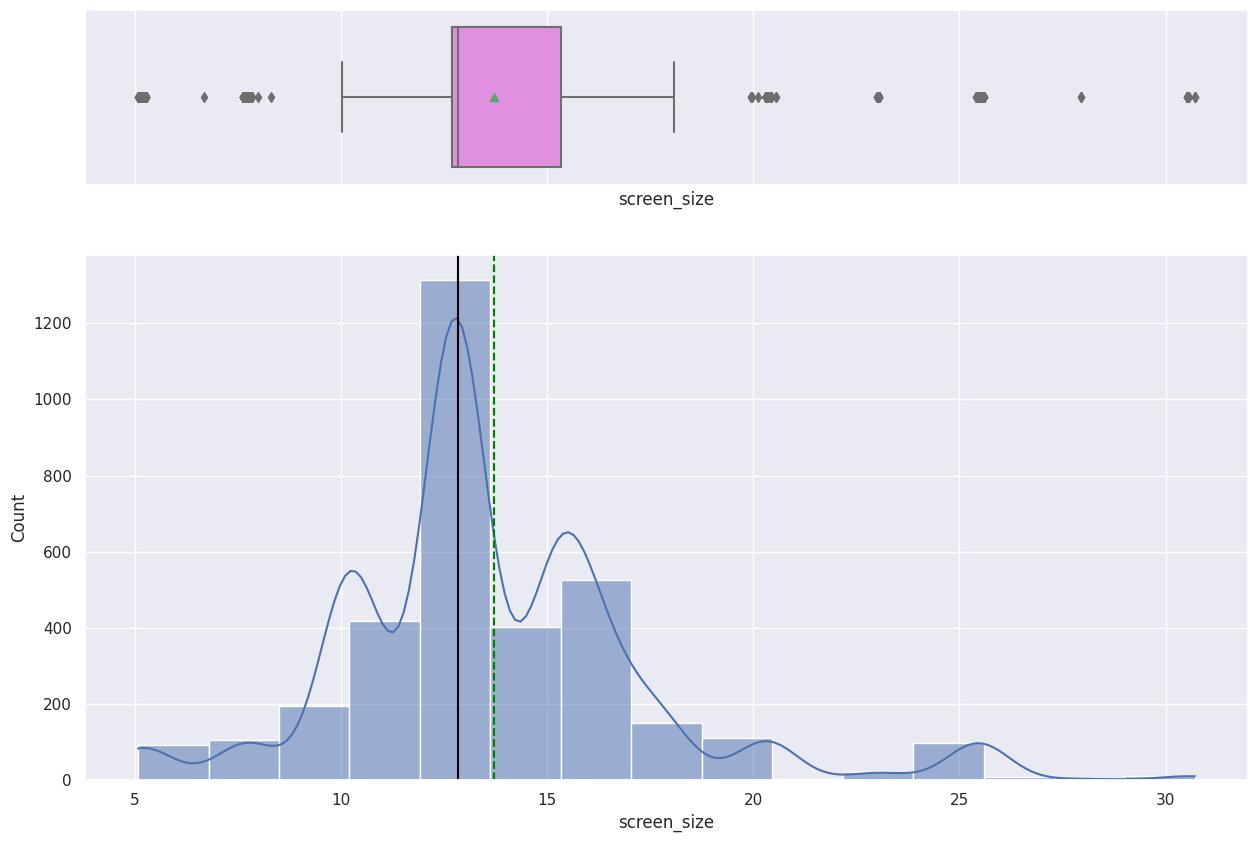

In [123]:
histogram_boxplot(df,'screen_size', kde=True,bins=15)

Observations:
1. The mean is slighly larger than the median meaning the data is little right skewed
2. Outliers exist on both right and left sides of the distribution, however more on the right

#### Main Camera


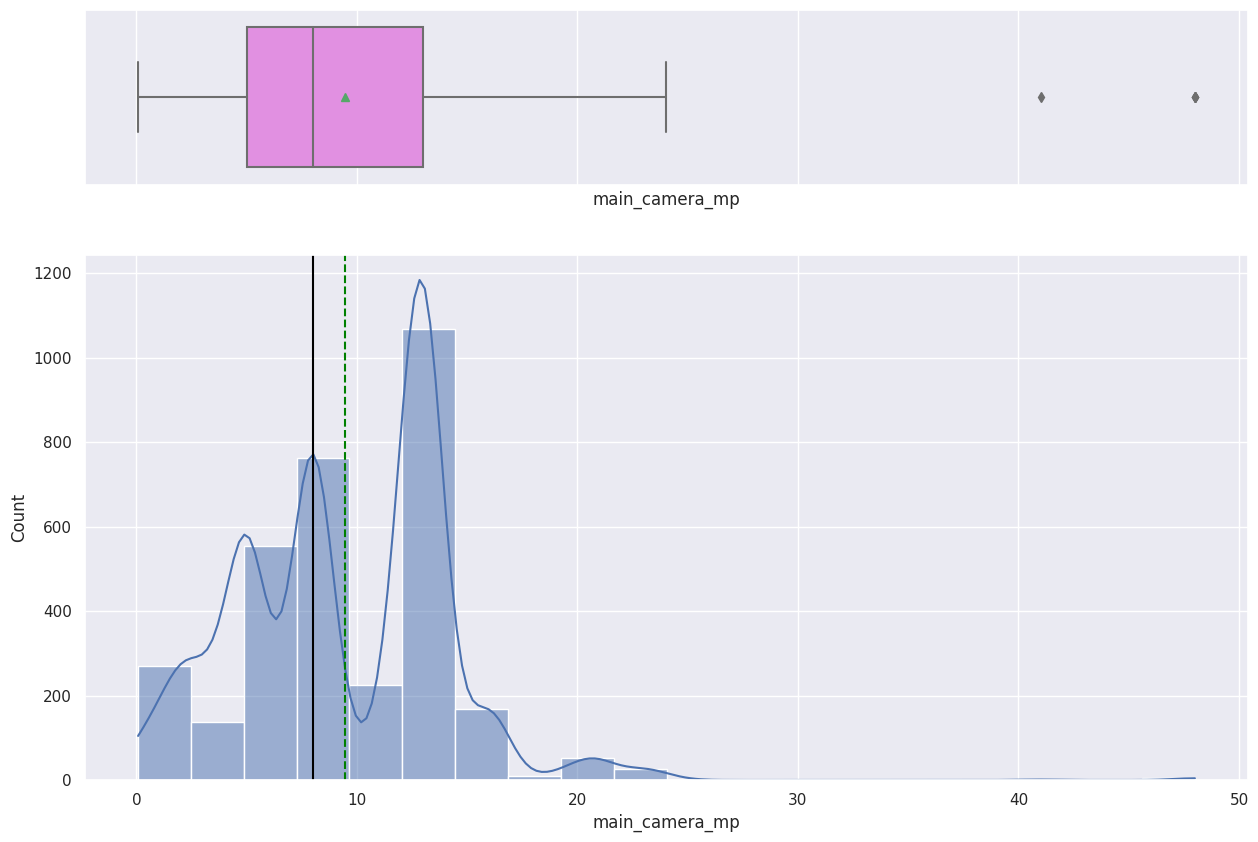

In [125]:
histogram_boxplot(df,'main_camera_mp', kde=True, bins=20)

Observations:
1. Have a right skewed distribution, mean is 9.5 MP whereas median is 8 MP
2. Outliers lie in the right side of the distribution having values over 40 MP

#### Selfie Camera


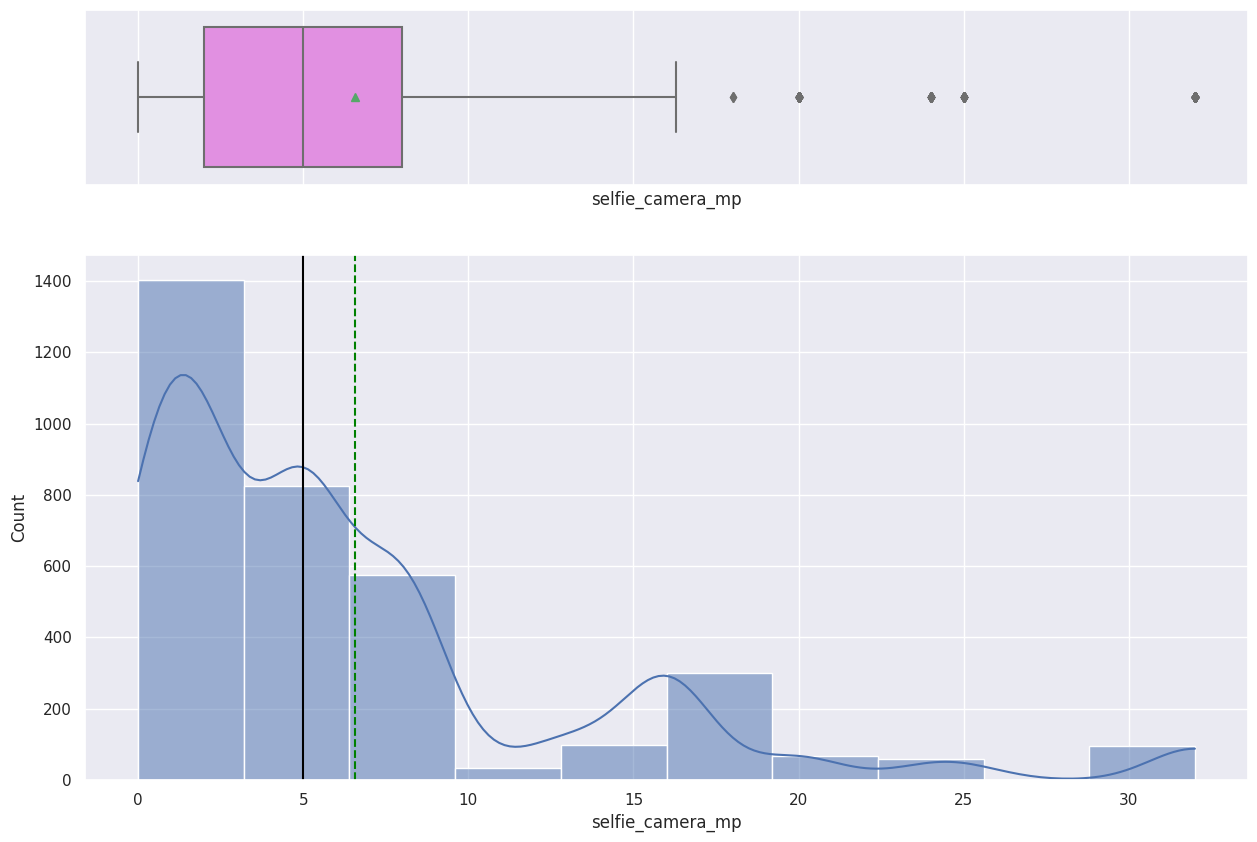

In [126]:
histogram_boxplot(df,'selfie_camera_mp', kde=True,bins=10)

Observations:
1. The distribution is heavily right skewed, mean is 6.5 MP whereas median is 5 MP
2. Outliers lie in the right side of the distribution having values greater than 15 MP

####Internal Memory


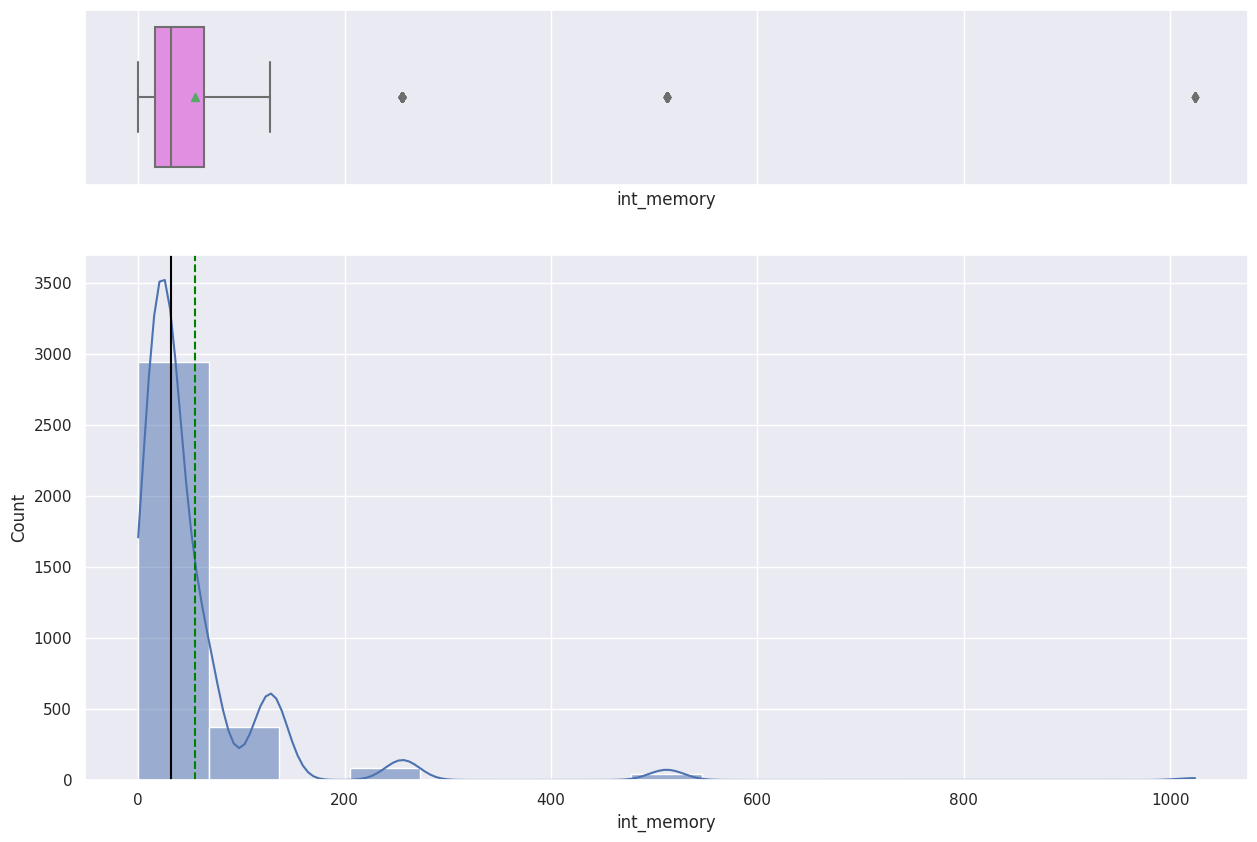

In [127]:
histogram_boxplot(df,'int_memory', kde=True,bins=15)

Observations:
1. Right skewed distribution
2. Outliers on the right side
3. 75% or almost 3000 devices have less than 100 GB internal memory

####RAM


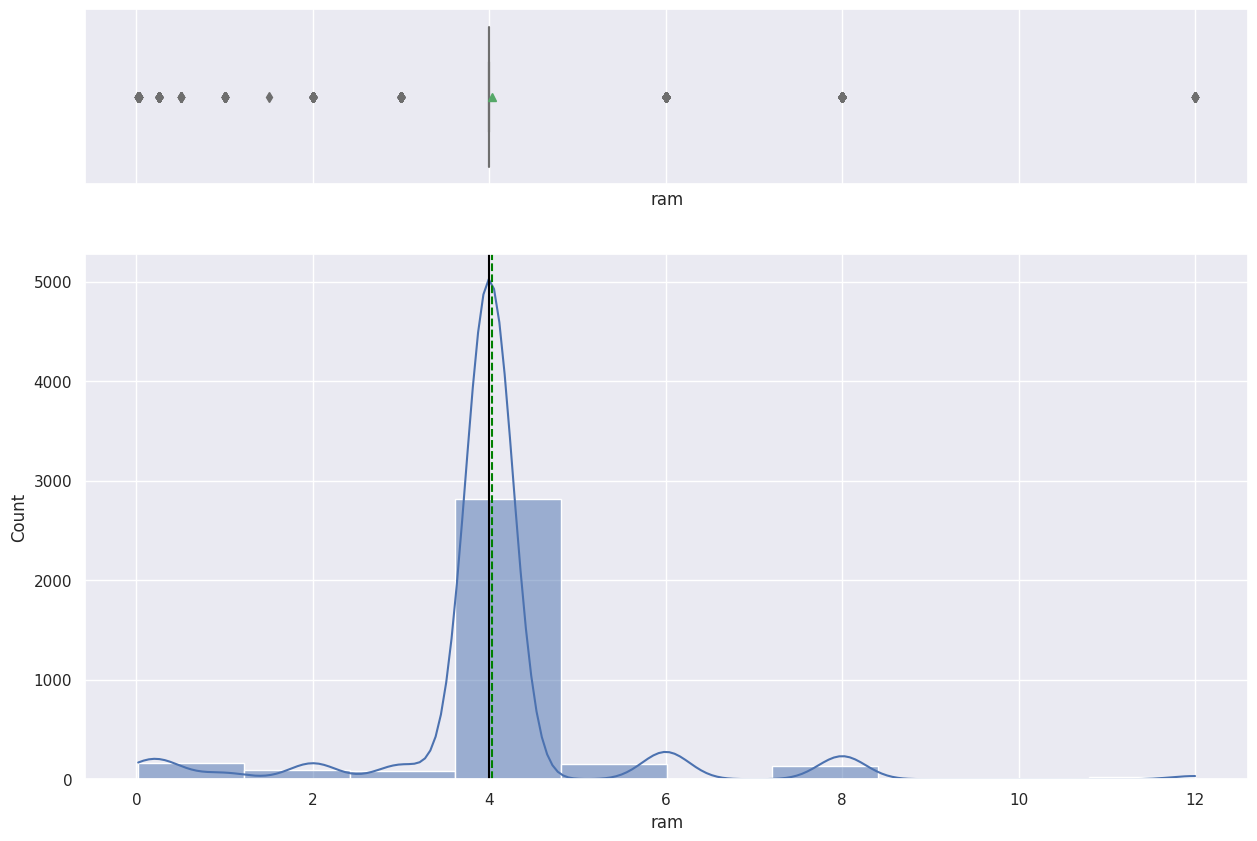

In [128]:
histogram_boxplot(df,'ram', kde=True,bins=10)

Observations:
1. Mean and median are pretty close.
2. The numerical values are not continuous but discrete

Hence, RAM can also be classified into categories of 4, 6, 8 GB etc so better to plot using a bar plot

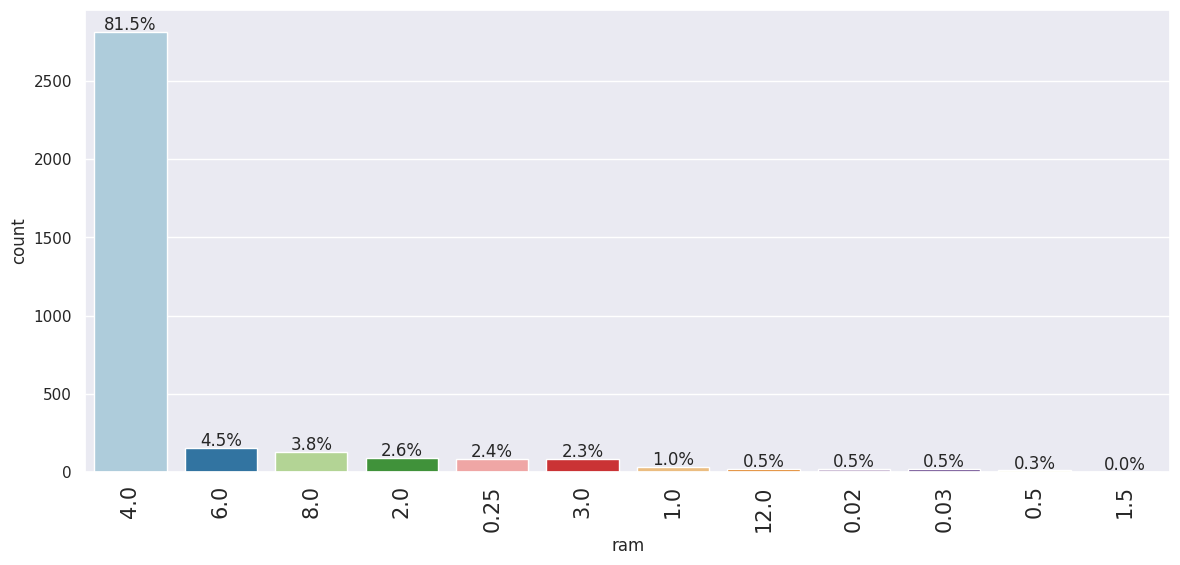

In [129]:
labeled_barplot(df, "ram", perc=True)

81.5% of the devices have 4 GB RAM

#### Battery

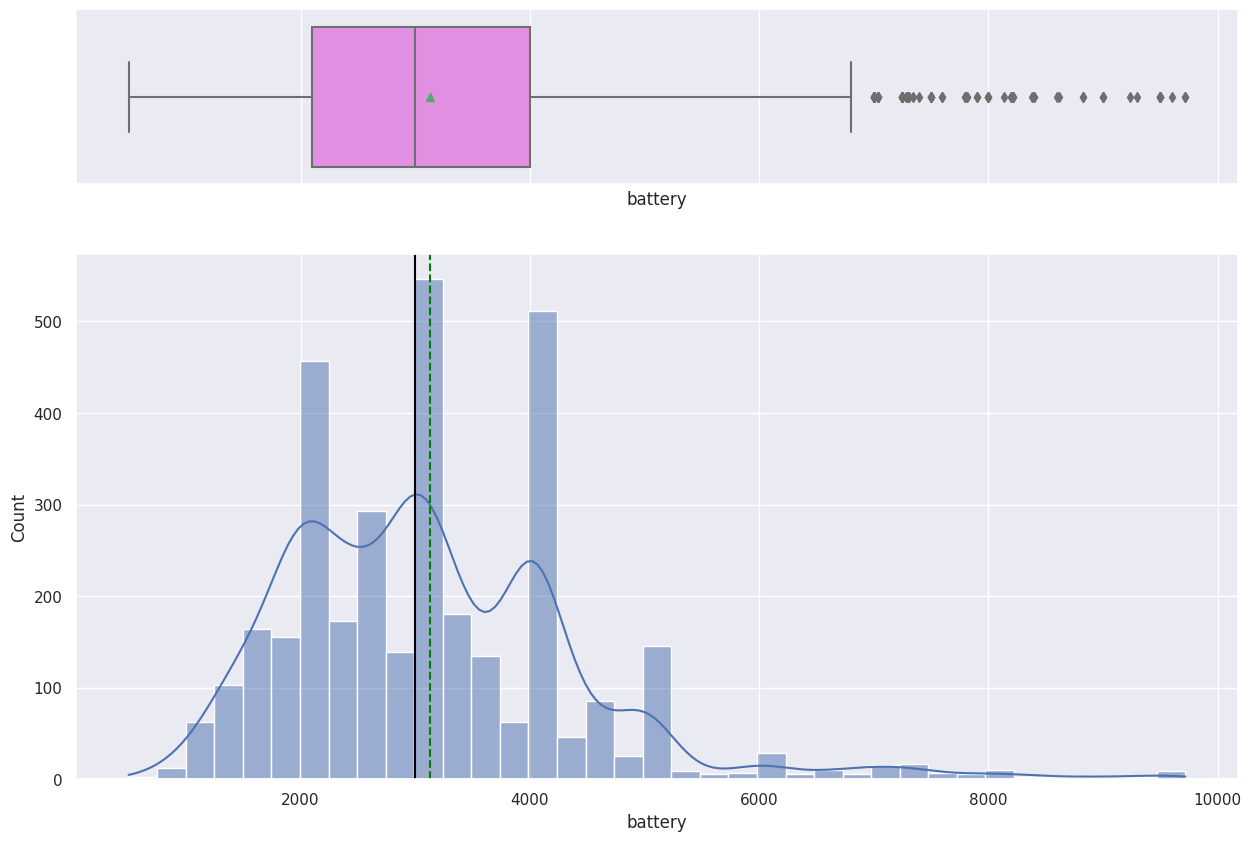

In [130]:
histogram_boxplot(df,'battery', kde=True)

Observations:
1. Right skewed distribution
2. Outliers on the right

#### Weight

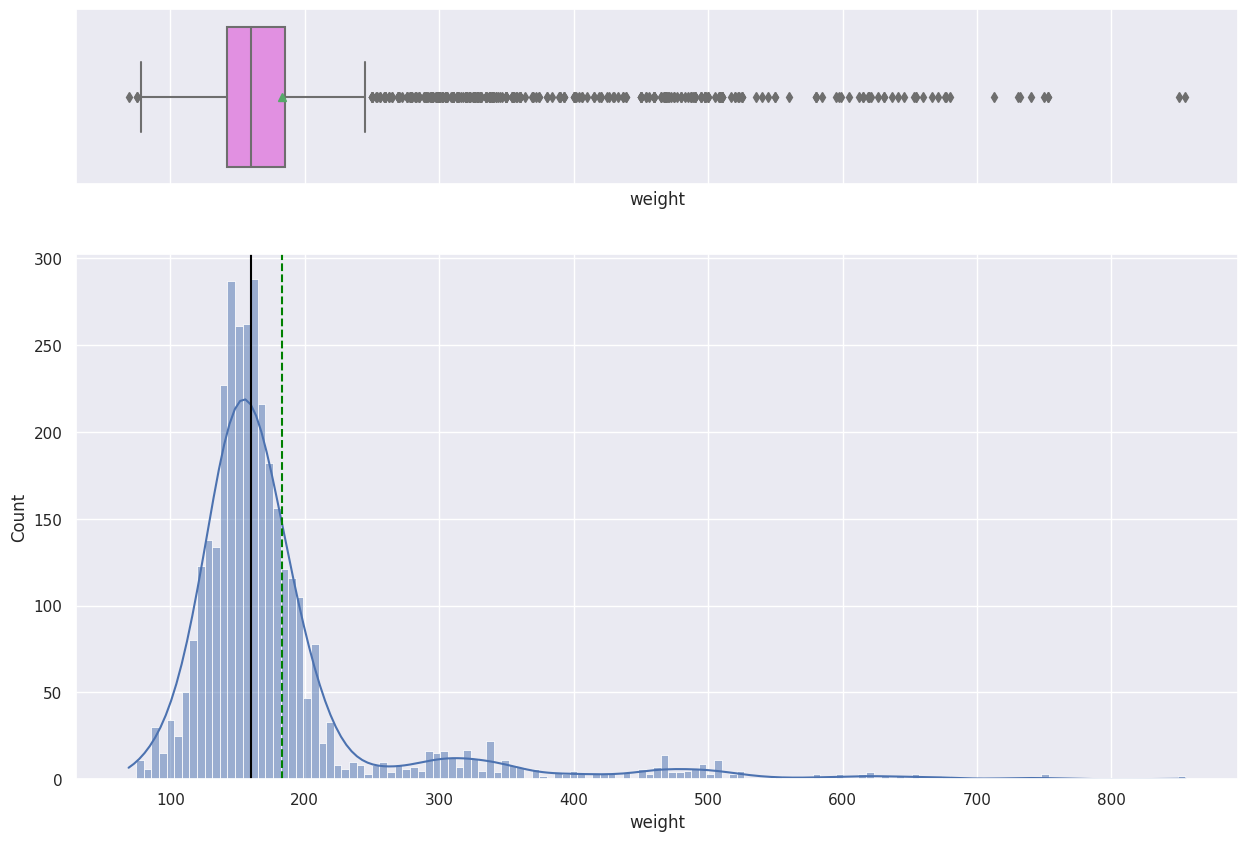

In [131]:
histogram_boxplot(df,'weight', kde=True)

Observations:
1. Right skewed distribution
2. Outliers on the right

#### Release year

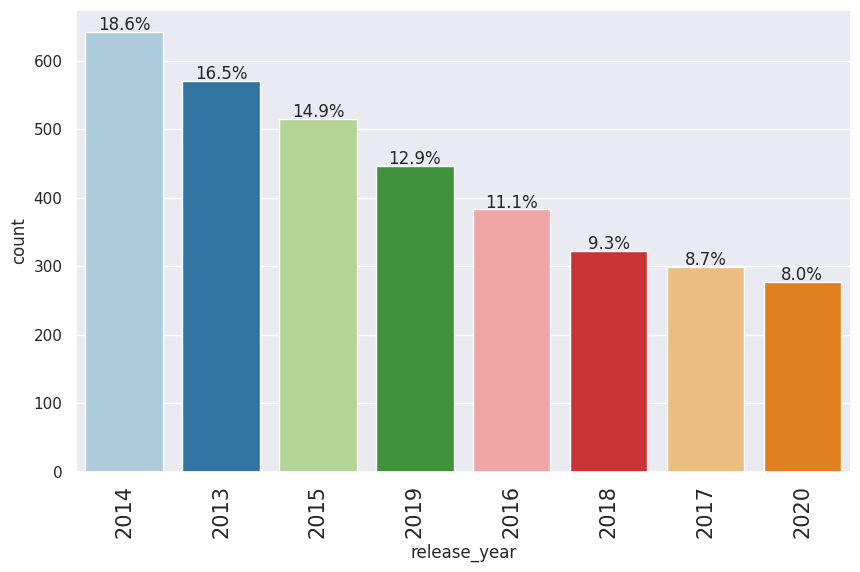

In [132]:
labeled_barplot(df, "release_year", perc=True)

Observations:
1. In 2014, highest number of devices was released almost 19% of all the devices released from years 2013-2020
2. Almost 50% are released between 2013 to 2015

#### Days used

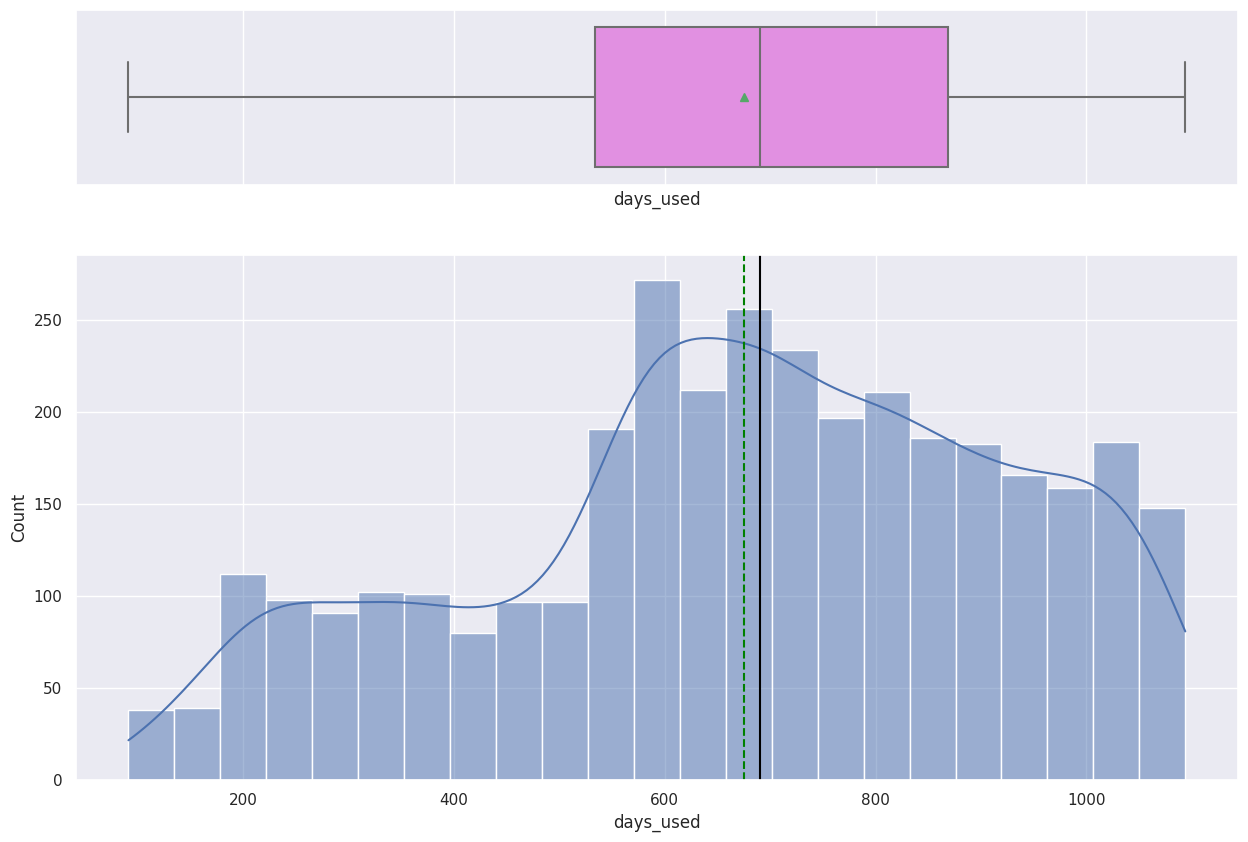

In [133]:
histogram_boxplot(df,'days_used', kde=True)

Left skewed distribution with a median of 690 days and mean of 674 days

#### Normalized new price


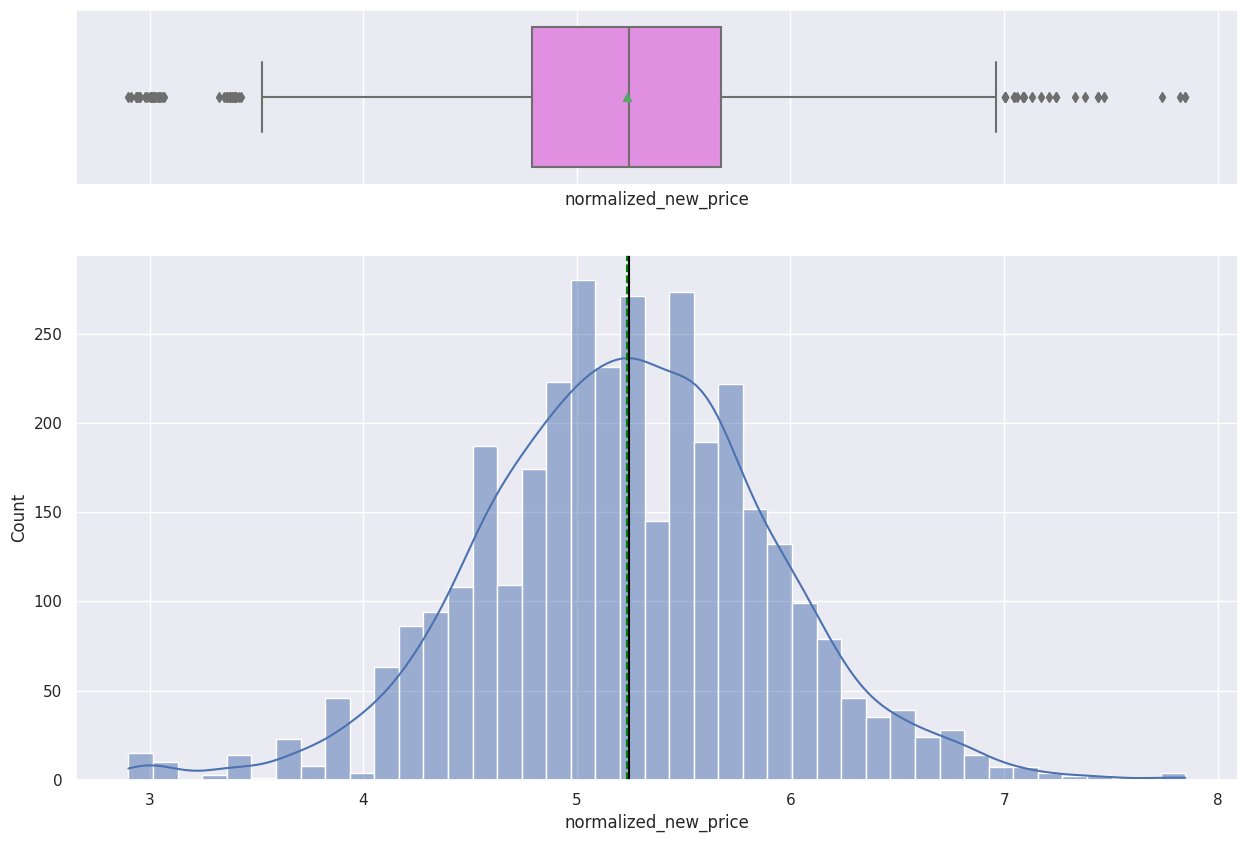

In [134]:
histogram_boxplot(df,'normalized_new_price', kde=True)

Observations:
1. Follows a normal distribution, mean ~ median
2. Outliers on both sides of the distribution

#### Normalized used price


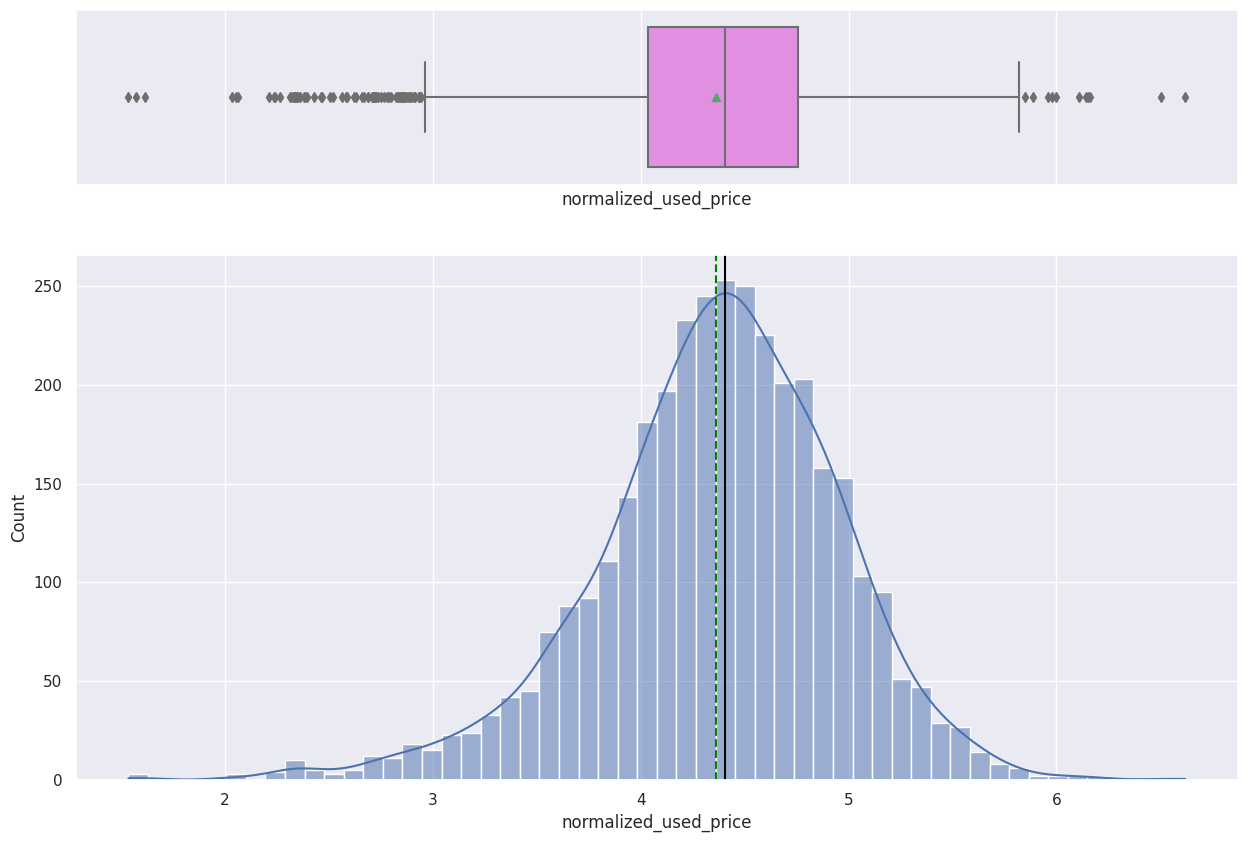

In [135]:
histogram_boxplot(df,'normalized_used_price', kde=True)

Observations:
1. Follows a normal distribution, mean ~ median
2. Outliers on both sides of the distribution

**Q1. What does the distribution of normalized used device prices look like?**

It approximately looks like a normal distribution. However, there is slight skewness towards the left tail as outliers are more in number in left side than right.

### Bivariate Analysis

#### Heatmap

In [136]:
# numerical columns list
num_col = df.select_dtypes(include=np.number).columns.tolist()
# remove release_year as not much relevant
num_col.remove("release_year")

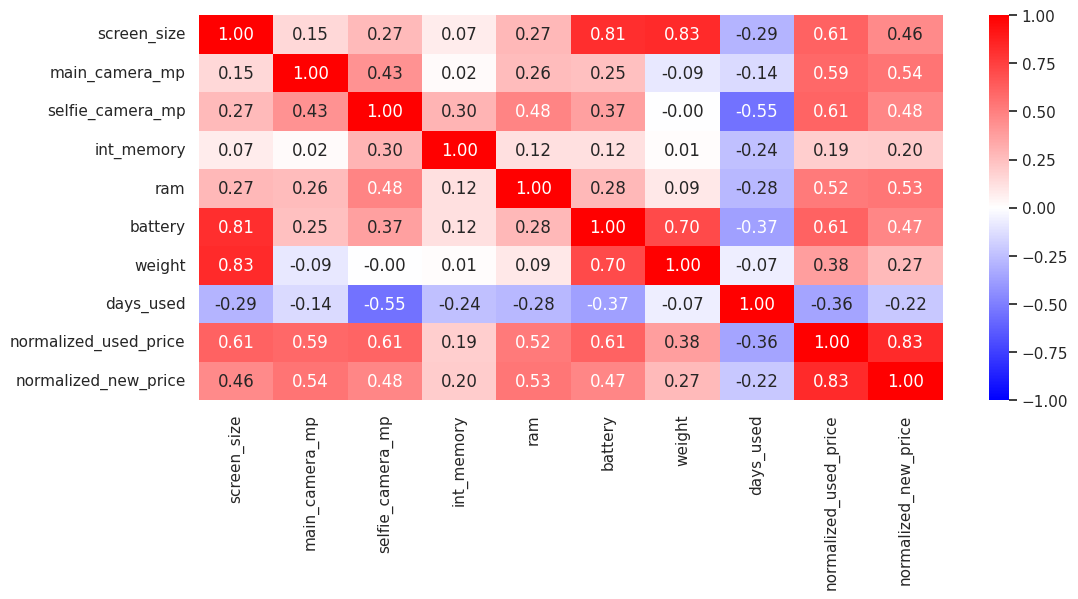

In [137]:
# heatmap
plt.figure(figsize=(12, 5))
sns.heatmap(df[num_col].corr(), annot=True, fmt='.2f', vmin=-1, cmap='bwr')
plt.show()

Observations:
1. Screen size highly correlated with battery and weight (R$^2$ = 0.81 and 0.83 respectively) implying larger the screen size, greater the weight and larger the battery power
2. Selfie camera is negatively correlated iwth days used (R$^2$ = -0.55) implying selfie camera degrades with more usage
3. Battery and weight has a strong correlation (R$^2$ = 0.70) meaning with more powerful battery the weight of the device increases
4. Normalized used price is highly correlated with normalized new price (R$^2$ = 0.83)
5. Normalized used price also has strong positive correlations with screen size, main & selfie camera and battery (R$^2$ = 0.61) and a negative correlation with days used (R$^2$ = -0.22)

**Q7. Which attributes are highly correlated with the normalized price of a used device?**

Following attributes are highly correlated with the normalized price of a used device
1. normalized new price (R$^2$ = 0.83)
2. screen size (R$^2$ = 0.61)
3. selfie_camera_mp (R$^2$ = 0.61)
4. battery (R$^2$ = 0.61)
5. main_camera_mp (R$^2$ = 0.59)
6. ram (R$^2$ = 0.52)


#### Brand name vs 4g, 5g

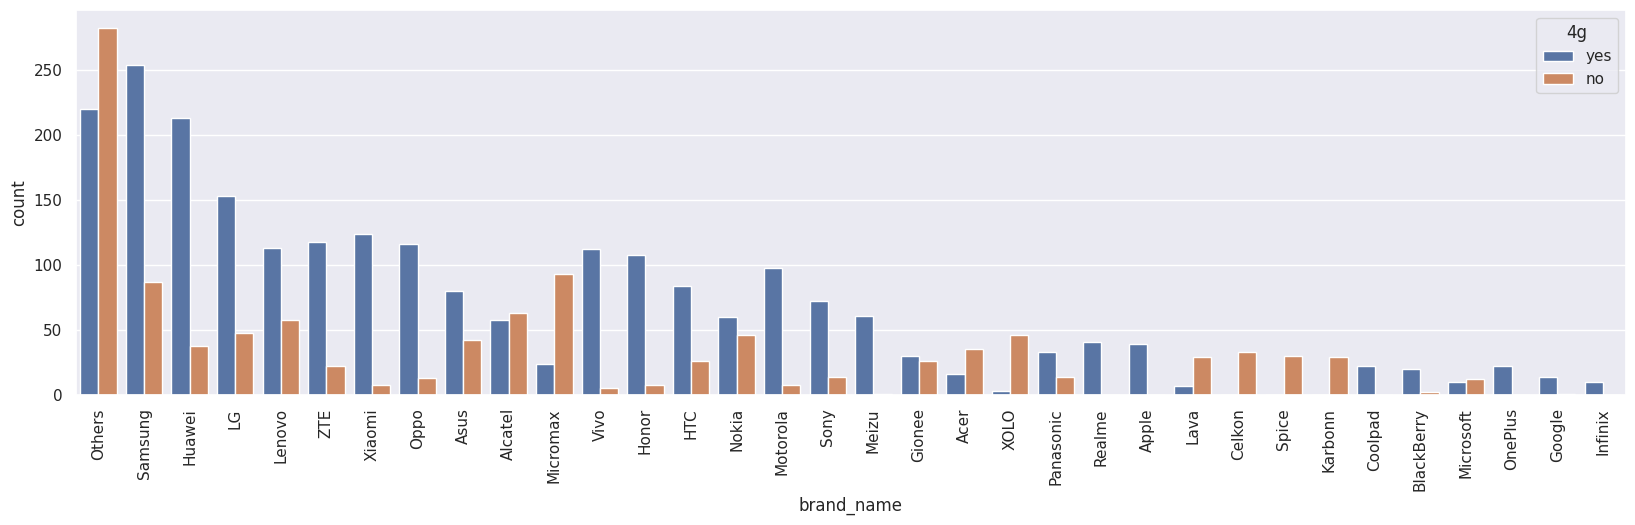

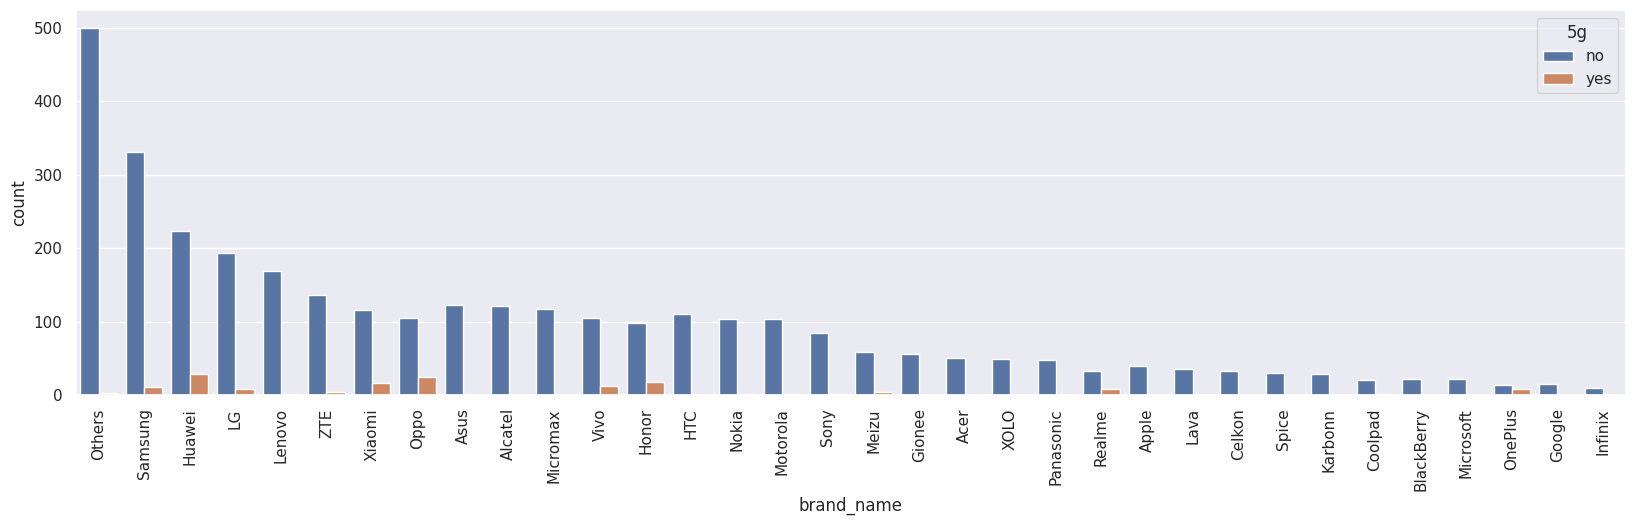

In [138]:
# 4g
plt.figure(figsize=(20, 5))
sns.countplot(data=df, x='brand_name',hue='4g', order = df['brand_name'].value_counts().index.tolist())
plt.xticks(rotation=90);
plt.show()
# 5g
plt.figure(figsize=(20, 5))
sns.countplot(data=df, x='brand_name',hue='5g', order = df['brand_name'].value_counts().index.tolist())
plt.xticks(rotation=90);
plt.show()

Observations:
1. Most of the brands have 4g
2. Only few brands: Samsung, Huawei, LG, ZTE, Oppo, Vivo, Honor, Meizu Realme and oneplus have 5g

#### Brand name vs Screen size

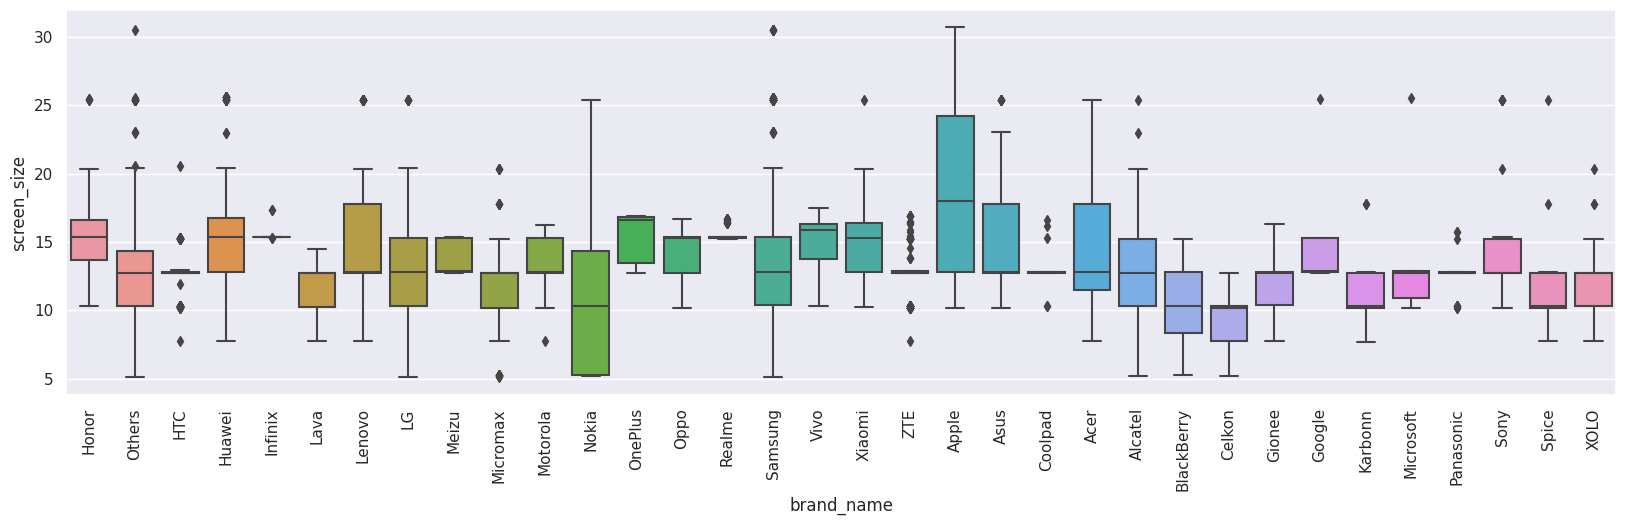

In [139]:
plt.figure(figsize=(20, 5))
sns.boxplot(data=df, x='brand_name', y='screen_size')
plt.xticks(rotation=90);

Observations:
1. Median screen size of most brands lie between 10 to 15 cm
2. Apple has the highest median screen size
3. Only Apple and Nokia have a wide range of screen size

**Q5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?**


In [150]:
# given screen sizes are in cm in the dataset. So to convert in inches, use the formula, 1 inch = 2.54 cm
df_6inches = df[df['screen_size']>(6*2.54)]

print('Number of devices with a screen size larger than 6 inches:', df_6inches.shape[0])
print(f'Percentage of devices with a screen size devices larger than 6 inches: {100*df_6inches.shape[0]/df.shape[0]:.2f}%')

print("Number of brands offering a screen size larger than 6 inches:",df_6inches['brand_name'].nunique())
print(f"Percentage of brands offering a screen size devices larger than 6 inches: {100*df_6inches['brand_name'].nunique()/df['brand_name'].nunique():.2f}%")

Number of devices with a screen size larger than 6 inches: 1099
Percentage of devices with a screen size devices larger than 6 inches: 31.82%
Number of brands offering a screen size larger than 6 inches: 31
Percentage of brands offering a screen size devices larger than 6 inches: 91.18%


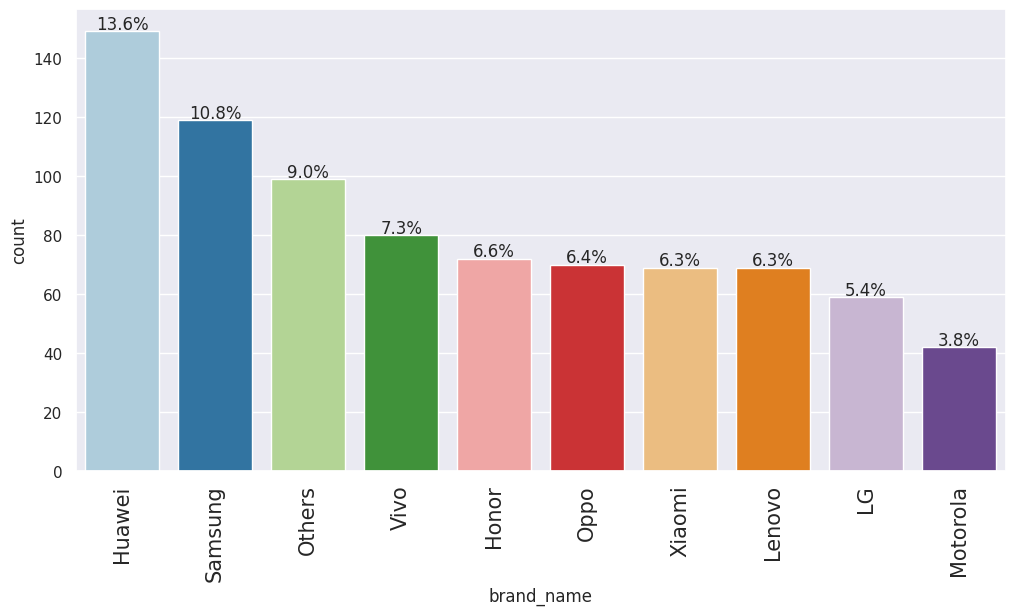

In [143]:
labeled_barplot(df_6inches, 'brand_name', perc=True, n=10)

Huawei has the most number of devices with screen size greater than 6 inches, 13.6% followed by Samsung 11% and others 9%

#### Brand name vs Camera

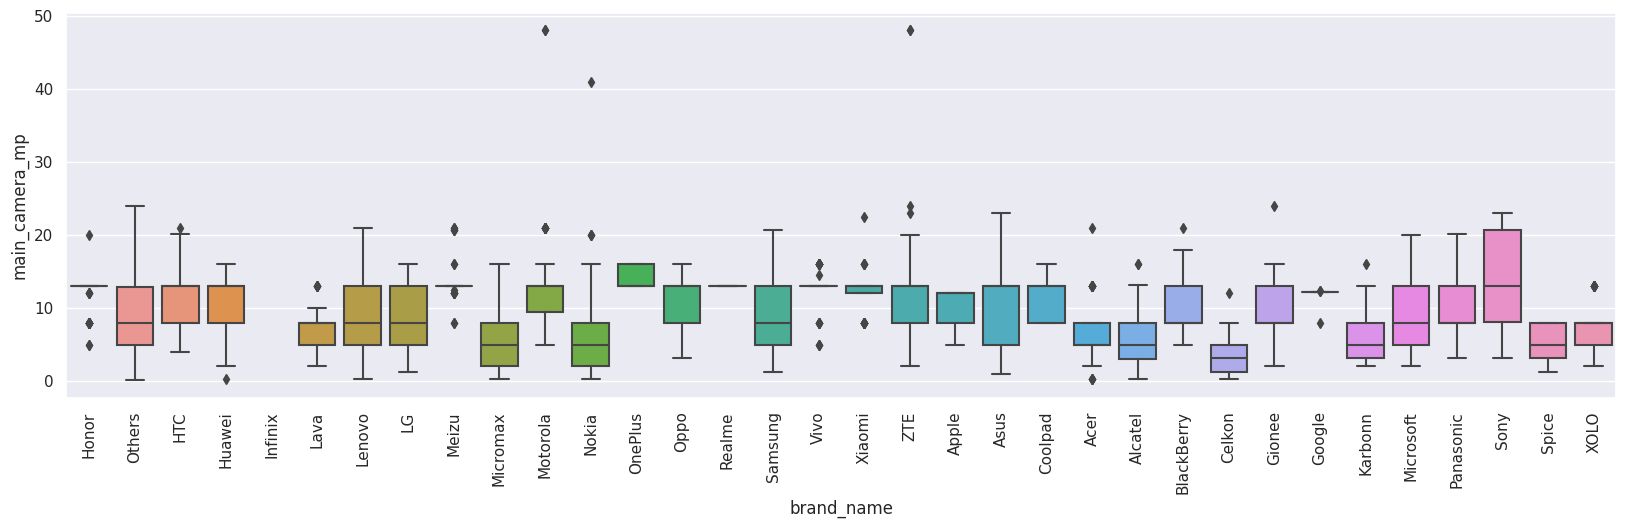

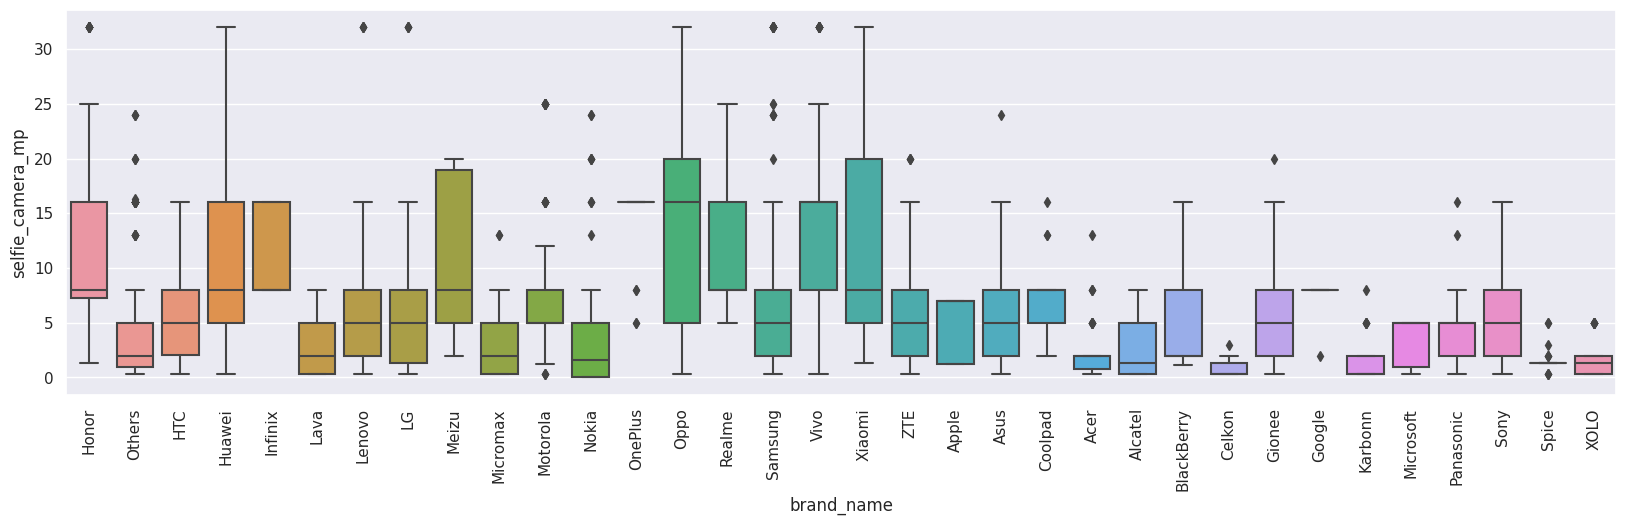

In [141]:
# main cam
plt.figure(figsize=(20, 5))
sns.boxplot(data=df, x='brand_name', y='main_camera_mp')
plt.xticks(rotation=90);
# selfie cam
plt.figure(figsize=(20, 5))
sns.boxplot(data=df, x='brand_name', y='selfie_camera_mp')
plt.xticks(rotation=90);

Observations:
1. The median for main camera and selfie camera resolution of most of the brands lies under 15 MP and 10 MP respectively
2. Some brands have higher range of selfie camera resolution compared to that of main camera e.g. Honor, Huawei, Meizu, Oppo and Xiomi
3. Infinix have no data for main camera resolution but has data for selfie camera resolution

**Q6. A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?**


In [151]:
df_8mp = df[df['selfie_camera_mp']>8]

print('Number of devices with selfie camera greater than 8MP:', df_8mp.shape[0])
print(f'Percentage of devices with selfie camera greater than 8MP: {100*df_8mp.shape[0]/df.shape[0]:.2f}%')

print("Number of brands offering selfie camera greater than 8MP:",df_8mp['brand_name'].nunique())
print(f"Percentage of brands offering selfie camera greater than 8MP: {100*df_8mp['brand_name'].nunique()/df['brand_name'].nunique():.2f}%")

Number of devices with selfie camera greater than 8MP: 655
Percentage of devices with selfie camera greater than 8MP: 18.96%
Number of brands offering selfie camera greater than 8MP: 25
Percentage of brands offering selfie camera greater than 8MP: 73.53%


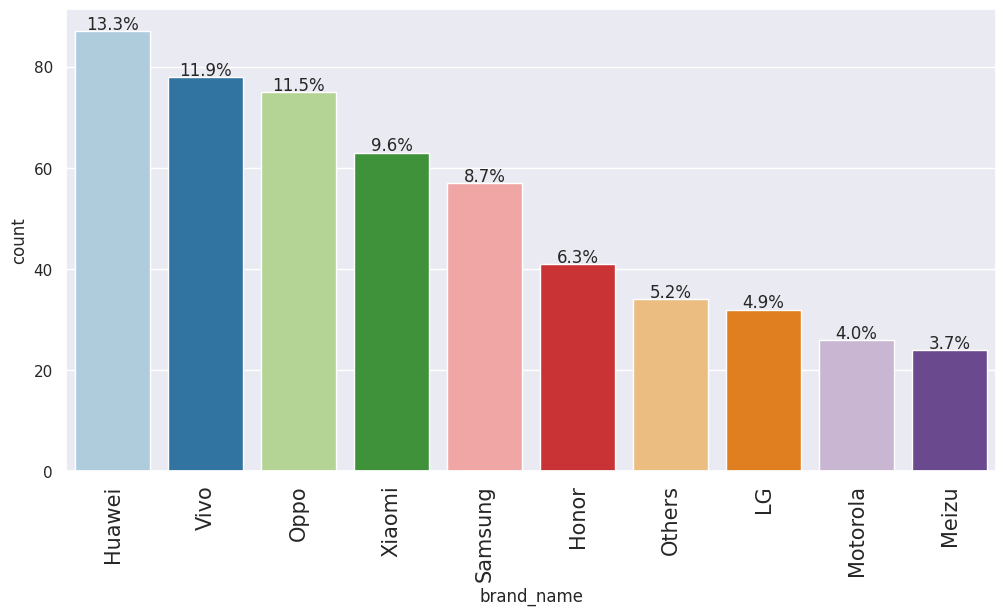

In [154]:
labeled_barplot(df_8mp, 'brand_name', perc=True, n=10)

Huawei has the most devices with selfie camera greater than 8 MP (13%), followed by Vivo and Oppo (~12% each)

#### Brand name vs Int memory

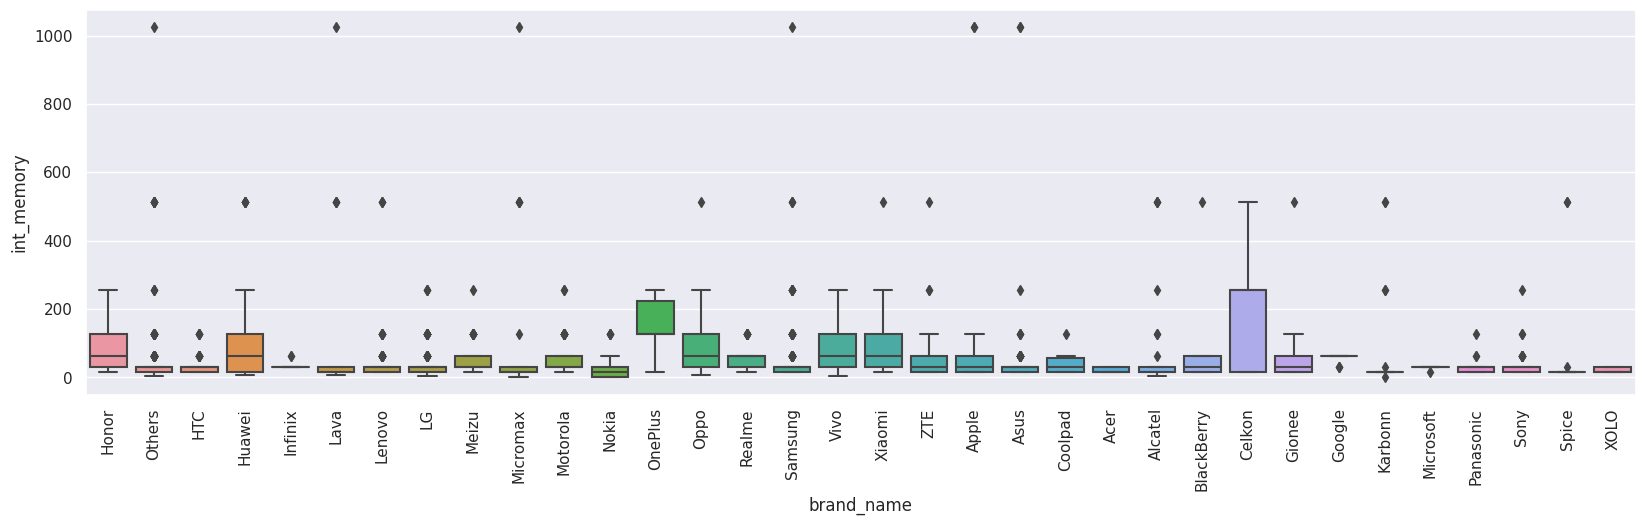

In [155]:
plt.figure(figsize=(20, 5))
sns.boxplot(data=df, x='brand_name', y='int_memory')
plt.xticks(rotation=90);

Observations:
1. Most of the medians lie between 0 to 200 GB
2. Outliers present for almost all the brands

#### Brand name vs RAM

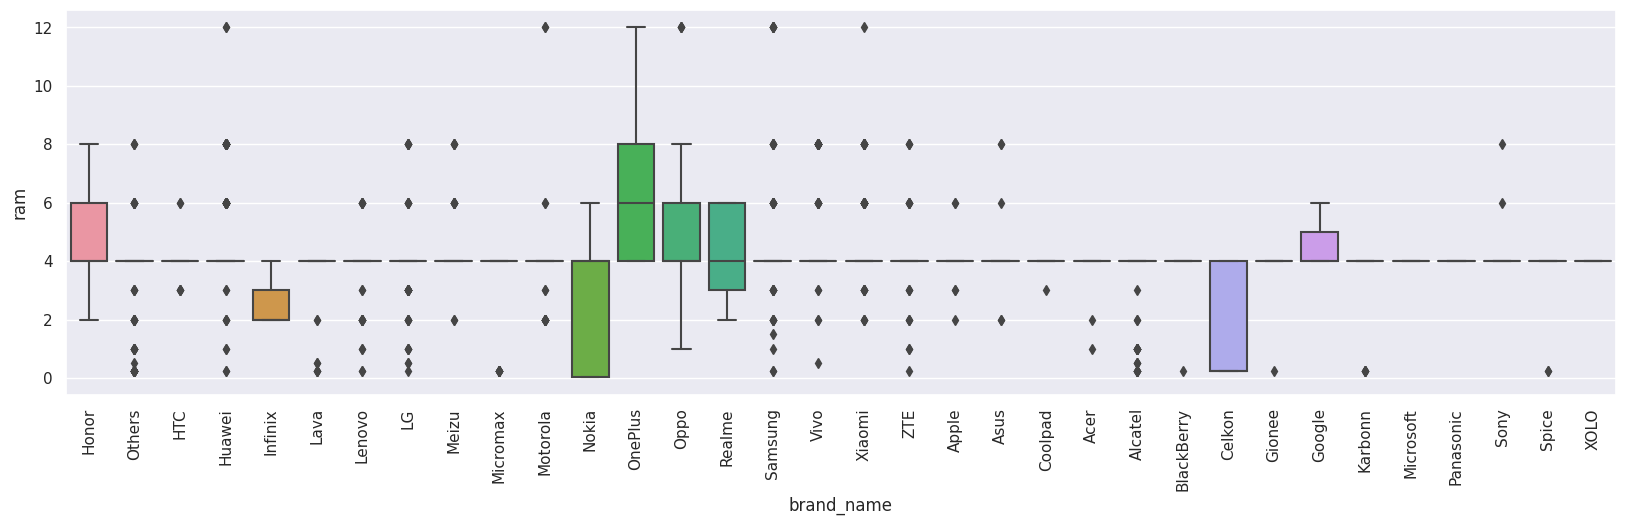

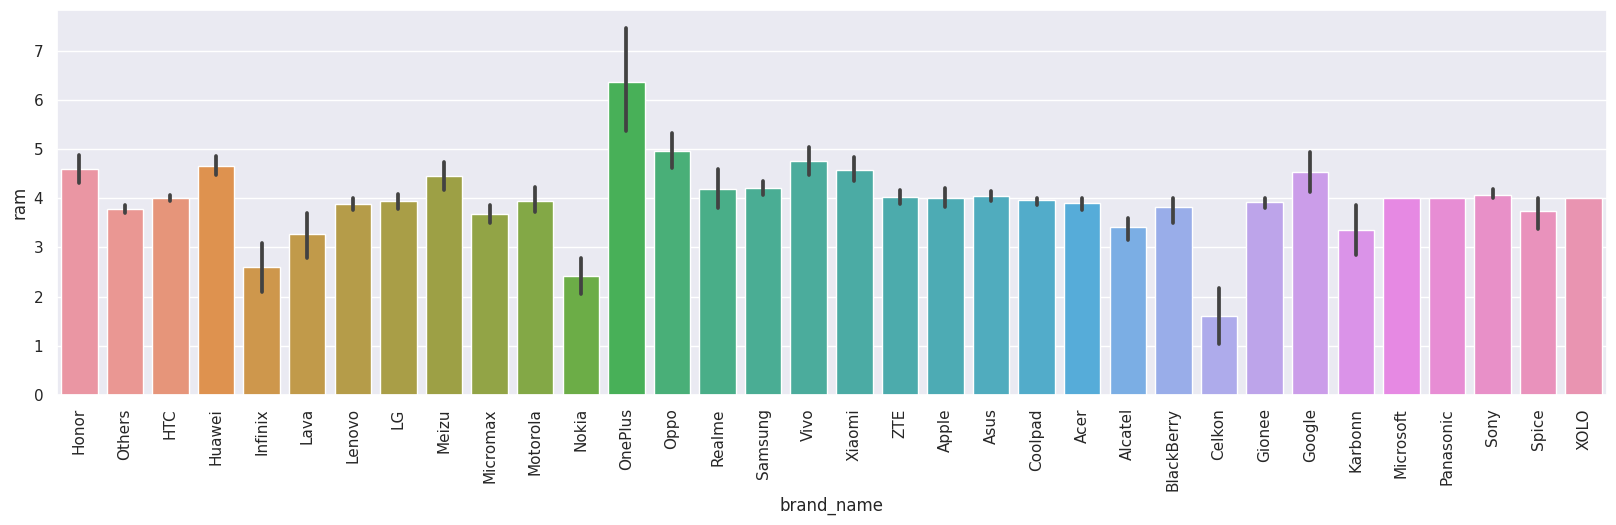

In [156]:
plt.figure(figsize=(20,5))
sns.boxplot(data=df, x='brand_name', y='ram')
plt.xticks(rotation=90);
plt.show()

plt.figure(figsize=(20,5))
plt.xticks(rotation=90)
sns.barplot(data=df, x='brand_name', y='ram')
plt.show()

**Q3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?**


Observations:
1. Most of the brands have at least 4 GB RAM
2. Infinix, Nokia and Chelkon have less than 4 GB RAM, Chelkon having the least RAM of all
3. Oneplus has the highest RAM median
4. Most of the brands have outliers meaning all the brands offer 4 GB or higher RAM but it is not that common

#### Brand name vs Battery

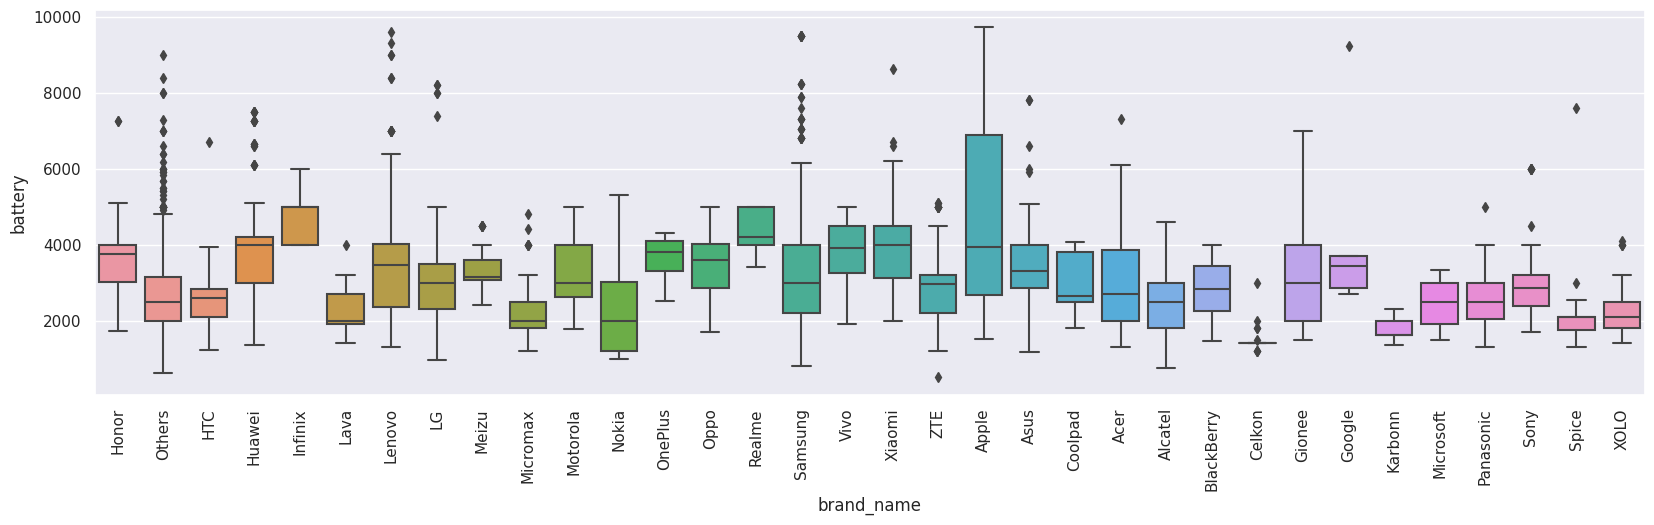

In [162]:
plt.figure(figsize=(20,5))
sns.boxplot(data=df, x='brand_name', y='battery')
plt.xticks(rotation=90);
plt.show()

Observations:
1. Most of the brands median battery capacity is within 2000-4000 mAh
2. Infinix and Realme have median battery capacity > 4000 mAh
3. Applt has the highest range of battery capacities
4. Outliers on higher values of battery capacity

#### Brand name vs weight

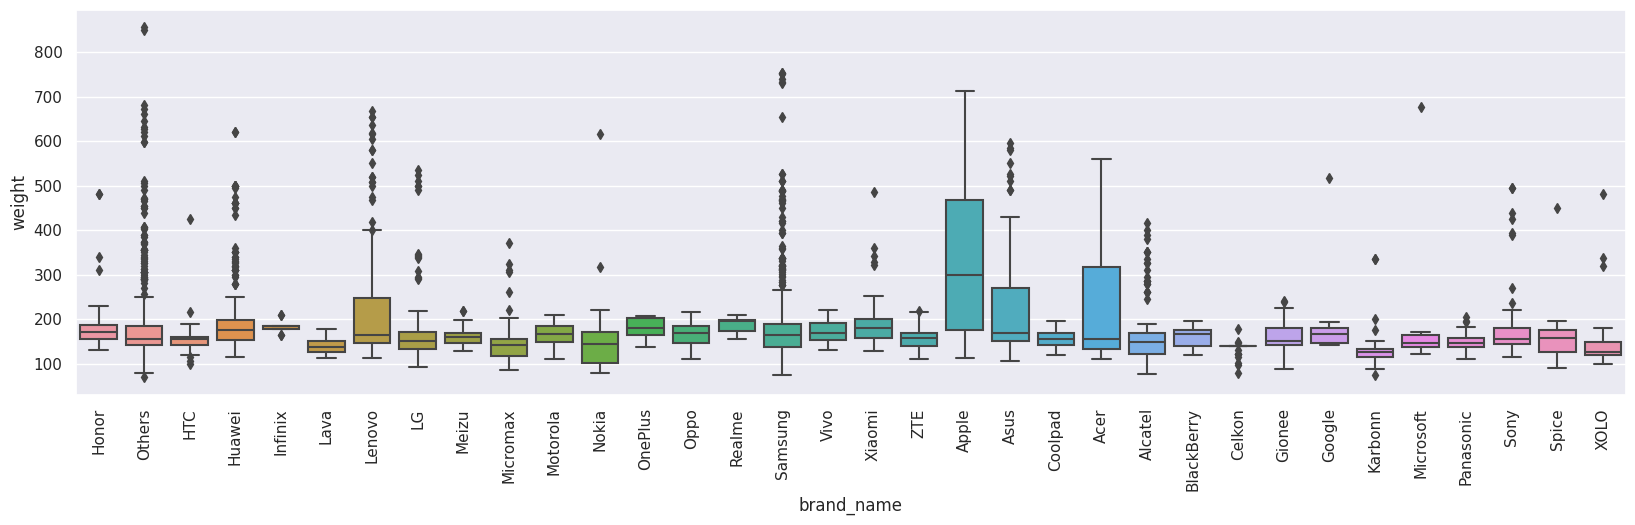

In [163]:
plt.figure(figsize=(20,5))
sns.boxplot(data=df, x='brand_name', y='weight')
plt.xticks(rotation=90);
plt.show()

Observations:
1. For all the brands except Apple, median weight lies between 100-200 grams
2. Apple is the heaviest with higher median value than others as well as higher range of weight
3. Again outliers on the higher side of the weight

**Q4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?**


In [166]:
large_battery = df[df['battery']>4500]

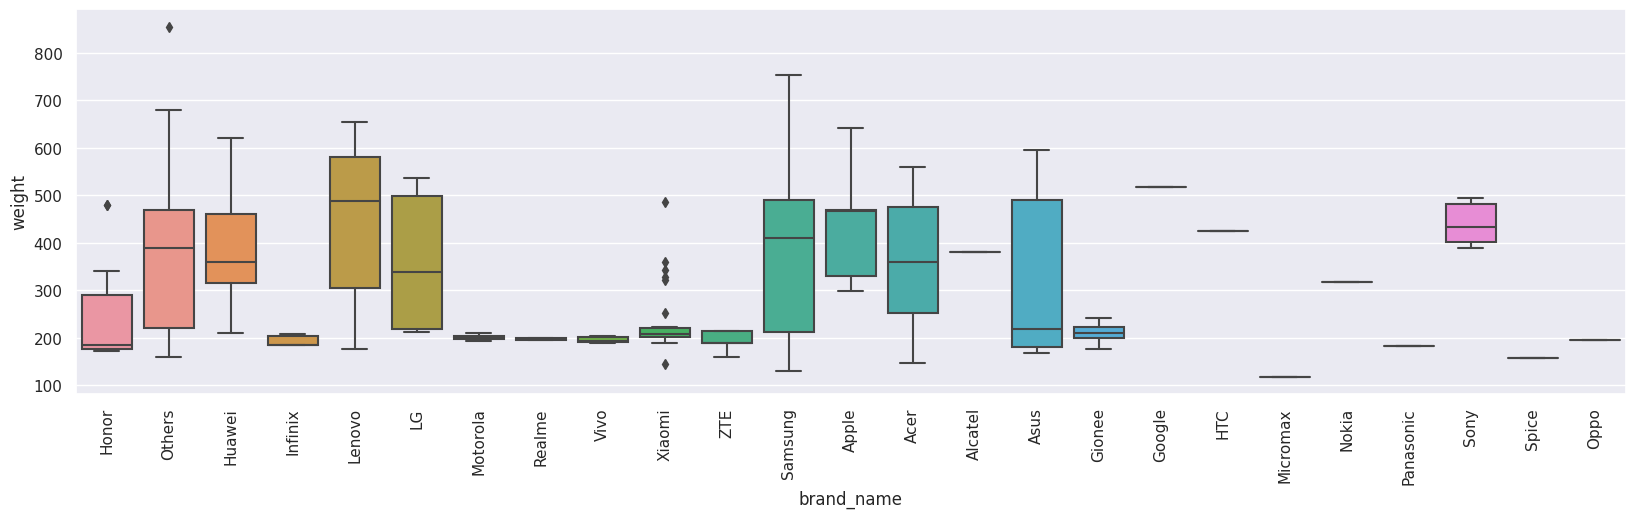

In [185]:
plt.figure(figsize=(20,5))
sns.boxplot(data=large_battery, x='brand_name', y='weight')
plt.xticks(rotation=90);
plt.show()

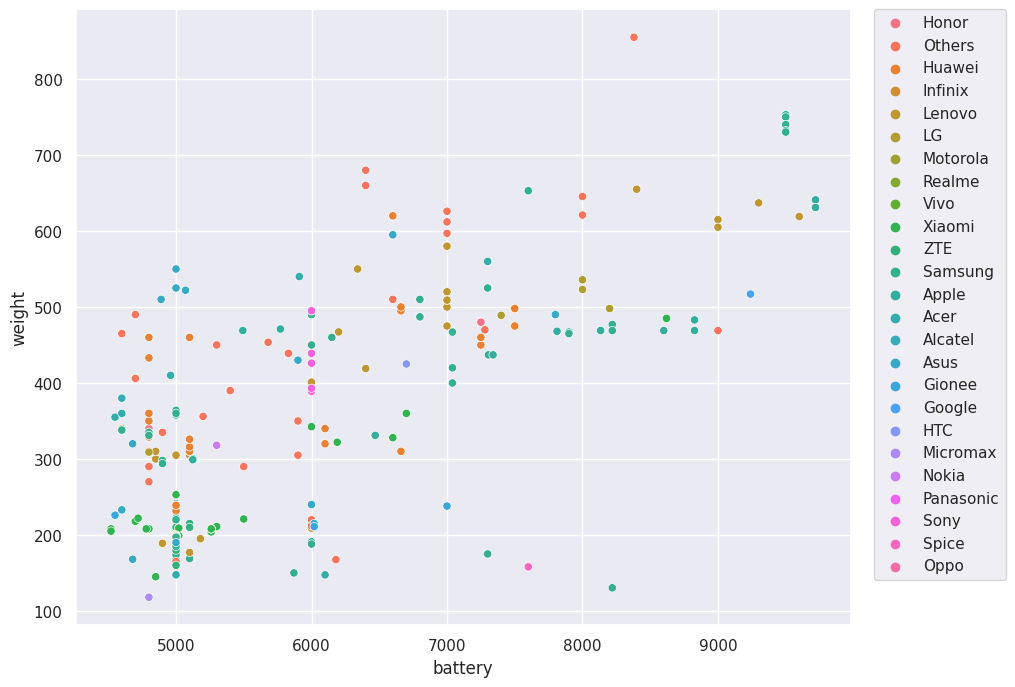

In [184]:
plt.figure(figsize = (10,8))
sns.scatterplot(data=large_battery, x='battery', y='weight',hue='brand_name')
plt.legend(bbox_to_anchor=(1.2, 1), borderaxespad=0)
plt.show()

Observations:
1. Clearly as battery capacity increases, the weight of the devices also increases almost linearly
2. Google makes the heaviest devices whereas Micromax has the lighest for capacity>4500 mAh

#### Brand name vs Days used

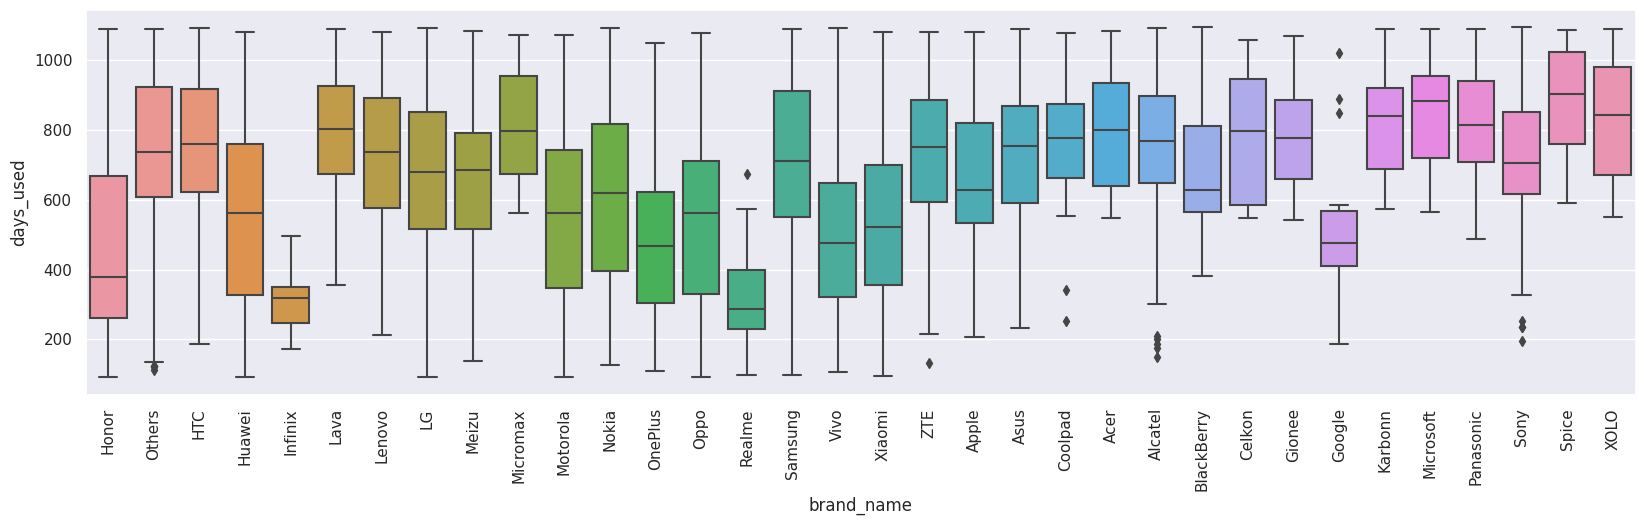

In [186]:
plt.figure(figsize=(20,5))
sns.boxplot(data=df, x='brand_name', y='days_used')
plt.xticks(rotation=90);
plt.show()

Observations:
1. Most of the brands median for days used lies between 600 - 800 days
2. Honor, Infinix, Realme have median days used less than 400 days while Google has that less than than 600 days
3. Karbonn, Microsoft, Spice and Xolo have mdeian days used > 800 days

#### Brand name vs price

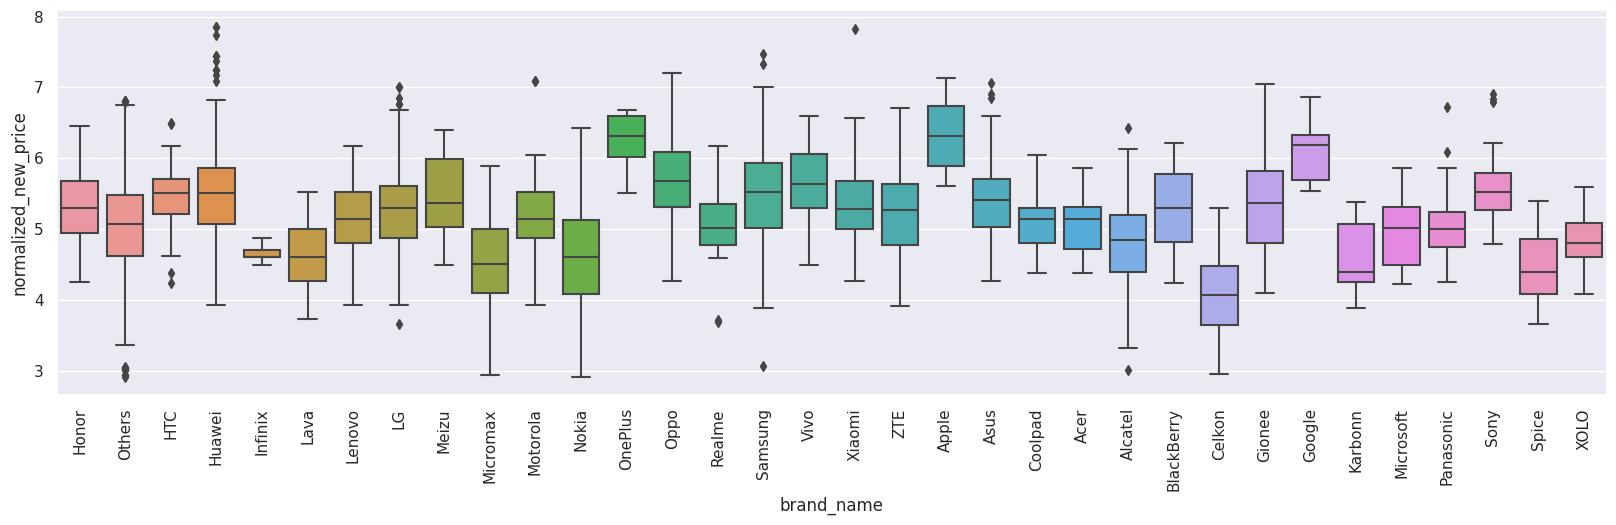

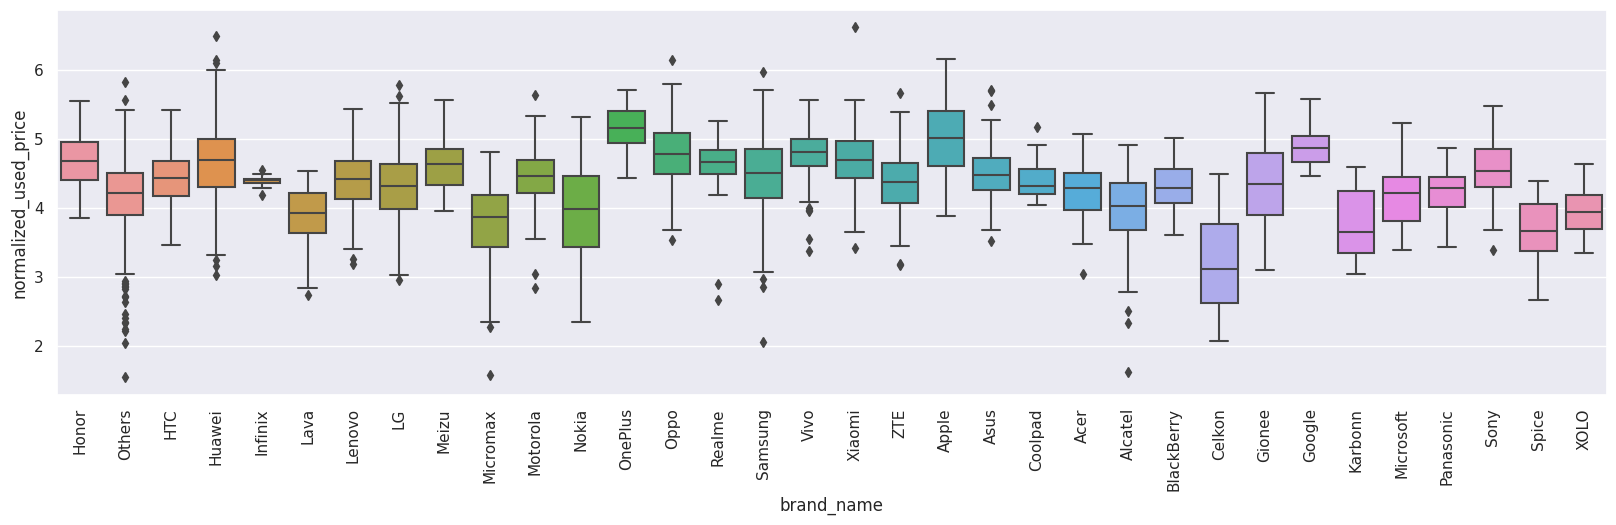

In [187]:
# new price
plt.figure(figsize=(20, 5))
sns.boxplot(data=df, x='brand_name', y='normalized_new_price')
plt.xticks(rotation=90);
# used price
plt.figure(figsize=(20, 5))
sns.boxplot(data=df, x='brand_name', y='normalized_used_price')
plt.xticks(rotation=90);

Observations:
1. Median of normalized_new_price for most of the devices lies between 5-6 euros
2. Median of normalized_new_price for most of the devices lies between 4-5 euros
3. Ranges of both the prices are quite similar

#### 4g, 5g vs price, usage

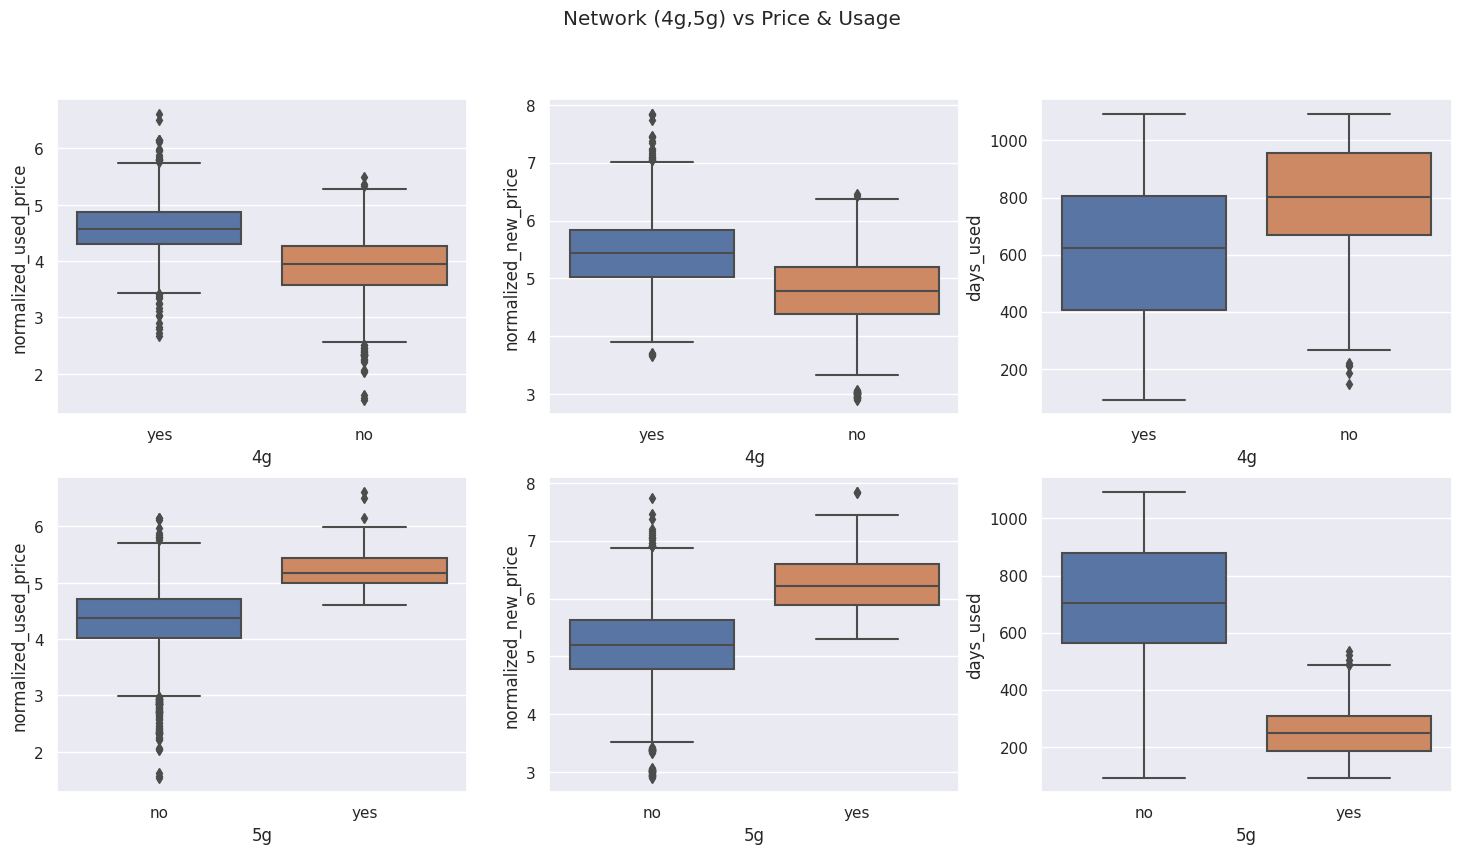

In [209]:
fig, axes = plt.subplots(2,3, figsize=(18, 9))
fig.suptitle('Network (4g,5g) vs Price & Usage')
sns.boxplot(ax=axes[0,0],data=df, x='4g', y='normalized_used_price')
sns.boxplot(ax=axes[0,1],data=df, x='4g', y='normalized_new_price')
sns.boxplot(ax=axes[0,2],data=df, x='4g', y='days_used')
sns.boxplot(ax=axes[1,0],data=df, x='5g', y='normalized_used_price')
sns.boxplot(ax=axes[1,1],data=df, x='5g', y='normalized_new_price')
sns.boxplot(ax=axes[1,2],data=df, x='5g', y='days_used')
plt.show()

Observations:
1. For devices with 4g and 5g, prices are high
2. Usage is high for devices without 4g and 5g

#### OS vs price, battery, usage

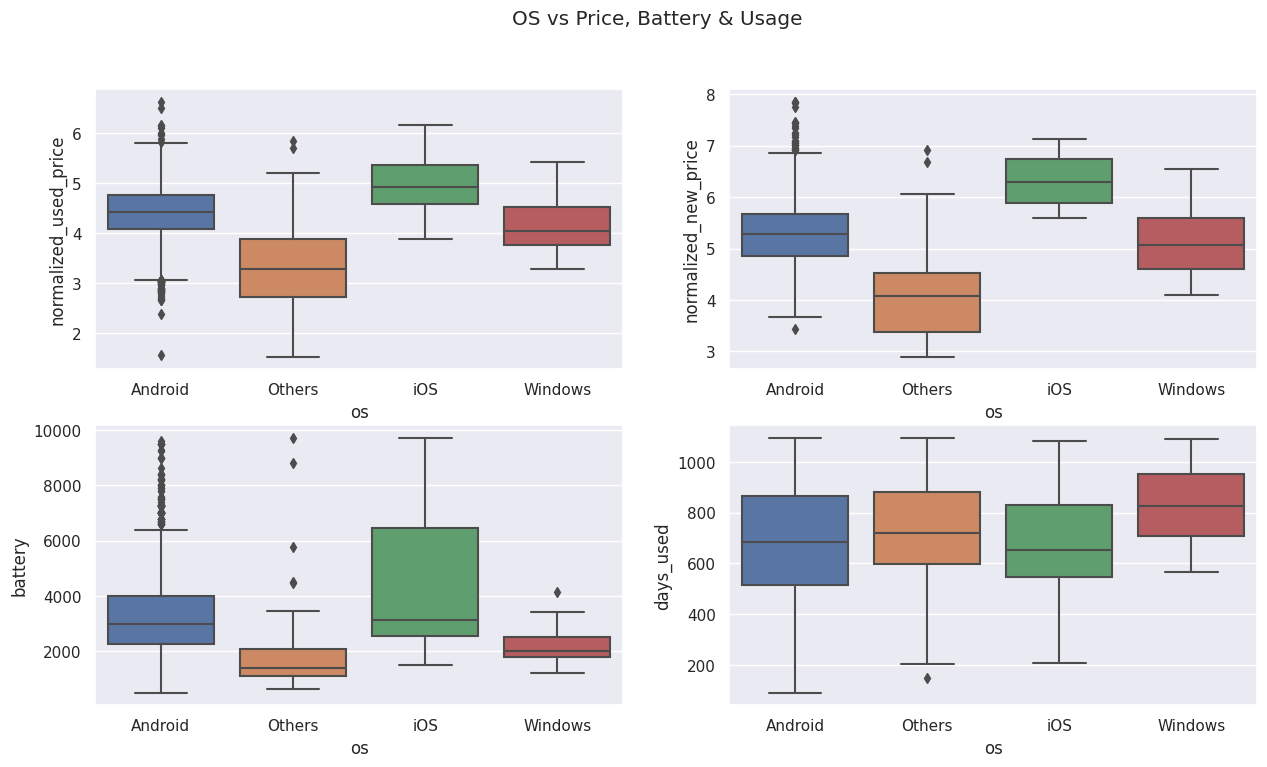

In [214]:
fig, axes = plt.subplots(2,2, figsize=(15, 8))
fig.suptitle('OS vs Price, Battery & Usage')
sns.boxplot(ax=axes[0,0],data=df, x='os', y='normalized_used_price')
sns.boxplot(ax=axes[0,1],data=df, x='os', y='normalized_new_price')
sns.boxplot(ax=axes[1,0],data=df, x='os', y='battery')
sns.boxplot(ax=axes[1,1],data=df, x='os', y='days_used')
plt.show()

Observations:
1. IOS has the very high median price compared to others
2. IOS has a widest range for battery capacity
3. Windows has the highest median of days used

#### Release year vs Price

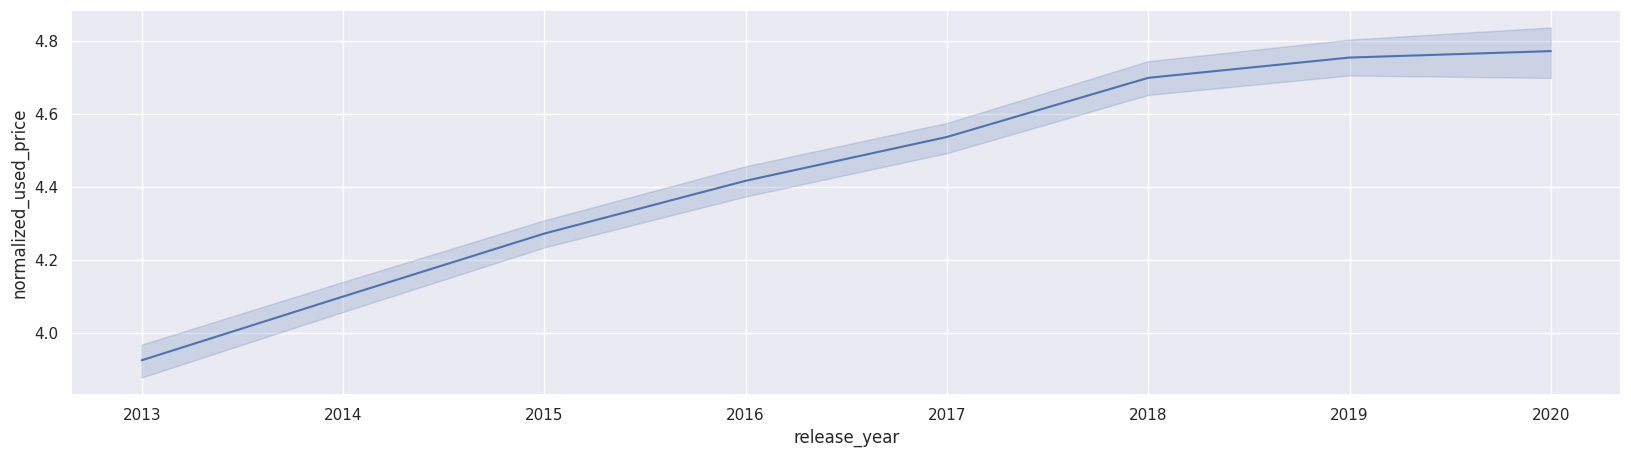

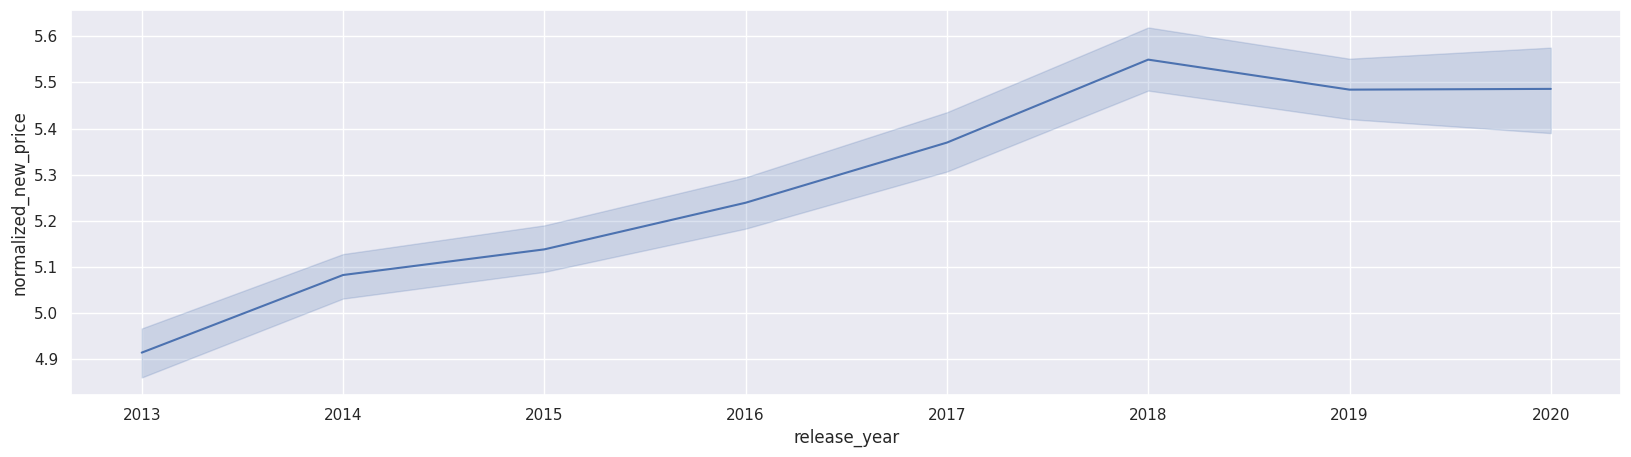

In [219]:
plt.figure(figsize=(20, 5))
sns.lineplot(data=df, x='release_year', y='normalized_used_price');

plt.figure(figsize=(20, 5))
sns.lineplot(data=df, x='release_year', y='normalized_new_price');

Observations:
1. With years normalized used prices increase
2. from 2013-2018, normalized used prices increased at a more rapid rate than that from 2018
3. from 2013-2018, normalized used prices increased but declined from 2018

#### Release year vs Camera

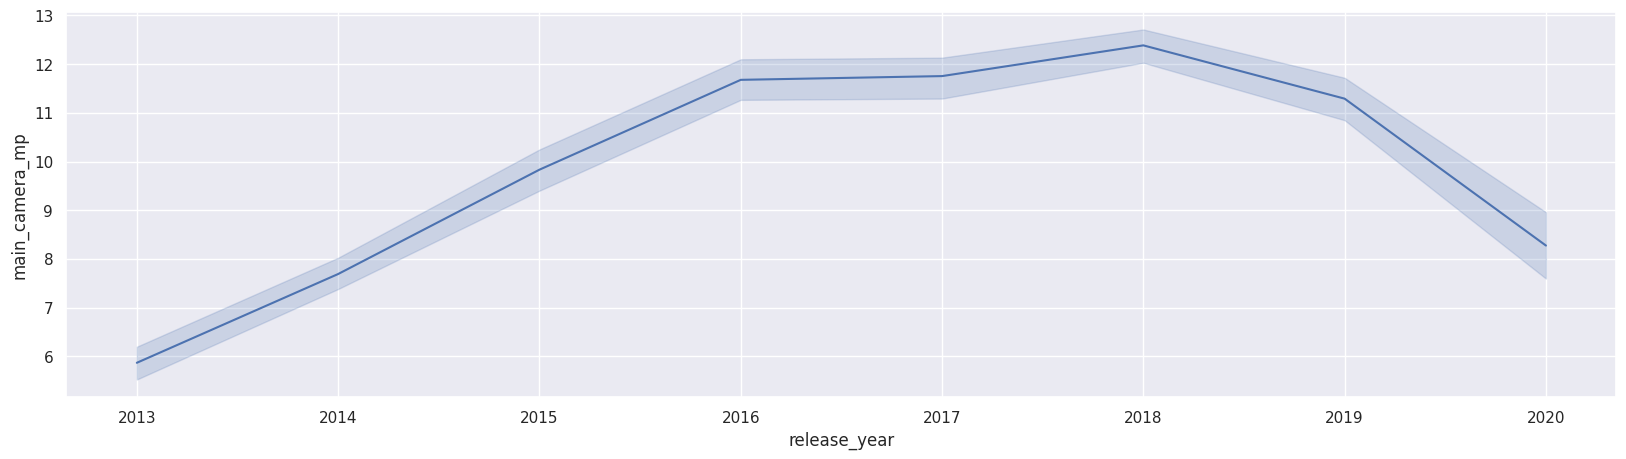

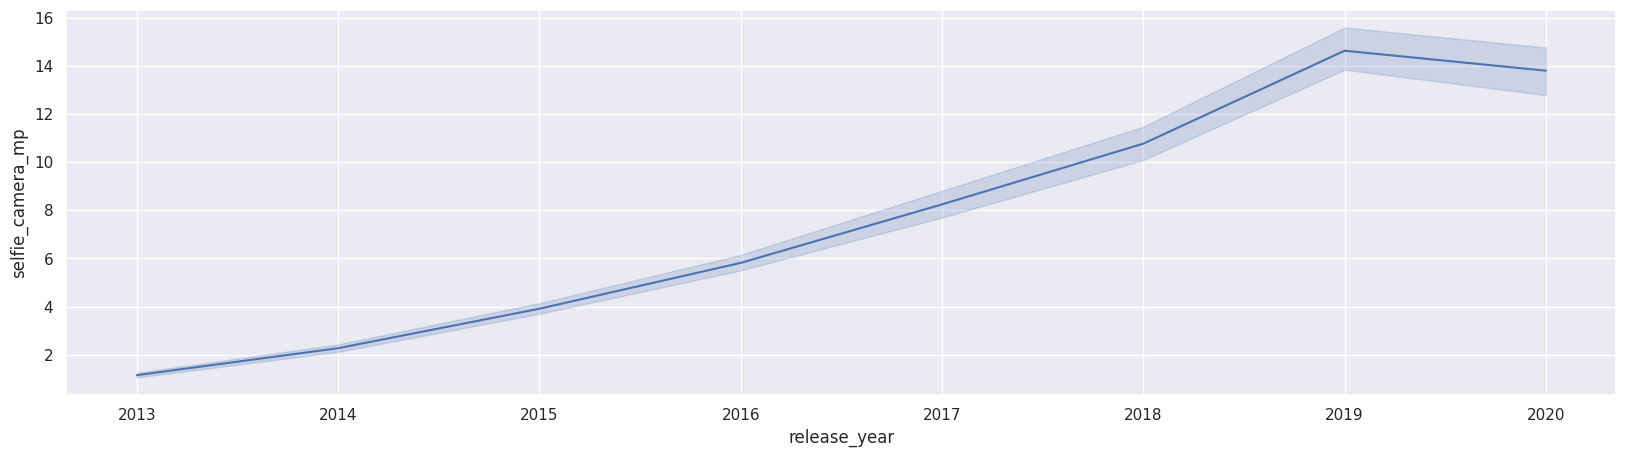

In [220]:
plt.figure(figsize=(20, 5))
sns.lineplot(data=df, x='release_year', y='main_camera_mp');

plt.figure(figsize=(20, 5))
sns.lineplot(data=df, x='release_year', y='selfie_camera_mp');

Observations:
1. With year, the quality of camera has increased but there's a drop in main camera quality after 2018
2. The quality improvement of main camera was sharpest between 2013-16
3. The quality of selfie camera degraded a little after 2019

#### Release year vs Battery, Screen Size, Weight

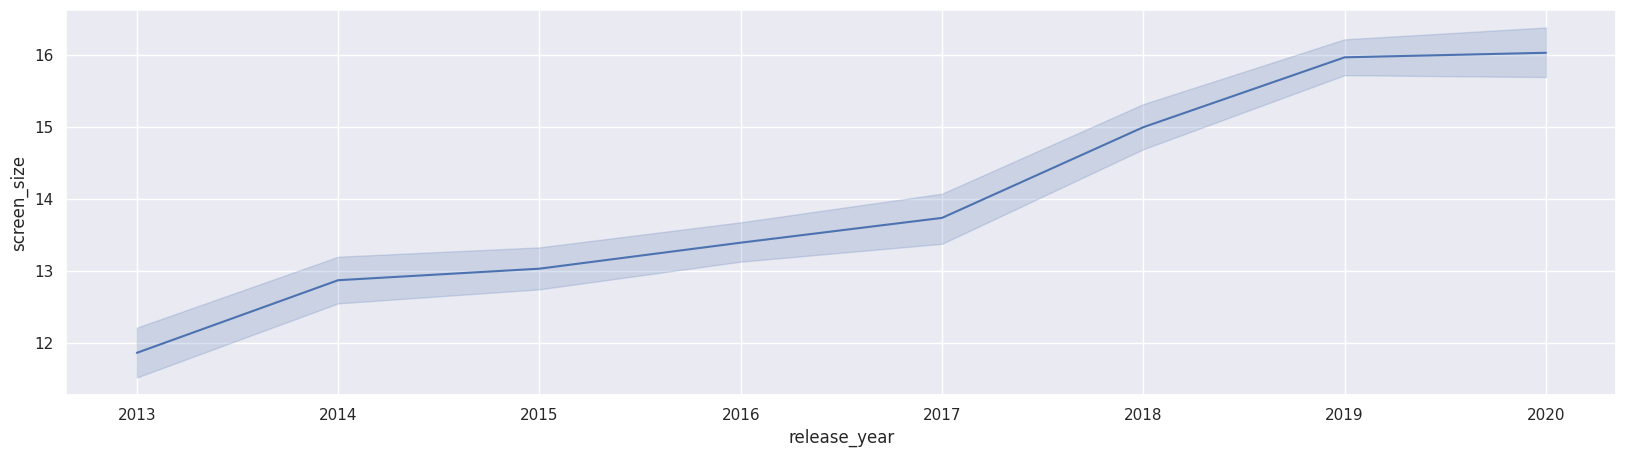

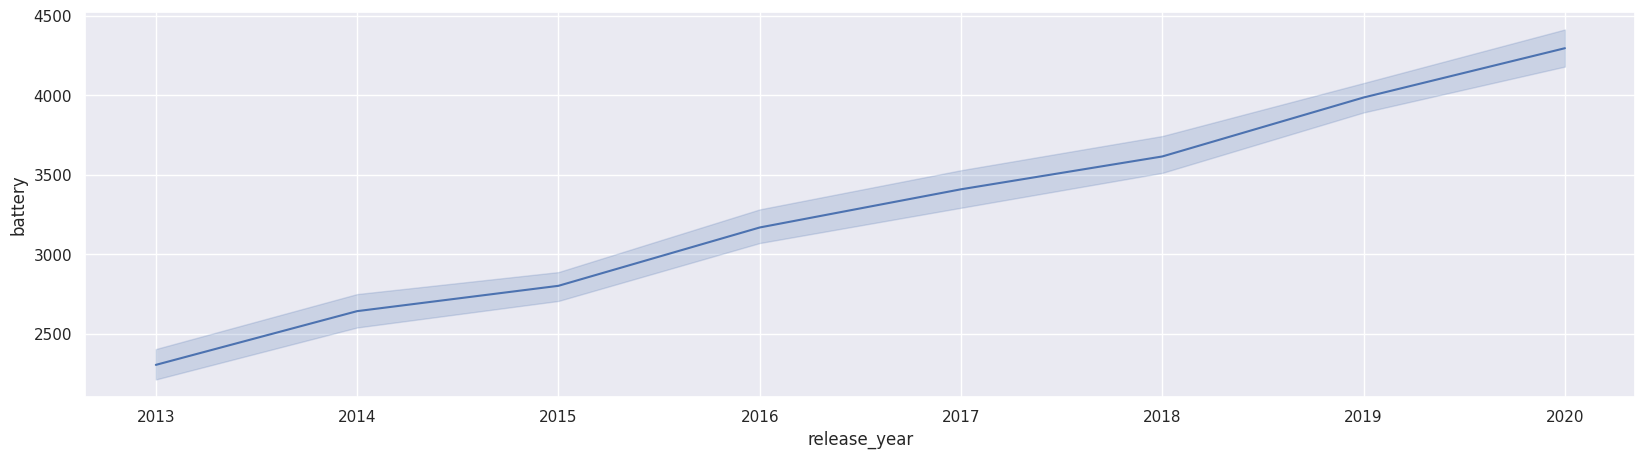

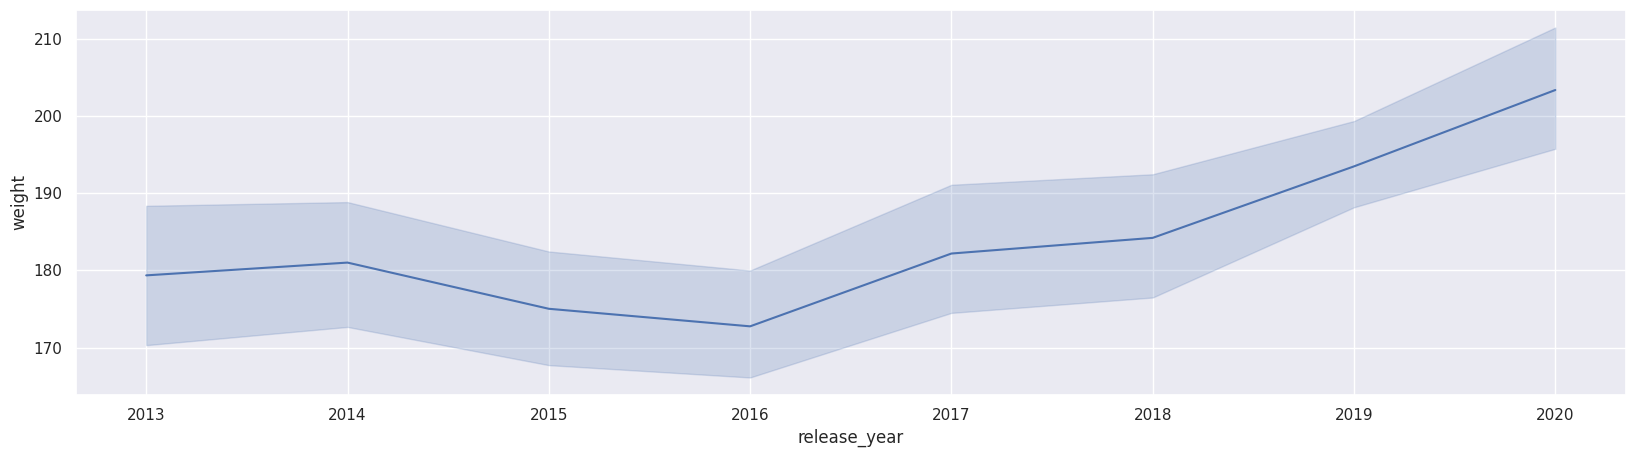

In [221]:
plt.figure(figsize=(20, 5))
sns.lineplot(data=df, x='release_year', y='screen_size');

plt.figure(figsize=(20, 5))
sns.lineplot(data=df, x='release_year', y='battery');

plt.figure(figsize=(20, 5))
sns.lineplot(data=df, x='release_year', y='weight');

Observations:
1. With year, screen size and battery capacity increase
2. weight decreased from 2014-2016 but again increased after 2016

#### **Answers to the Questions**:

1. What does the distribution of normalized used device prices look like?
> It approximately looks like a normal distribution. However, there is slight skewness towards the left tail as outliers are more in number in left side than right.
2. What percentage of the used device market is dominated by Android devices?
> Android dominates 93% of the used device market
3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?
> 1. Most of the brands have at least 4 GB RAM
  2. Infinix, Nokia and Chelkon have less than 4 GB RAM, Chelkon having the least RAM of all
  3. Oneplus has the highest RAM median
  4. Most of the brands have outliers meaning all the brands offer 4 GB or higher RAM but it is not that common
4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?
>1. Clearly as battery capacity increases, the weight of the devices also increases almost linearly
  2. Google makes the heaviest devices whereas Micromax has the lighest for capacity> 4500 mAh
5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?
> 1. Number of devices with a screen size larger than 6 inches: 1099
  2. Percentage of devices with a screen size devices larger than 6 inches: 31.82%
  3. Number of brands offering a screen size larger than 6 inches: 31
  4. Percentage of brands offering a screen size devices larger than 6 inches: 91.18%
  5. Huawei has the most number of devices with screen size greater than 6 inches, 13.6% followed by Samsung 11% and others 9%
6. A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?
> 1. Number of devices with selfie camera greater than 8MP: 655
  2. Percentage of devices with selfie camera greater than 8MP: 18.96%
  3. Number of brands offering selfie camera greater than 8MP: 25
  4. Percentage of brands offering selfie camera greater than 8MP: 73.53%
  5. Huawei has the most number of devices with screen size greater than 6 inches, 13.6% followed by Samsung 11% and others 9%
7. Which attributes are highly correlated with the normalized price of a used device?
> Following attributes are highly correlated with the normalized price of a used device
  1. normalized new price (R$^2$ = 0.83)
  2. screen size (R$^2$ = 0.61)
  3. selfie_camera_mp (R$^2$ = 0.61)
  4. battery (R$^2$ = 0.61)
  5. main_camera_mp (R$^2$ = 0.59)
  6. ram (R$^2$ = 0.52)

## Data Preprocessing

- Missing value treatment
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

#### Missing value treatment

In [4]:
# to find the total no of missing values
df.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

Missing values are there in:
1. main_camera_mp: 179
2. selfie_camera_mp: 2
3. int_memory: 4
4. ram: 4
5. battery: 6
6. weight: 7


In [3]:
# lets analyze the missing values pattern in main camera
miss_main = df[df['main_camera_mp'].isnull()]
miss_main[['brand_name','release_year']].value_counts()

brand_name  release_year
Realme      2020            24
Xiaomi      2020            23
Oppo        2020            20
Motorola    2020            18
Vivo        2020            14
Realme      2019            12
Meizu       2019            11
OnePlus     2019             8
Infinix     2020             6
Sony        2019             5
Asus        2019             4
OnePlus     2020             4
ZTE         2020             4
BlackBerry  2018             4
Meizu       2020             4
Infinix     2019             4
OnePlus     2018             3
            2017             2
Panasonic   2018             2
Lava        2020             2
Sony        2020             2
Coolpad     2020             1
            2019             1
            2018             1
dtype: int64

There are certain missing values for different brands in different years. So, instead of filling values by median of all values, it would make more sense to take the median of groups made by brands and release year.

In [5]:
# creating a list of columns with missing values
miss_cols = ['main_camera_mp', 'selfie_camera_mp', 'int_memory', 'ram', 'battery', 'weight']

In [6]:
# fill the mssing values with median of the groups by brand and year

for col in miss_cols:
  df[col] = df[col].fillna(value=df.groupby(['brand_name','release_year'])[col].transform('median'))

df.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 0
ram                        0
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

Still, missing values remaining in main_camera_mp, selfie_camera_mp, battery, weight

In [7]:
still_miss_cols = ['main_camera_mp', 'selfie_camera_mp', 'battery', 'weight']

In [8]:
# fill the mssing values with median of the groups by brand

for col in still_miss_cols:
  df[col] = df[col].fillna(value=df.groupby(['brand_name'])[col].transform('median'))

df.isnull().sum()

brand_name                0
os                        0
screen_size               0
4g                        0
5g                        0
main_camera_mp           10
selfie_camera_mp          0
int_memory                0
ram                       0
battery                   0
weight                    0
release_year              0
days_used                 0
normalized_used_price     0
normalized_new_price      0
dtype: int64

Still 10 missing vakues in main_camera_mp. They'll be replaced with median.

In [9]:
df['main_camera_mp']=df['main_camera_mp'].fillna(value=df['main_camera_mp'].median())
df.isnull().sum()

brand_name               0
os                       0
screen_size              0
4g                       0
5g                       0
main_camera_mp           0
selfie_camera_mp         0
int_memory               0
ram                      0
battery                  0
weight                   0
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
dtype: int64

All missing values treated. No missing values present in the final dataset.

#### Feature engineering

Instead of using release_years, the time for which device has been running since release would be more relevant for the analysis.

We can standardalize it by making a particular year as base and all the other years would be their respective difference from the base year.

Transform the release_year to year_since_release

base_year = max(release_year) + 1 = 2021

Transform the values
values = 2021 - year

In [10]:
df['year_since_release']=2021-df['release_year']
df.drop('release_year',axis=1, inplace=True)
df['year_since_release'].describe()

count    3454.000000
mean        5.034742
std         2.298455
min         1.000000
25%         3.000000
50%         5.500000
75%         7.000000
max         8.000000
Name: year_since_release, dtype: float64

#### Outlier detection and treatment

In [11]:
# numerical columns list
num_col = df.select_dtypes(include=np.number).columns.tolist()

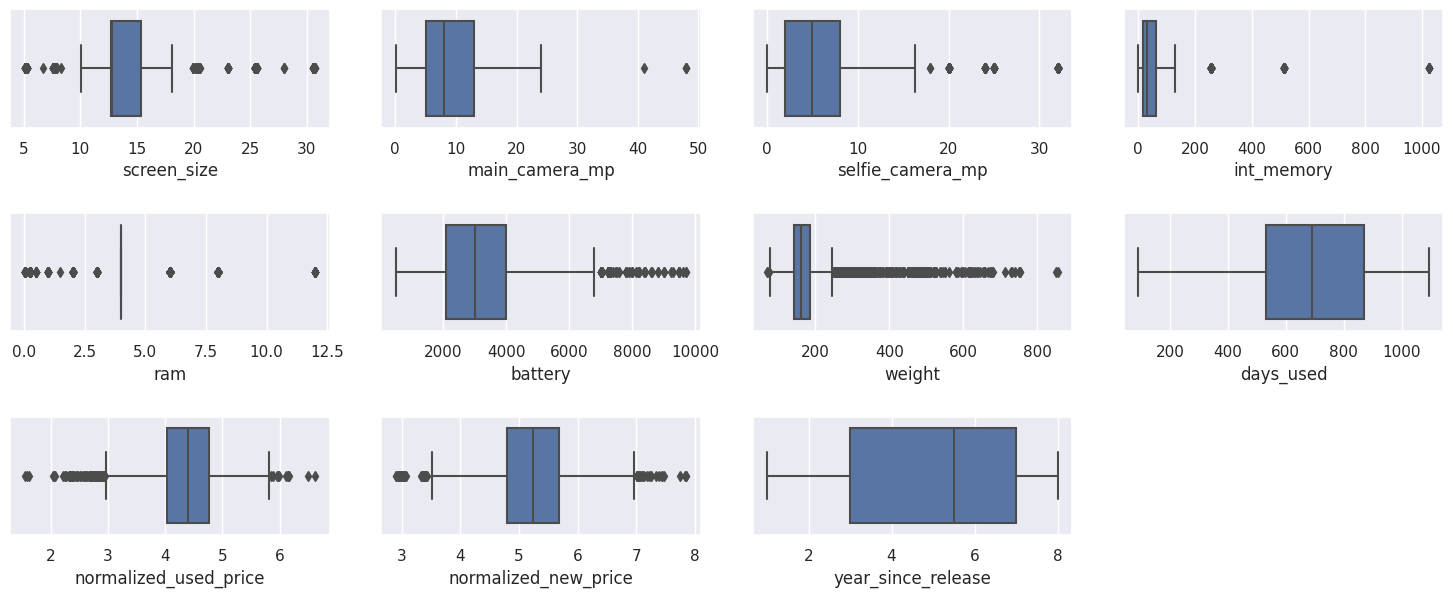

In [12]:
# outlier detection using boxplot visualization

plt.figure(figsize=(15, 10))

for num, variable in enumerate(num_col):
    plt.subplot(5, 4, num+1)
    sns.boxplot(data=df, x=variable)
    plt.tight_layout(pad=2)

plt.show()

As seen from the boxplots, there are outliers in the numerical columns of the dataset however all the values of outliers seem reasonable. So, it is decided to keep them as they are.

#### Preparing data for modeling

Step 1: Define X (predictors) and Y (to be predicted)

Step 2: Dealing with categorical variables by encoding

Step 3: Training-Test split

In [13]:
# step 1:
X = df.drop(['normalized_used_price'], axis=1)
y = df['normalized_used_price']  # we have to predict the normalized used price

X.head()

brand_name       os  screen_size   4g   5g  main_camera_mp  \
0      Honor  Android        14.50  yes   no            13.0   
1      Honor  Android        17.30  yes  yes            13.0   
2      Honor  Android        16.69  yes  yes            13.0   
3      Honor  Android        25.50  yes  yes            13.0   
4      Honor  Android        15.32  yes   no            13.0   

   selfie_camera_mp  int_memory  ram  battery  weight  days_used  \
0               5.0        64.0  3.0   3020.0   146.0        127   
1              16.0       128.0  8.0   4300.0   213.0        325   
2               8.0       128.0  8.0   4200.0   213.0        162   
3               8.0        64.0  6.0   7250.0   480.0        345   
4               8.0        64.0  3.0   5000.0   185.0        293   

   normalized_new_price  year_since_release  
0              4.715100                   1  
1              5.519018                   1  
2              5.884631                   1  
3              5.630961                   1  
4              4.947837                   1

In [14]:
y.head()

0    4.307572
1    5.162097
2    5.111084
3    5.135387
4    4.389995
Name: normalized_used_price, dtype: float64

In [15]:
# add intercept
X = sm.add_constant(X)

In [16]:
# step 2:
# create dummy variables
X = pd.get_dummies( X, columns=X.select_dtypes(include=['object','category']).columns.tolist(), drop_first=True)
X.head()

const  screen_size  main_camera_mp  selfie_camera_mp  int_memory  ram  \
0    1.0        14.50            13.0               5.0        64.0  3.0   
1    1.0        17.30            13.0              16.0       128.0  8.0   
2    1.0        16.69            13.0               8.0       128.0  8.0   
3    1.0        25.50            13.0               8.0        64.0  6.0   
4    1.0        15.32            13.0               8.0        64.0  3.0   

   battery  weight  days_used  normalized_new_price  ...  brand_name_Spice  \
0   3020.0   146.0        127              4.715100  ...                 0   
1   4300.0   213.0        325              5.519018  ...                 0   
2   4200.0   213.0        162              5.884631  ...                 0   
3   7250.0   480.0        345              5.630961  ...                 0   
4   5000.0   185.0        293              4.947837  ...                 0   

   brand_name_Vivo  brand_name_XOLO  brand_name_Xiaomi  brand_name_ZTE  \
0                0                0                  0               0   
1                0                0                  0               0   
2                0                0                  0               0   
3                0                0                  0               0   
4                0                0                  0               0   

   os_Others  os_Windows  os_iOS  4g_yes  5g_yes  
0          0           0       0       1       0  
1          0           0       0       1       1  
2          0           0       0       1       1  
3          0           0       0       1       1  
4          0           0       0       1       0  

[5 rows x 49 columns]

In [17]:
# step 3:
#split the data in train(70%) and test(30%)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [34]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 2417
Number of rows in test data = 1037


## EDA

- It is a good idea to explore the data once again after manipulating it.

In [18]:
# lets see the dataset after the feature modification
df.head()

brand_name       os  screen_size   4g   5g  main_camera_mp  \
0      Honor  Android        14.50  yes   no            13.0   
1      Honor  Android        17.30  yes  yes            13.0   
2      Honor  Android        16.69  yes  yes            13.0   
3      Honor  Android        25.50  yes  yes            13.0   
4      Honor  Android        15.32  yes   no            13.0   

   selfie_camera_mp  int_memory  ram  battery  weight  days_used  \
0               5.0        64.0  3.0   3020.0   146.0        127   
1              16.0       128.0  8.0   4300.0   213.0        325   
2               8.0       128.0  8.0   4200.0   213.0        162   
3               8.0        64.0  6.0   7250.0   480.0        345   
4               8.0        64.0  3.0   5000.0   185.0        293   

   normalized_used_price  normalized_new_price  year_since_release  
0               4.307572              4.715100                   1  
1               5.162097              5.519018                   1  
2               5.111084              5.884631                   1  
3               5.135387              5.630961                   1  
4               4.389995              4.947837                   1

In [19]:
# numerical columns list
num_col = df.select_dtypes(include=np.number).columns.tolist()

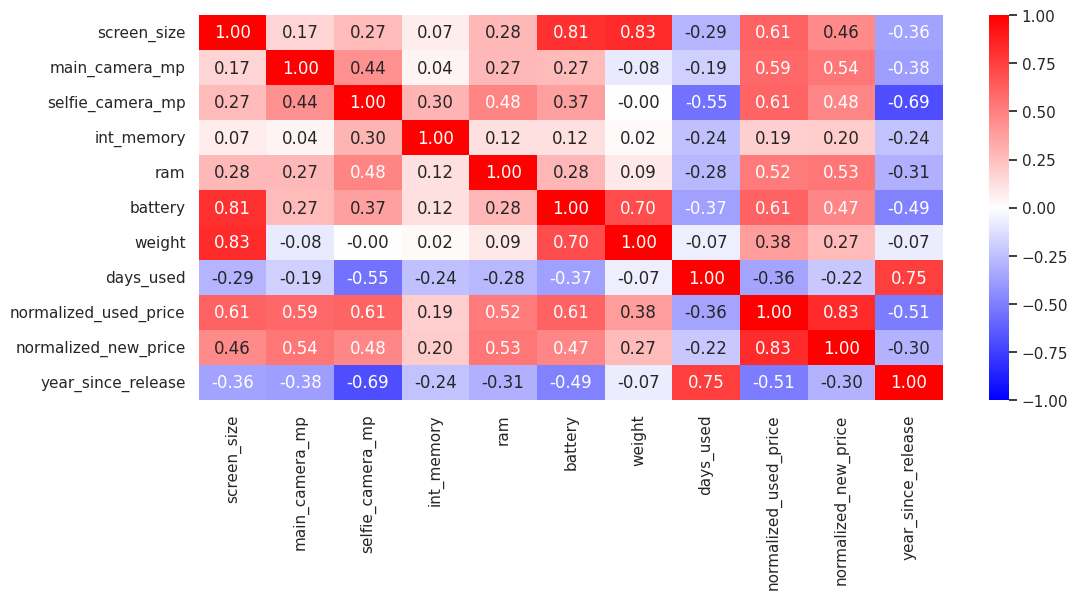

In [20]:
# heatmap
plt.figure(figsize=(12, 5))
sns.heatmap(df[num_col].corr(), annot=True, fmt='.2f', vmin=-1, cmap='bwr')
plt.show()

Observations:

1. years_since_release is strongly neagtively correlated with selfie_camera_mp (R$^2$ = - 0.69)
2. years_since_release is negatively correlated with normalized_used_price (R$^2$ = - 0.51)
3. years_since_release is highly correlated with days_used (R$^2$ = 0.75)

EDA has been performed on the treated variables i.e.
* main_camera_mp
* selfie_camera_mp
* int_memory
* ram
* battery
* weight




* Main camera

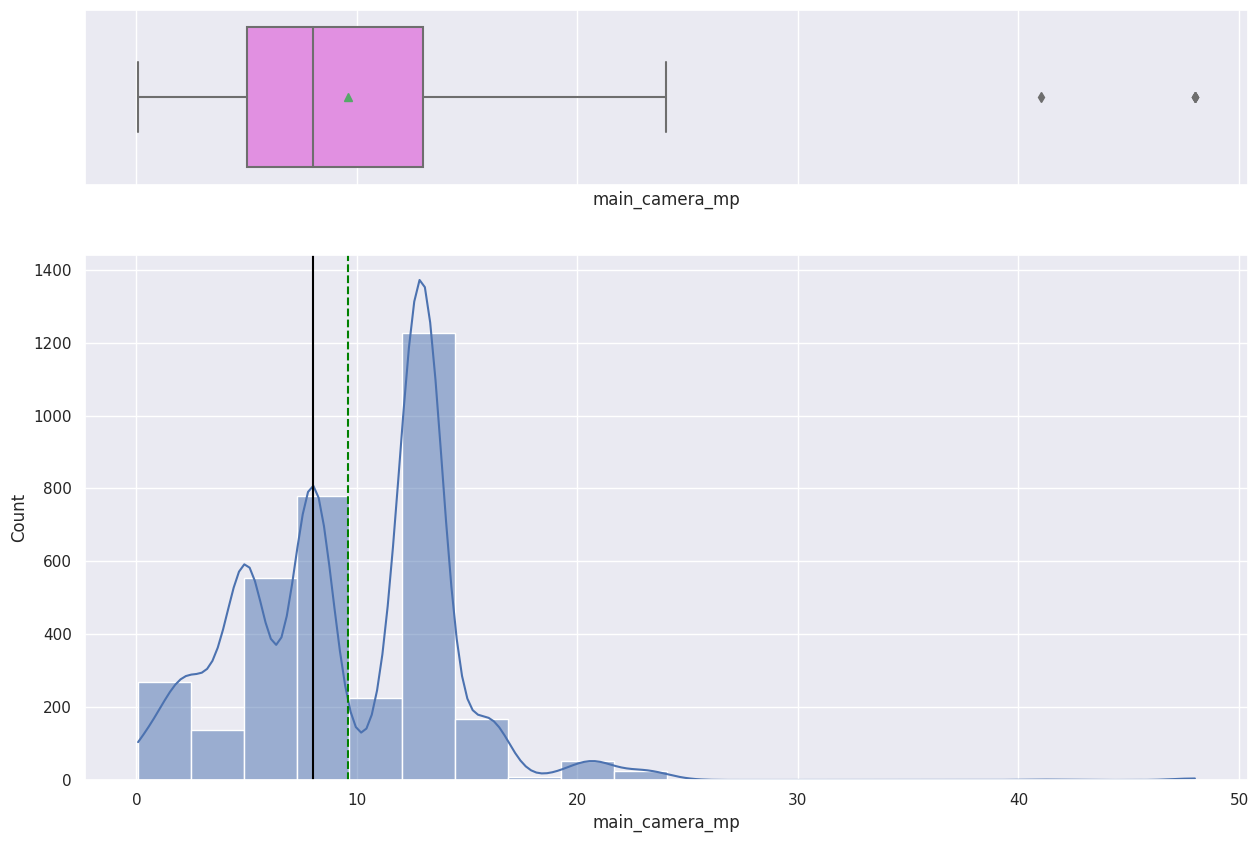

In [56]:
histogram_boxplot(df,'main_camera_mp', kde=True, bins=20)

* Selfie camera

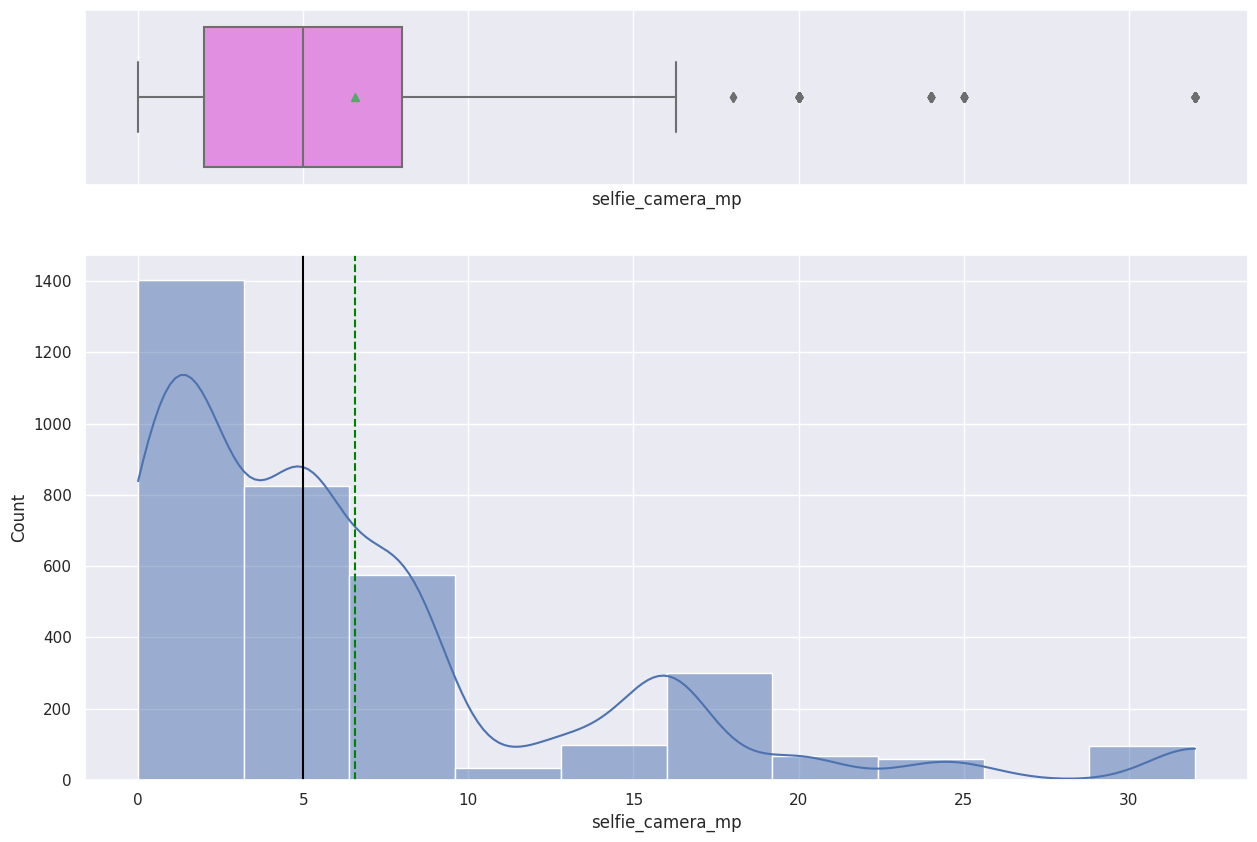

In [58]:
histogram_boxplot(df,'selfie_camera_mp', kde=True, bins=10)

Brands vs Camera

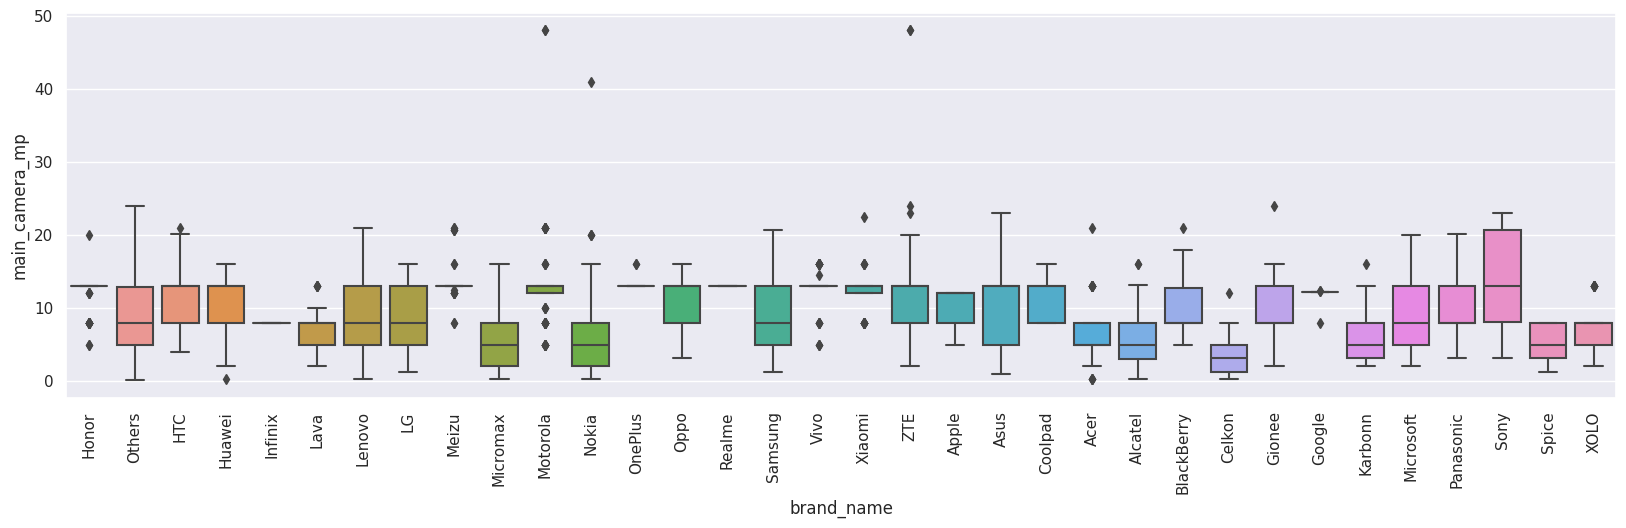

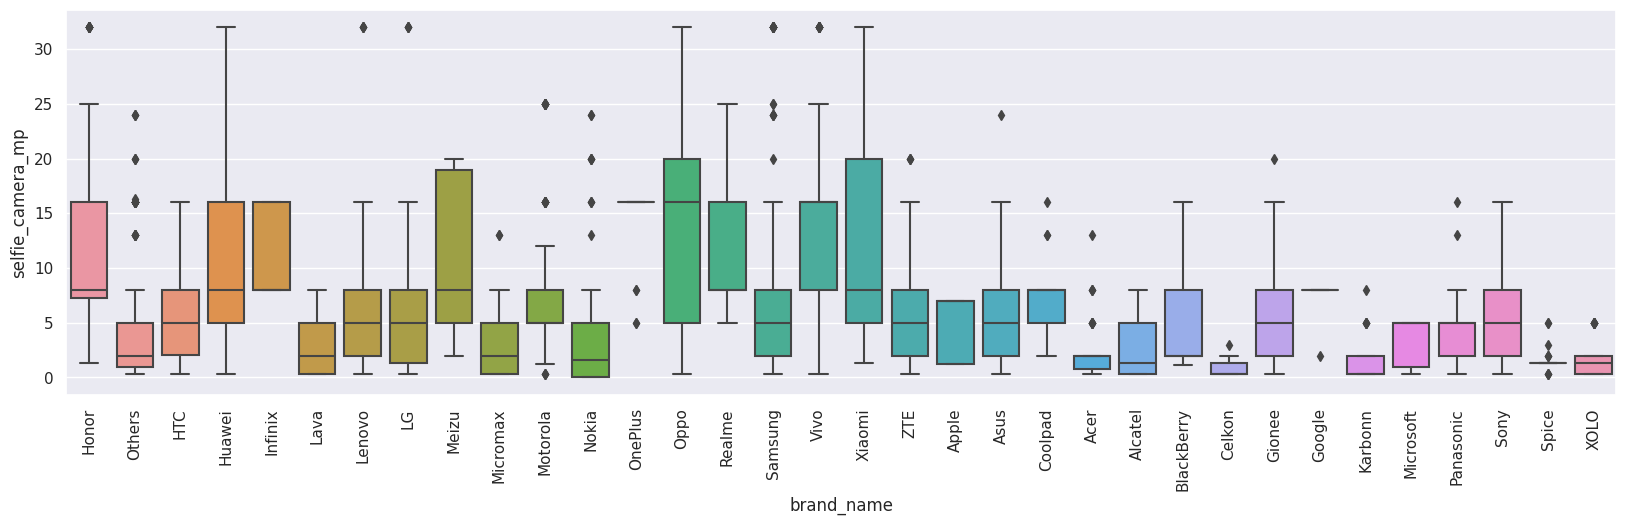

In [21]:
# main cam
plt.figure(figsize=(20, 5))
sns.boxplot(data=df, x='brand_name', y='main_camera_mp')
plt.xticks(rotation=90);
# selfie cam
plt.figure(figsize=(20, 5))
sns.boxplot(data=df, x='brand_name', y='selfie_camera_mp')
plt.xticks(rotation=90);

* Internal memory

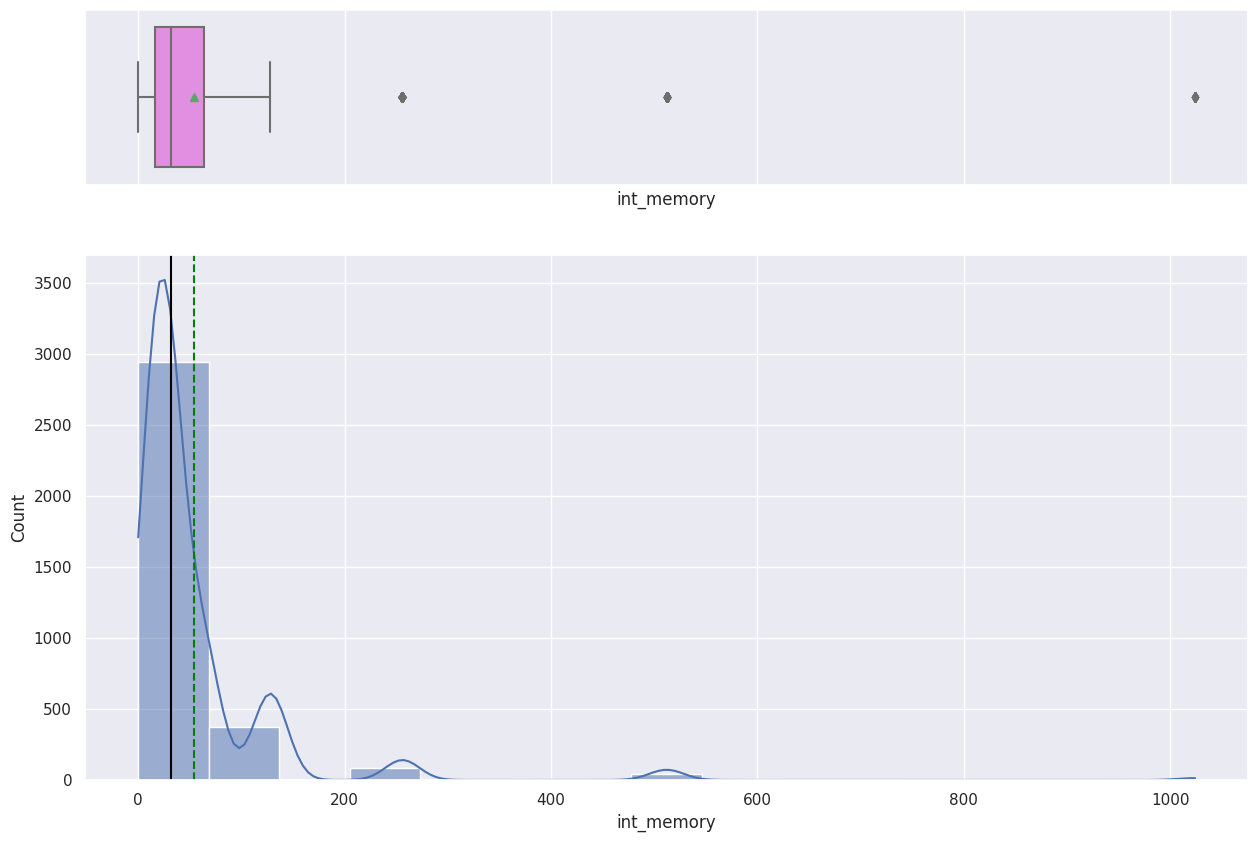

In [25]:
histogram_boxplot(df,'int_memory', kde=True,bins=15)

Brands vs Int memory

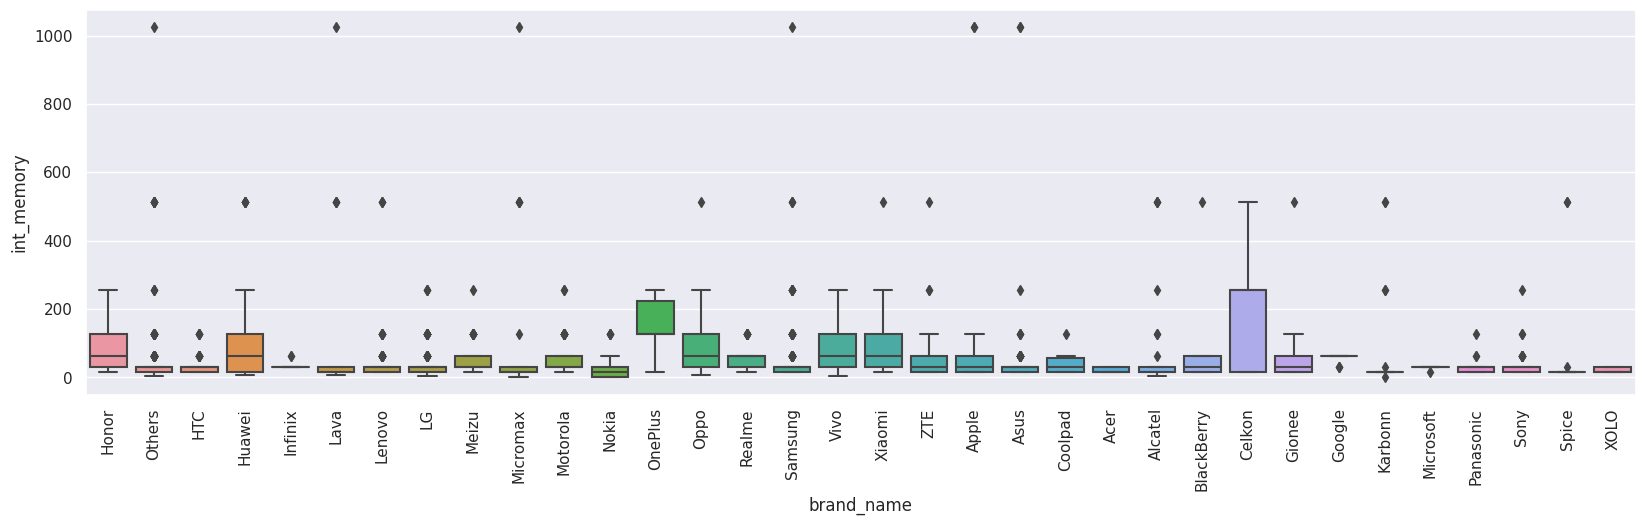

In [26]:
plt.figure(figsize=(20, 5))
sns.boxplot(data=df, x='brand_name', y='int_memory')
plt.xticks(rotation=90);

* RAM

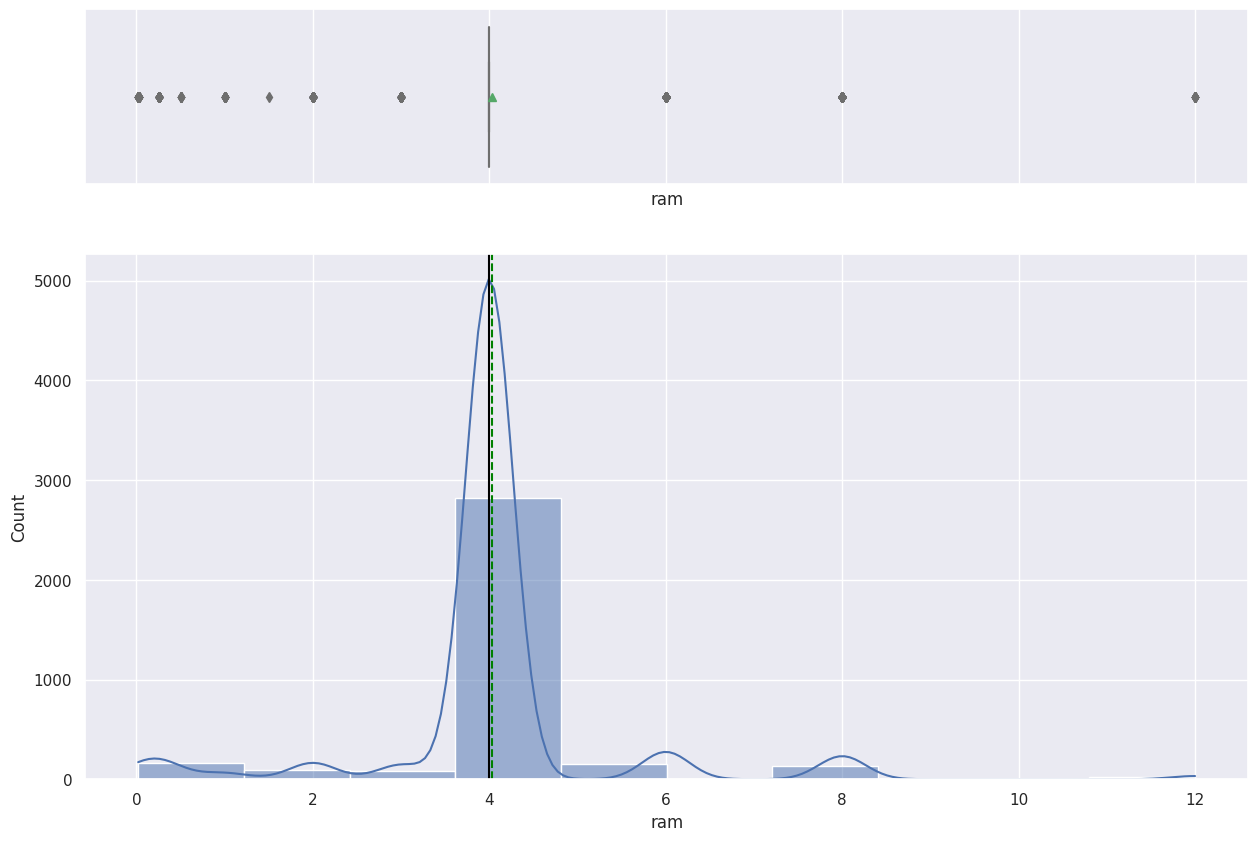

In [27]:
histogram_boxplot(df,'ram', kde=True,bins=10)

Brands vs RAM

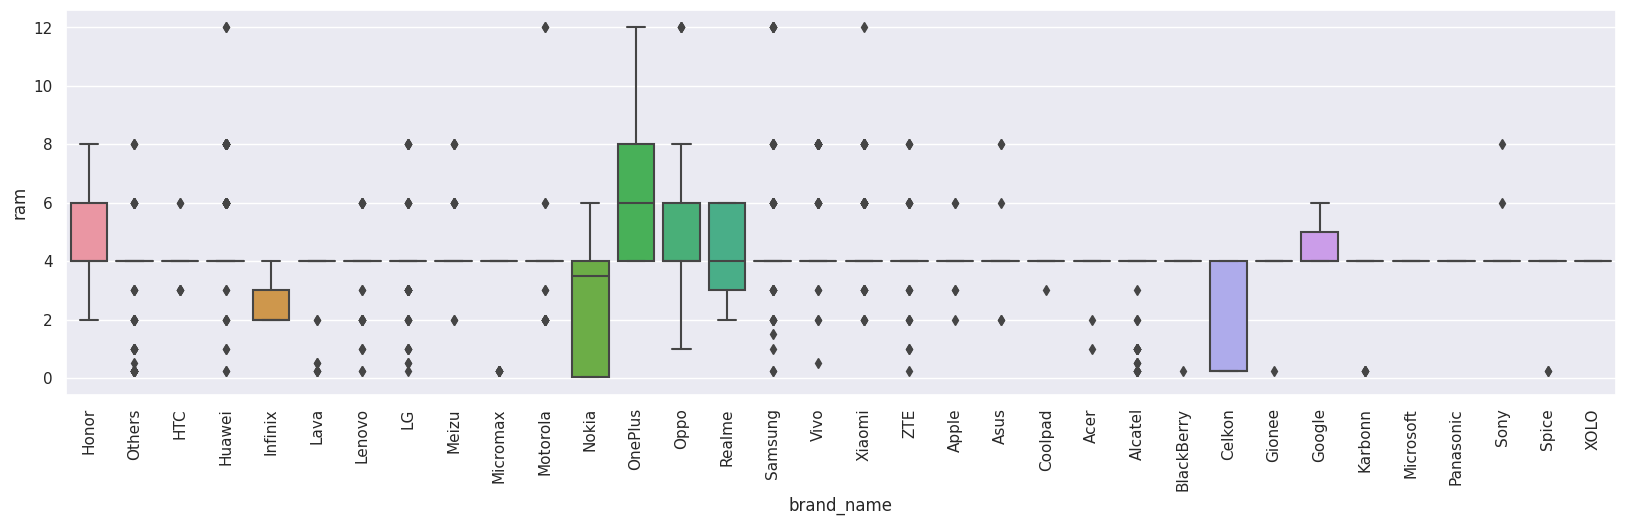

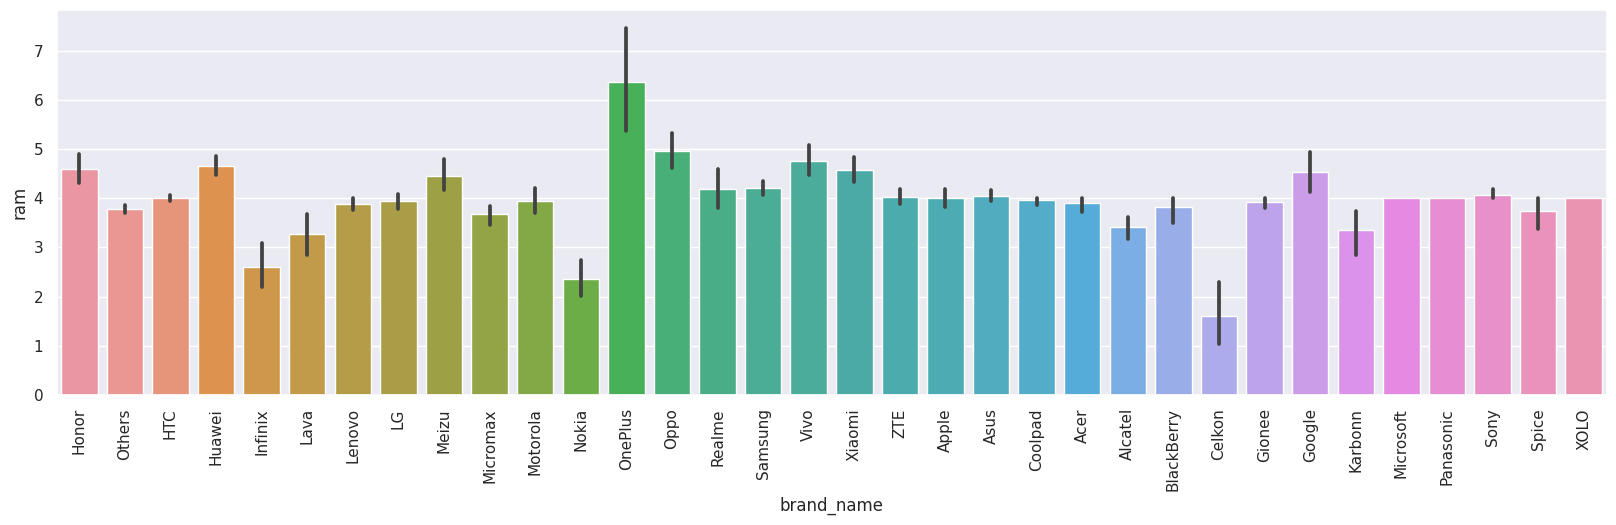

In [28]:
plt.figure(figsize=(20,5))
sns.boxplot(data=df, x='brand_name', y='ram')
plt.xticks(rotation=90);
plt.show()

plt.figure(figsize=(20,5))
plt.xticks(rotation=90)
sns.barplot(data=df, x='brand_name', y='ram')
plt.show()

* Battery

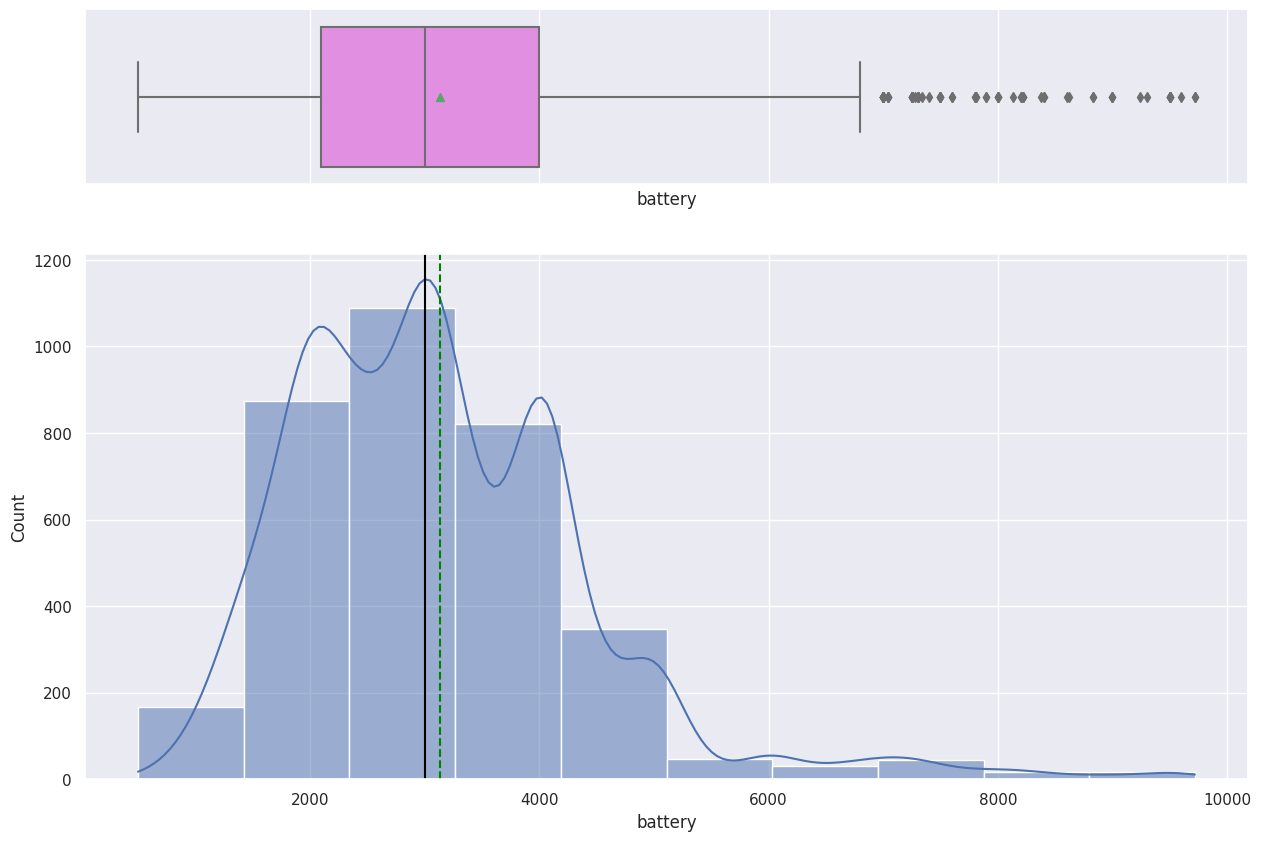

In [29]:
histogram_boxplot(df,'battery', kde=True,bins=10)

Brand vs battery

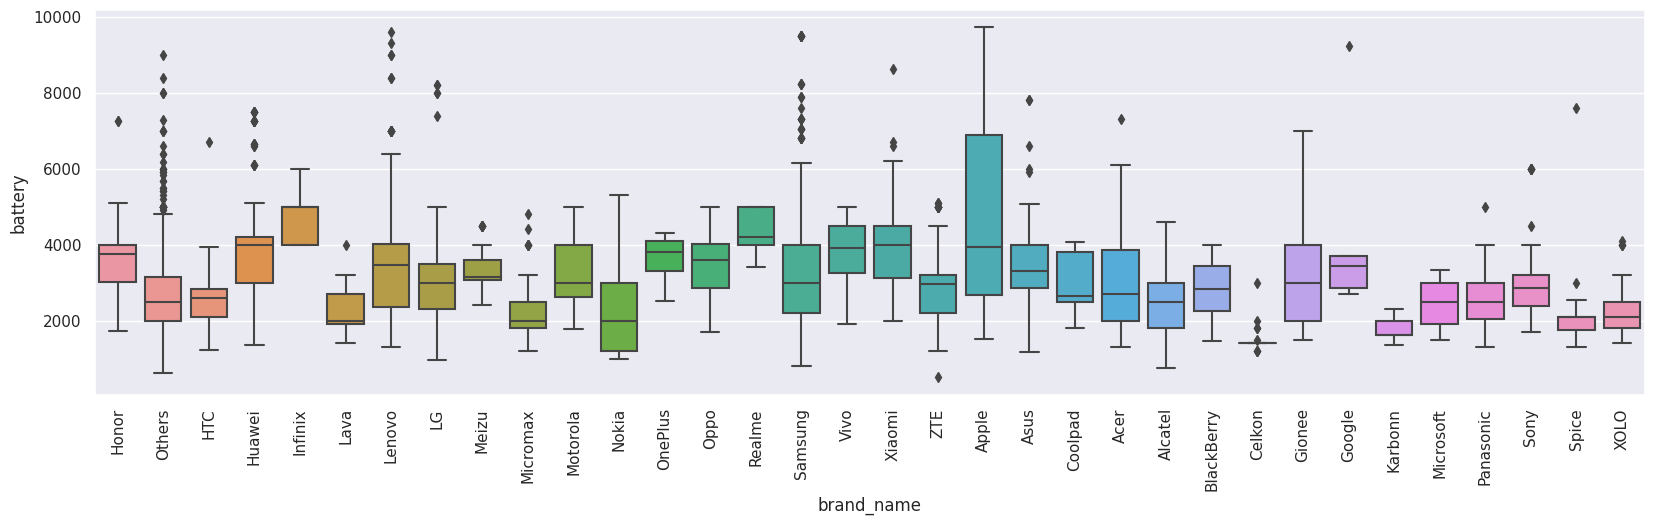

In [30]:
plt.figure(figsize=(20,5))
sns.boxplot(data=df, x='brand_name', y='battery')
plt.xticks(rotation=90);
plt.show()

* Weight

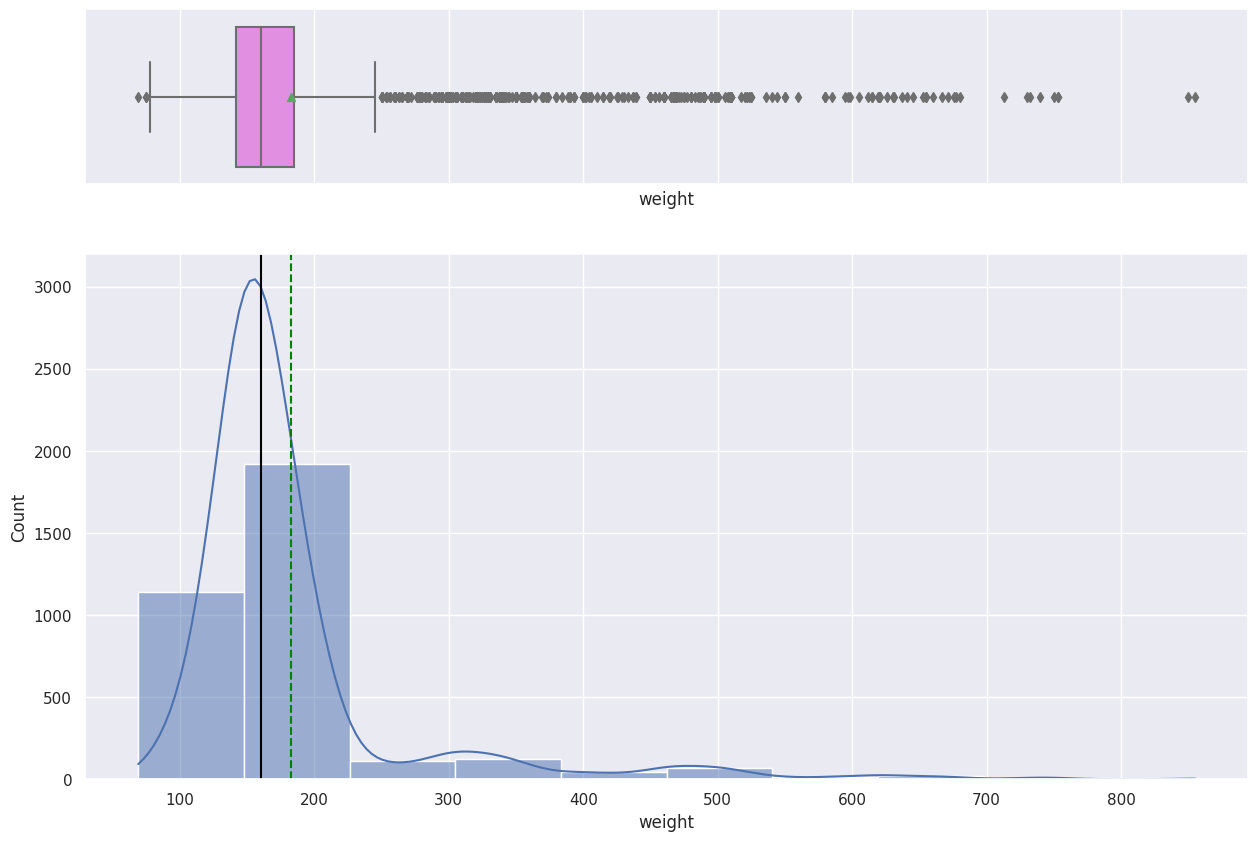

In [31]:
histogram_boxplot(df,'weight', kde=True,bins=10)

Brand vs weight

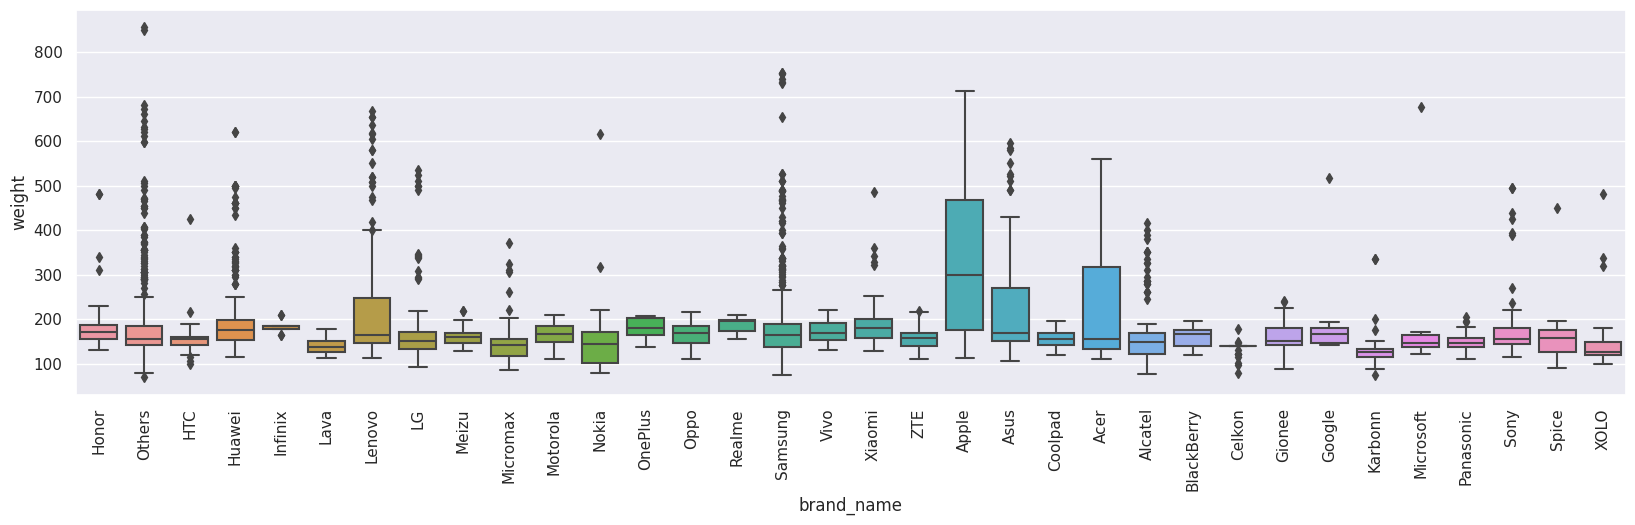

In [32]:
plt.figure(figsize=(20,5))
sns.boxplot(data=df, x='brand_name', y='weight')
plt.xticks(rotation=90);
plt.show()

Observations:
No noticeable changes observed in tha data pattern after preprocessing

## Model Building - Linear Regression

In [35]:
Lr = LinearRegression()
Lr.fit(x_train, y_train)

LinearRegression()

In [36]:
Lr.score(x_test, y_test)

0.8424791238859027

#### Using OLS regression method

In [33]:
# Create a fit OLS model
model = sm.OLS(y_train, x_train).fit()
print(model.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.845
Model:                               OLS   Adj. R-squared:                  0.842
Method:                    Least Squares   F-statistic:                     268.7
Date:                   Sun, 17 Sep 2023   Prob (F-statistic):               0.00
Time:                           10:19:16   Log-Likelihood:                 123.85
No. Observations:                   2417   AIC:                            -149.7
Df Residuals:                       2368   BIC:                             134.0
Df Model:                             48                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


####Interpreting the Regression Results

1. **Adjusted. R-squared**: It reflects the fit of the model.
    - Adjusted R-squared values generally range from 0 to 1, where a higher value generally indicates a better fit, assuming certain conditions are met.
    - In our case, the value for adj. R-squared is **0.842**, which is good.


2. ***const* coefficient**: It is the Y-intercept.
    - It means that if all the predictor variable coefficients are zero, then the expected output (i.e., Y) would be equal to the *const* coefficient.
    - In our case, the value for `const` coefficient is **1.3156**


3. **Coefficient of a predictor variable**: It represents the change in the output Y due to a change in the predictor variable (everything else held constant).
    - In our case, the coefficient of `normalized_new_price` is **0.4311**.

## Model Performance Check

Let's check the performance of the model using different metrics.

* We will be using metric functions defined in sklearn for RMSE, MAE, and $R^2$.
* We will define a function to calculate MAPE and adjusted $R^2$.
    - The mean absolute percentage error (MAPE) measures the accuracy of predictions as a percentage, and can be calculated as the average absolute percent error for each predicted value minus actual values divided by actual values. It works best if there are no extreme values in the data and none of the actual values are 0.

* We will create a function which will print out all the above metrics in one go.

In [37]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [38]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel_train_perf = model_performance_regression(model, x_train, y_train)
olsmodel_train_perf

Training Performance



RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.229884  0.180326   0.844886        0.841675  4.326841

In [39]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel_test_perf = model_performance_regression(model, x_test, y_test)
olsmodel_test_perf

Test Performance



RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.238358  0.184749   0.842479        0.834659  4.501651

Observations:
1. RMSE: Similar values for both training and testing data indicating the better fit model on the training dataset

2. MAE:suggests that the model can predict normalized used prices within a mean error of **0.18** on the test data

3. Adj. R-squared: **0.84** on the training data meaning model is not underfitting

4. MAPE: This means that we are able to predict within **4.5%** of normalized used price on the test data

## Checking Linear Regression Assumptions

- In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied.

We will be checking the following Linear Regression assumptions:

1. **No Multicollinearity**

2. **Linearity of variables**

3. **Independence of error terms**

4. **Normality of error terms**

5. **No Heteroscedasticity**

#### Test for Multicollinearity

* Multicollinearity occurs when predictor variables in a regression model are correlated. This correlation is a problem because predictor variables should be independent. If the correlation between variables is high, it can cause problems when we fit the model and interpret the results. When we have multicollinearity in the linear model, the coefficients that the model suggests are unreliable.

* There are different ways of detecting (or testing) multicollinearity. One such way is by using the Variance Inflation Factor, or VIF.

* **Variance  Inflation Factor (VIF)**:  Variance inflation factors measure the inflation in the variances of the regression parameter estimates due to collinearities that exist among the predictors. It is a measure of how much the variance of the estimated regression coefficient $\beta_k$ is "inflated" by the existence of correlation among the predictor variables in the model.
    - If VIF is 1, then there is no correlation among the $k$th predictor and the remaining predictor variables, and hence, the variance of $\beta_k$ is not inflated at all.

* **General Rule of thumb**:
    - If VIF is between 1 and 5, then there is low multicollinearity.
    - If VIF is between 5 and 10, we say there is moderate multicollinearity.
    - If VIF is exceeding 10, it shows signs of high multicollinearity.

Let's define a function to check VIF.

In [40]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

In [41]:
# lets check the vifs
checking_vif(x_train)

feature         VIF
0                   const  227.744081
1             screen_size    7.677290
2          main_camera_mp    2.285051
3        selfie_camera_mp    2.812473
4              int_memory    1.364152
5                     ram    2.282352
6                 battery    4.081780
7                  weight    6.396749
8               days_used    2.660269
9    normalized_new_price    3.119430
10     year_since_release    4.899007
11     brand_name_Alcatel    3.405693
12       brand_name_Apple   13.057668
13        brand_name_Asus    3.332038
14  brand_name_BlackBerry    1.632378
15      brand_name_Celkon    1.774721
16     brand_name_Coolpad    1.468006
17      brand_name_Gionee    1.951272
18      brand_name_Google    1.321778
19         brand_name_HTC    3.410361
20       brand_name_Honor    3.340687
21      brand_name_Huawei    5.983852
22     brand_name_Infinix    1.283955
23     brand_name_Karbonn    1.573702
24          brand_name_LG    4.849832
25        brand_name_Lava    1.711360
26      brand_name_Lenovo    4.558941
27       brand_name_Meizu    2.179607
28    brand_name_Micromax    3.363521
29   brand_name_Microsoft    1.869751
30    brand_name_Motorola    3.274558
31       brand_name_Nokia    3.479849
32     brand_name_OnePlus    1.437034
33        brand_name_Oppo    3.971194
34      brand_name_Others    9.711034
35   brand_name_Panasonic    2.105703
36      brand_name_Realme    1.946812
37     brand_name_Samsung    7.539866
38        brand_name_Sony    2.943161
39       brand_name_Spice    1.688863
40        brand_name_Vivo    3.651437
41        brand_name_XOLO    2.138070
42      brand_name_Xiaomi    3.719689
43         brand_name_ZTE    3.797581
44              os_Others    1.859863
45             os_Windows    1.596034
46                 os_iOS   11.784684
47                 4g_yes    2.467681
48                 5g_yes    1.813900

* There are multiple columns with very high VIF values, indicating presence of strong multicollinearity
* We will systematically drop numerical columns with VIF > 5
* We will ignore the VIF values for dummy variables and the constant (intercept)

Removing Multicollinearity

To remove multicollinearity

1. Drop every column one by one that has a VIF score greater than 5.
2. Look at the adjusted R-squared and RMSE of all these models.
3. Drop the variable that makes the least change in adjusted R-squared.
4. Check the VIF scores again.
5. Continue till you get all VIF scores under 5.

Let's define a function that will help us do this.

In [42]:
def treating_multicollinearity(predictors, target, high_vif_columns):
    """
    Checking the effect of dropping the columns showing high multicollinearity
    on model performance (adj. R-squared and RMSE)

    predictors: independent variables
    target: dependent variable
    high_vif_columns: columns having high VIF
    """
    # empty lists to store adj. R-squared and RMSE values
    adj_r2 = []
    rmse = []

    # build ols models by dropping one of the high VIF columns at a time
    # store the adjusted R-squared and RMSE in the lists defined previously
    for cols in high_vif_columns:
        # defining the new train set
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

        # create the model
        olsmodel = sm.OLS(target, train).fit()

        # adding adj. R-squared and RMSE to the lists
        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    # creating a dataframe for the results
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

 Columns that have high VIF (VIF>5) except the const (intercept) and dummy variables

In [43]:
high_vif_col= ['screen_size', 'weight']

res = treating_multicollinearity(x_train, y_train, high_vif_col)
res

col  Adj. R-squared after_dropping col  RMSE after dropping col
0  screen_size                           0.838381                 0.234703
1       weight                           0.838071                 0.234928

In [44]:
col_to_drop = 'screen_size' # makes the least change in adjusted R-squared
x_train1 = x_train.loc[:, ~x_train.columns.str.startswith(col_to_drop)]
x_test1 = x_test.loc[:, ~x_test.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(x_train1)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  screen_size


feature         VIF
0                   const  202.673906
1          main_camera_mp    2.281835
2        selfie_camera_mp    2.809009
3              int_memory    1.362043
4                     ram    2.282350
5                 battery    3.842989
6                  weight    2.993855
7               days_used    2.648929
8    normalized_new_price    3.077650
9      year_since_release    4.730315
10     brand_name_Alcatel    3.405533
11       brand_name_Apple   13.000338
12        brand_name_Asus    3.326698
13  brand_name_BlackBerry    1.631042
14      brand_name_Celkon    1.774528
15     brand_name_Coolpad    1.467719
16      brand_name_Gionee    1.941437
17      brand_name_Google    1.319334
18         brand_name_HTC    3.399980
19       brand_name_Honor    3.340354
20      brand_name_Huawei    5.981046
21     brand_name_Infinix    1.283526
22     brand_name_Karbonn    1.573494
23          brand_name_LG    4.832548
24        brand_name_Lava    1.711092
25      brand_name_Lenovo    4.553789
26       brand_name_Meizu    2.176424
27    brand_name_Micromax    3.358629
28   brand_name_Microsoft    1.868243
29    brand_name_Motorola    3.262356
30       brand_name_Nokia    3.464643
31     brand_name_OnePlus    1.437004
32        brand_name_Oppo    3.965445
33      brand_name_Others    9.652572
34   brand_name_Panasonic    2.104853
35      brand_name_Realme    1.943845
36     brand_name_Samsung    7.523421
37        brand_name_Sony    2.937375
38       brand_name_Spice    1.683302
39        brand_name_Vivo    3.650625
40        brand_name_XOLO    2.137844
41      brand_name_Xiaomi    3.713988
42         brand_name_ZTE    3.788971
43              os_Others    1.625212
44             os_Windows    1.595936
45                 os_iOS   11.678957
46                 4g_yes    2.466915
47                 5g_yes    1.810289

The VIF of all the columns (except intercept and dummy variables) are now under 5

In [45]:
model1 = sm.OLS(y_train, x_train1).fit()
print(model1.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.842
Model:                               OLS   Adj. R-squared:                  0.838
Method:                    Least Squares   F-statistic:                     267.7
Date:                   Sun, 17 Sep 2023   Prob (F-statistic):               0.00
Time:                           11:21:48   Log-Likelihood:                 97.950
No. Observations:                   2417   AIC:                            -99.90
Df Residuals:                       2369   BIC:                             178.0
Df Model:                             47                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


**Interpreting the Regression Results:**
> **std err**: It reflects the level of accuracy of the coefficients.
> The lower it is, the higher is the level of accuracy.


> **P>|t|**: It is p-value.
   
For each independent feature, there is a null hypothesis and an alternate hypothesis. Here $\beta_i$ is the coefficient of the $i$th independent variable.

 $H_o$ : Independent feature is not significant ($\beta_i = 0$)

 $H_a$ : Independent feature is that it is significant ($\beta_i \neq 0$)

   * (P>|t|) gives the p-value for each independent feature to check that null hypothesis. We are considering 0.05 (5%) as significance level.
   * A p-value of less than 0.05 is considered to be statistically significant.


> **Confidence Interval**: It represents the range in which our coefficients are likely to fall (with a likelihood of 95%).

**Observations**

- We can see that adj. R-squared has dropped from 0.842 to 0.838, which shows that the dropped columns did not have much effect on the model
- As there is no multicollinearity, we can look at the p-values of predictor variables to check their significance

#### Dealing with high p-value variables

- Some of the dummy variables in the data have p-value > 0.05. So, they are not significant and we'll drop them
- But sometimes p-values change after dropping a variable. So, we'll not drop all variables at once
- Instead, we will do the following:
    - Build a model, check the p-values of the variables, and drop the column with the highest p-value
    - Create a new model without the dropped feature, check the p-values of the variables, and drop the column with the highest p-value
    - Repeat the above two steps till there are no columns with p-value > 0.05

**Note**: The above process can also be done manually by picking one variable at a time that has a high p-value, dropping it, and building a model again. But that might be a little tedious and using a loop will be more efficient.

In [46]:
# initial list of columns
predictors = x_train1.copy()
cols = predictors.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = predictors[cols]
    # fitting the model
    model = sm.OLS(y_train, x_train_aux).fit()
    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)
    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'main_camera_mp', 'selfie_camera_mp', 'ram', 'weight', 'normalized_new_price', 'year_since_release', 'brand_name_Karbonn', 'brand_name_Samsung', 'brand_name_Sony', 'brand_name_Xiaomi', 'os_Others', 'os_iOS', '4g_yes', '5g_yes']


In [47]:
x_train2 = x_train1[selected_features]
x_test2 = x_test1[selected_features]

In [48]:
model2 = sm.OLS(y_train, x_train2).fit()
print(model2.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.839
Model:                               OLS   Adj. R-squared:                  0.838
Method:                    Least Squares   F-statistic:                     895.7
Date:                   Sun, 17 Sep 2023   Prob (F-statistic):               0.00
Time:                           11:37:27   Log-Likelihood:                 80.645
No. Observations:                   2417   AIC:                            -131.3
Df Residuals:                       2402   BIC:                            -44.44
Df Model:                             14                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [49]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel1_train_perf = model_performance_regression(model, x_train2, y_train)
olsmodel1_train_perf

Training Performance



RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.23403  0.182751    0.83924        0.838235  4.395407

In [50]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel1_test_perf = model_performance_regression(model, x_test2, y_test)
olsmodel1_test_perf

Test Performance



RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.241434  0.186649   0.838387        0.836013  4.556349

**Observations**

* Now no feature has p-value greater than 0.05, so we'll consider the features in *x_train2* as the final set of predictor variables and *model2* as the final model to move forward with
* Now adjusted R-squared is **0.838**, i.e., our model is able to explain ~83.8% of the variance
* The adjusted R-squared in *model1* (where we considered the variables without multicollinearity) was **0.838**
    * This shows that the variables we dropped were not affecting the model
* RMSE and MAE values are comparable for train and test sets, indicating that the model is not overfitting

Now we'll check the rest of the assumptions on model2.

#### Test for Linearity & Independence

**Why the test?**

* Linearity describes a straight-line relationship between two variables, predictor variables must have a linear relation with the dependent variable.
* The independence of the error terms (or residuals) is important. If the residuals are not independent, then the confidence intervals of the coefficient estimates will be narrower and make us incorrectly conclude a parameter to be statistically significant.

**How to check linearity and independence?**

- Make a plot of fitted values vs residuals.
- If they don't follow any pattern, then we say the model is linear and residuals are independent.
- Otherwise, the model is showing signs of non-linearity and residuals are not independent.

**How to fix if this assumption is not followed?**

* We can try to transform the variables and make the relationships linear.

In [51]:
# let us create a dataframe with actual, fitted and residual values
df_pred = pd.DataFrame()

df_pred['Actual Values'] = y_train  # actual values
df_pred['Fitted Values'] = model2.fittedvalues  # predicted values
df_pred['Residuals'] = model2.resid  # residuals

df_pred.head()

Actual Values  Fitted Values  Residuals
3026       4.087488       3.867319   0.220169
1525       4.448399       4.602001  -0.153602
1128       4.315353       4.286957   0.028395
3003       4.282068       4.195169   0.086899
2907       4.456438       4.490563  -0.034125

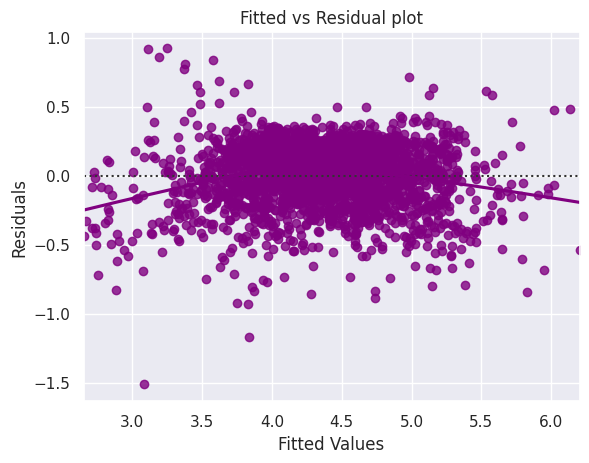

In [52]:
# let's plot the fitted values vs residuals

sns.residplot( data=df_pred, x='Fitted Values', y='Residuals', color='purple', lowess=True)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Fitted vs Residual plot')
plt.show()

* The scatter plot shows the distribution of residuals (errors) vs fitted values (predicted values).

* If there exist any pattern in this plot, we consider it as signs of non-linearity in the data and a pattern means that the model doesn't capture non-linear effects.

* **We see no pattern in the plot above. Hence, the assumptions of linearity and independence are satisfied.**

#### Test for Normality

**Why the test?**

* Error terms, or residuals, should be normally distributed. If the error terms are not normally distributed, confidence intervals of the coefficient estimates may become too wide or narrow. Once confidence interval becomes unstable, it leads to difficulty in estimating coefficients based on minimization of least squares. Non-normality suggests that there are a few unusual data points that must be studied closely to make a better model.

**How to check normality?**

* The shape of the histogram of residuals can give an initial idea about the normality.
* It can also be checked via a Q-Q plot of residuals. If the residuals follow a normal distribution, they will make a straight line plot, otherwise not.
* Other tests to check for normality includes the Shapiro-Wilk test.
    - Null hypothesis: Residuals are normally distributed
    - Alternate hypothesis: Residuals are not normally distributed

**How to fix if this assumption is not followed?**

* We can apply transformations like log, exponential, arcsinh, etc. as per our data.

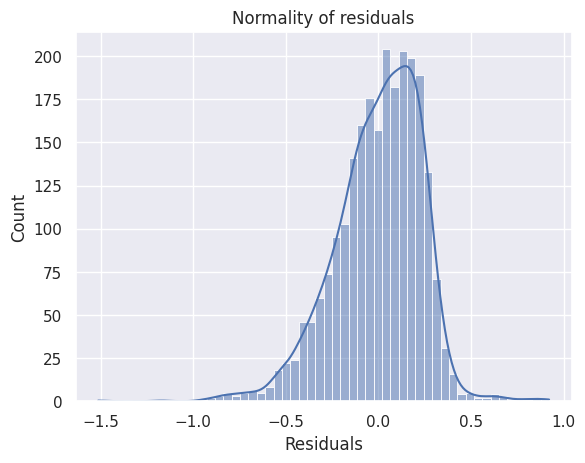

In [53]:
sns.histplot(data=df_pred, x='Residuals', kde=True)
plt.title('Normality of residuals')
plt.show()

- The histogram of residual does have a bell shape but slightly left skewed, almost normal distribution
- Let's check the Q-Q plot

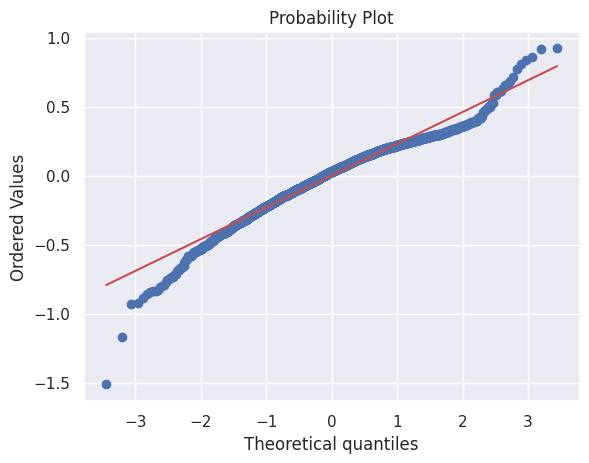

In [54]:
import pylab
import scipy.stats as stats

stats.probplot(df_pred['Residuals'], dist='norm', plot=pylab)
plt.show()

- The residuals more or less follow a straight line except for the tails.
- Let's check the results of the Shapiro-Wilk test.

In [55]:
stats.shapiro(df_pred['Residuals'])

ShapiroResult(statistic=0.9676972031593323, pvalue=6.995261942370773e-23)

- Since p-value < 0.05, the residuals are not normal as per the Shapiro-Wilk test.
- Strictly speaking, the residuals are not normal.
- However, as an approximation, we can accept this distribution as close to being normal.
- **So, the assumption is satisfied.**

#### Test for Homoscedasticity

* **Homoscedascity**: If the variance of the residuals is symmetrically distributed across the regression line, then the data is said to be homoscedastic.

* **Heteroscedascity**: If the variance is unequal for the residuals across the regression line, then the data is said to be heteroscedastic.

**Why the test?**

* The presence of non-constant variance in the error terms results in heteroscedasticity. Generally, non-constant variance arises in presence of outliers.

**How to check for homoscedasticity?**

* The residual vs fitted values plot can be looked at to check for homoscedasticity. In the case of heteroscedasticity, the residuals can form an arrow shape or any other non-symmetrical shape.
* The goldfeldquandt test can also be used. If we get a p-value > 0.05 we can say that the residuals are homoscedastic. Otherwise, they are heteroscedastic.
    - Null hypothesis: Residuals are homoscedastic
    - Alternate hypothesis: Residuals have heteroscedasticity

**How to fix if this assumption is not followed?**

* Heteroscedasticity can be fixed by adding other important features or making transformations.

In [57]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(df_pred['Residuals'], x_train2)
lzip(name, test)

[('F statistic', 1.0087504199106758), ('p-value', 0.4401970650667301)]

**Since p-value > 0.05, we can say that the residuals are homoscedastic. So, this assumption is satisfied.**

#### Predictions of Test Data

In [58]:
# predictions on the test set
yhat = model2.predict(x_test2)

df_pred_test = pd.DataFrame({'Actual': y_test, 'Predicted': yhat})
df_pred_test.sample(10, random_state=1)

Actual  Predicted
1995  4.566741   4.385671
2341  3.696103   4.003934
1913  3.592093   3.643812
688   4.306495   4.103463
650   4.522115   5.113026
2291  4.259294   4.398406
40    4.997685   5.459871
1884  3.875359   4.053143
2538  4.206631   4.035868
45    5.380450   5.227899

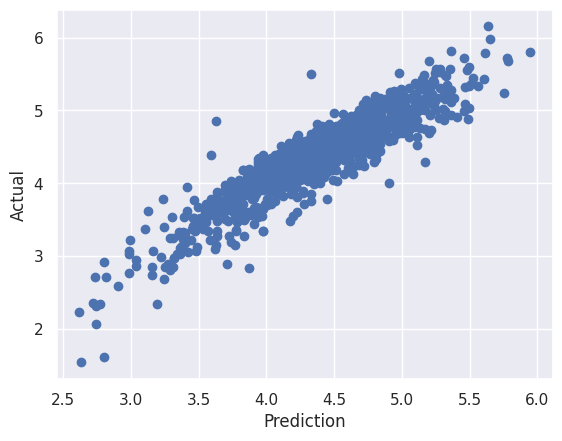

In [63]:
plt.scatter(df_pred_test['Predicted'], df_pred_test['Actual'])
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.show()

We can observe here that our model has returned pretty good prediction results, and the actual and predicted values are comparable

## Final Model

Let's recreate the final model and print it's summary to gain insights.

In [59]:
x_train_final = x_train2.copy()
x_test_final = x_test2.copy()

In [60]:
olsmodel_final = sm.OLS(y_train, x_train_final).fit()
print(olsmodel_final.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.839
Model:                               OLS   Adj. R-squared:                  0.838
Method:                    Least Squares   F-statistic:                     895.7
Date:                   Sun, 17 Sep 2023   Prob (F-statistic):               0.00
Time:                           12:58:01   Log-Likelihood:                 80.645
No. Observations:                   2417   AIC:                            -131.3
Df Residuals:                       2402   BIC:                            -44.44
Df Model:                             14                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [61]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel_final_train_perf = model_performance_regression(
    olsmodel_final, x_train_final, y_train
)
olsmodel_final_train_perf

Training Performance



RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.23403  0.182751    0.83924        0.838235  4.395407

In [62]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel_final_test_perf = model_performance_regression(
    olsmodel_final, x_test_final, y_test
)
olsmodel_final_test_perf

Test Performance



RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.241434  0.186649   0.838387        0.836013  4.556349

**Observations:**
* The model is able to explain **~84%** of the variation in the data

* The train and test RMSE and MAE are low and comparable. So, our model is not suffering from overfitting

* The MAPE on the test set suggests we can predict within **4.6%** of the *normalized_used_price*

* Hence, we can conclude the model *olsmodel_final* is good for prediction as well as inference purposes

## Actionable Insights and Recommendations

1. The model is able to explain ~84% of the variation in the data and can be used to predict the normalized used price within 4.6% of their actual price based on test data, which is good
    - This indicates that the model is good for prediction as well as inference purposes


2. If the price of a new device increases by one unit, then the price for a used device increases by 0.4415 Euros.

3. If the megapixels main camera increases by one unit, then the price for a used device increases by 0.0210 Euros.

4. If the megapixels of the selfie camera increases by one unit, then the price for a used device increases by 0.0138 Euros.


5. We should focus on improving the features that contribute to increase the used price, i.e.:
      - Higher new price
      - Higher resolution in main and selfie camera
      - Higher RAM
      - Higher weight
      - Enabled with 4g
      - Recently released models


6. For brands like Samsung and Sony, the price of their used price decreases whereas for Xiomi and Karbonn, it increases. This indicates customers preference towards certain brands for used devices.


7. The price of used devices for 'other' operating system decreases by 0.1276 Euros. This suggests customers do not prefer other brands that much.


8. Although the devices with iOS have a higher used price, the price for a used device decreases by 0.0900 Euros. This can be due to fact that ioS have a higher initial purchase price that leads to higher depreciation rate.


9. With 5g connectivity, the price for used devices decreass as 5g is not yet as widely available as 4g.

10. To summarize, the significant factors influencing the price for used devices are new devices price, camera quality, ram capacity, device weight, 4g connectivity, since how many years the devices are running and certain brands.

___